In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import json
import glob
import pickle

In [2]:
results_dir = r'C:\Users\sarab\Desktop\csv_results'
figures_normal_dir = os.path.join(results_dir,'figures_normal')
figures_sampling_dir = os.path.join(results_dir,'figures_sampling')

wdir = os.getcwd()
udir = os.path.join(os.path.split(wdir)[0], "utils")

json_file_path = os.path.join(udir,'tasks_metadata.json')
with open(json_file_path, 'r') as j:
    task_infos = json.loads(j.read())

## Spatial Results (no sampling)

In [3]:
spatial_results = pd.read_csv(os.path.join(results_dir,'spatial_results_normal.csv'),sep=',',header=0)
spatial_results

year state            classifier  median_accuracy  median_sex_dpd  \
0    2014    AL                LogReg         0.753179        0.127581   
1    2014    AK                LogReg         0.728160        0.058206   
2    2014    AZ                LogReg         0.752875        0.123988   
3    2014    AR                LogReg         0.754644        0.109480   
4    2014    CA                LogReg         0.750022        0.137748   
..    ...   ...                   ...              ...             ...   
995  2018    VA  AdversarialDebiasing         0.781810        0.062129   
996  2018    WA  AdversarialDebiasing         0.785922        0.070098   
997  2018    WV  AdversarialDebiasing         0.759208        0.062407   
998  2018    WI  AdversarialDebiasing         0.780196        0.025551   
999  2018    WY  AdversarialDebiasing         0.751968        0.016412   

     median_sex_dpr  median_sex_eod  median_rac_dpd  median_rac_dpr  \
0          0.793896        0.133621        0.107782        0.808289   
1          0.919593        0.044458        0.133567        0.813799   
2          0.800488        0.125091        0.085280        0.844134   
3          0.823591        0.115304        0.136996        0.781363   
4          0.793445        0.130808        0.140977        0.779741   
..              ...             ...             ...             ...   
995        0.905921        0.050936        0.106228        0.847502   
996        0.888905        0.062878        0.109962        0.840680   
997        0.884615        0.067304        0.086589        0.830141   
998        0.959653        0.060724        0.152896        0.770175   
999        0.972230        0.060114        0.278336        0.665632   

     median_rac_eod  
0          0.113701  
1          0.137547  
2          0.095384  
3          0.152625  
4          0.148295  
..              ...  
995        0.138275  
996        0.130424  
997        0.112058  
998        0.162381  
999        0.413095  

[1000 rows x 10 columns]

In [4]:
spatial_results.groupby(by=['year','classifier']).agg(state_count=('state','count'))

state_count
year classifier                       
2014 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2015 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2016 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2017 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2018 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50

In [59]:
print(spatial_results.groupby(by=['year','classifier']).agg(**{'Median Accuracy (AVG)':('median_accuracy','mean'),
                                                      'Median Accuracy (STD)':('median_accuracy','std'),
                                                      'Median DPD SEX (AVG)':('median_sex_dpd','mean'),
                                                      'Median DPD SEX (STD)':('median_sex_dpd','std'),
                                                      'Median DPD RAC1P (AVG)':('median_rac_dpd','mean'),
                                                      'Median DPD RAC1P (STD)':('median_rac_dpd','std'),
                                                      'Median EOD SEX (AVG)':('median_sex_eod','mean'),
                                                      'Median EOD SEX (STD)':('median_sex_eod','std'),
                                                      'Median EOD RAC1P (AVG)':('median_rac_eod','mean'),
                                                      'Median EOD RAC1P (STD)':('median_rac_eod','std')}
                                                      ).to_latex(float_format="%.3f",
                                                                 bold_rows=True,
                                                                 caption='Spatial context analyses results'))

\begin{table}
\centering
\caption{Spatial context analyses results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         &  Median Accuracy (AVG) &  Median Accuracy (STD) &  Median DPD SEX (AVG) &  Median DPD SEX (STD) &  Median DPD RAC1P (AVG) &  Median DPD RAC1P (STD) &  Median EOD SEX (AVG) &  Median EOD SEX (STD) &  Median EOD RAC1P (AVG) &  Median EOD RAC1P (STD) \\
\textbf{year} & \textbf{classifier} &                        &                        &                       &                       &                         &                         &                       &                       &                         &                         \\
\midrule
\textbf{2014} & \textbf{AdversarialDebiasing} &                  0.761 &                  0.043 &                 0.060 &                 0.032 &                   0.145 &                   0.130 &                 0.069 &                 0.026 &                   0.158 &                   0.138 \\
     & \textbf{LinearSVC} & 

C:\Users\sarab\AppData\Local\Temp\ipykernel_7264\3924230968.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [5]:
spatial_results[spatial_results['median_accuracy']<0.7]

year state            classifier  median_accuracy  median_sex_dpd  \
194  2014    VT  AdversarialDebiasing         0.471945        0.014912   
394  2015    VT  AdversarialDebiasing         0.470328        0.008586   
594  2016    VT  AdversarialDebiasing         0.463762        0.011051   
794  2017    VT  AdversarialDebiasing         0.466130        0.009871   
994  2018    VT  AdversarialDebiasing         0.468401        0.005209   

     median_sex_dpr  median_sex_eod  median_rac_dpd  median_rac_dpr  \
194        0.878572        0.041165        0.981219        0.003590   
394        0.953644        0.023024        0.979895        0.002630   
594        0.935796        0.030955        0.986678        0.002106   
794        0.945611        0.023110        0.988357        0.004343   
994        0.958480        0.020730        0.969331        0.000830   

     median_rac_eod  
194        0.994784  
394        0.995559  
594        0.996593  
794        0.993359  
994        0.998442

In [5]:
spatial_results.groupby(by=['year','classifier'])['median_accuracy'].mean()

year  classifier          
2014  AdversarialDebiasing    0.760860
      LinearSVC               0.751181
      LogReg                  0.751191
      XGBoost                 0.771350
2015  AdversarialDebiasing    0.764000
      LinearSVC               0.755311
      LogReg                  0.755478
      XGBoost                 0.774663
2016  AdversarialDebiasing    0.763940
      LinearSVC               0.755884
      LogReg                  0.756040
      XGBoost                 0.775029
2017  AdversarialDebiasing    0.766268
      LinearSVC               0.757454
      LogReg                  0.757708
      XGBoost                 0.777531
2018  AdversarialDebiasing    0.767867
      LinearSVC               0.760383
      LogReg                  0.760349
      XGBoost                 0.778352
Name: median_accuracy, dtype: float64

In [25]:
spatial_results[spatial_results['classifier'].isin(['LinearSVC','LogReg'])]['median_sex_eod'].max()

0.1834500578281096

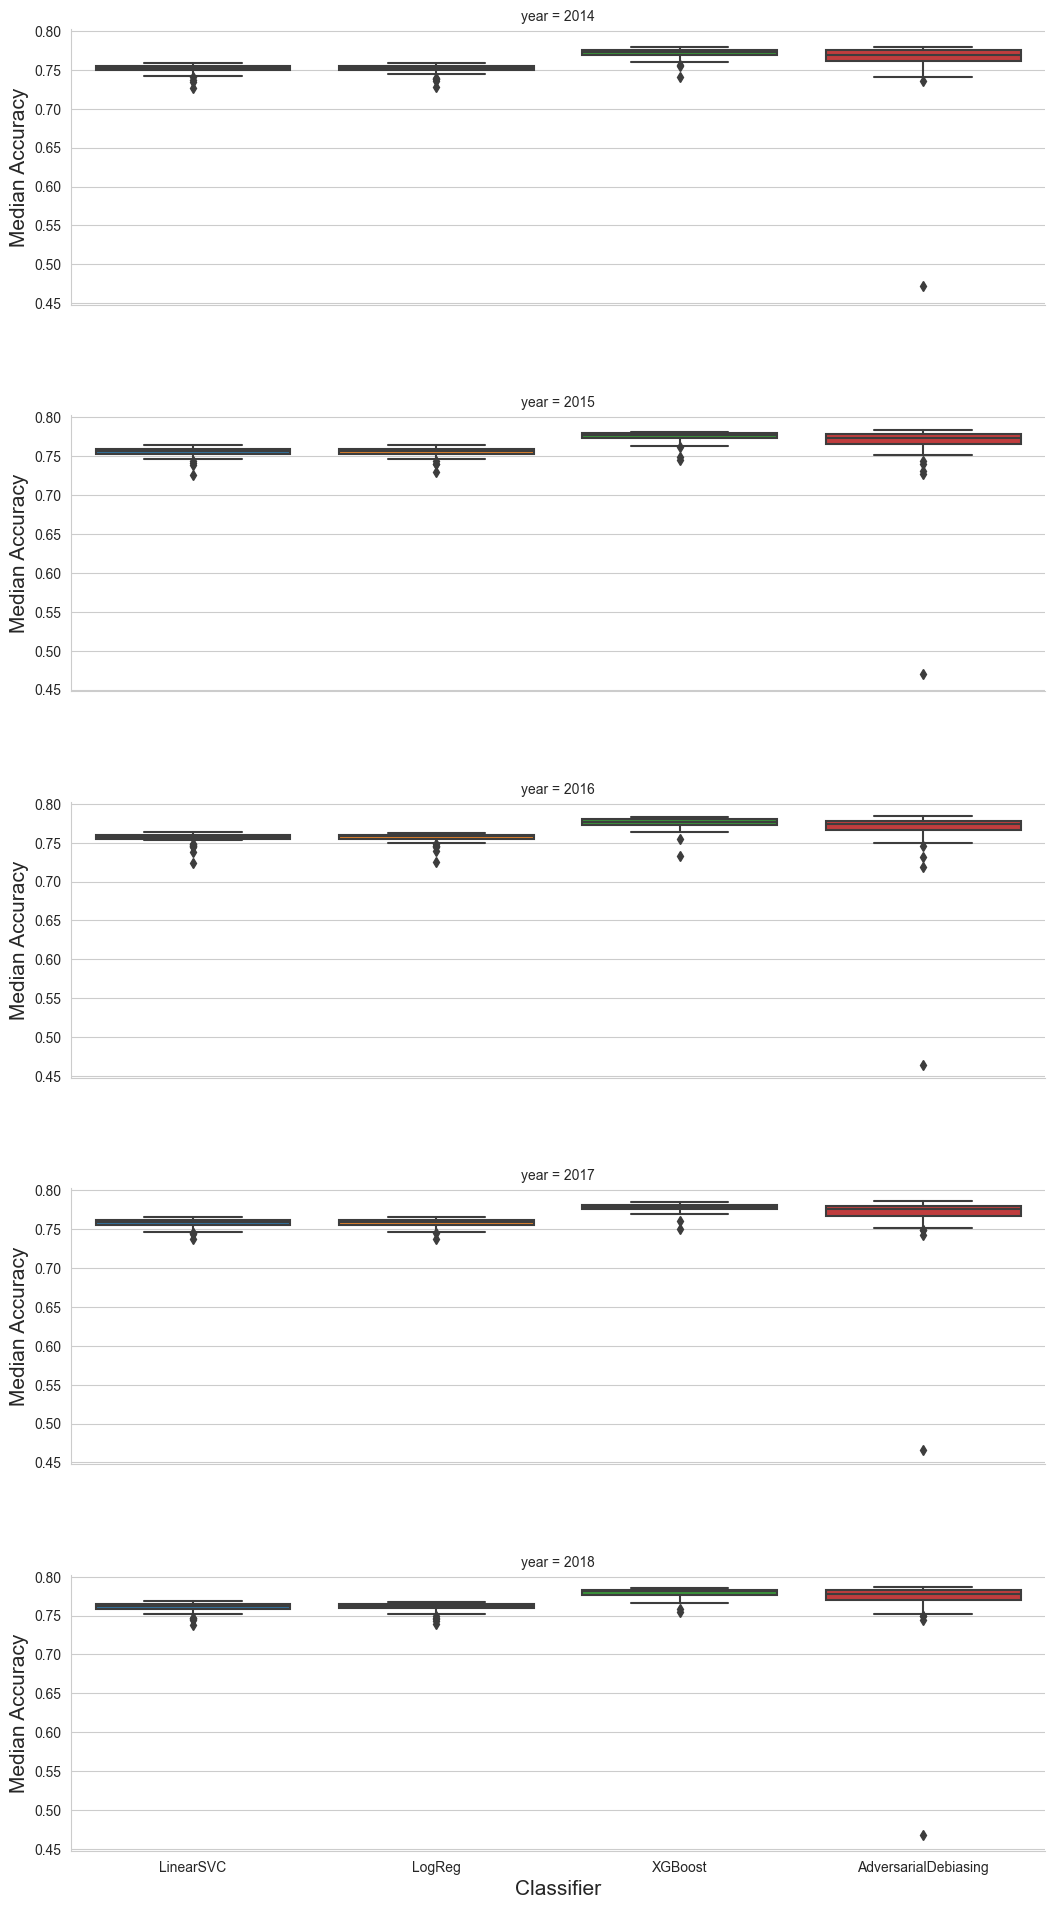

In [6]:
# median accuracy

clfiers = ['LinearSVC','LogReg','XGBoost','AdversarialDebiasing']

g = sns.catplot(data=spatial_results, x="classifier", y="median_accuracy", kind="box", order=clfiers, row='year',
                height=4, aspect=2.65)

#g.axes.tick_params(labelsize=15)

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
#leg = g._legend
#leg._loc=8
#leg.set_bbox_to_anchor([0.7, 0.05])
#plt.setp(leg.get_texts(), fontsize=15)
#plt.setp(leg.get_title(), fontsize=15)
g.set_ylabels(label='Median Accuracy',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_normal_dir,'median_accuracy_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_accuracy_normal.png'),format='png',dpi=300)

In [6]:
spatial_results.groupby(by=['year','classifier'])['median_sex_dpd'].mean()

year  classifier          
2014  AdversarialDebiasing    0.060132
      LinearSVC               0.094920
      LogReg                  0.102673
      XGBoost                 0.044168
2015  AdversarialDebiasing    0.061012
      LinearSVC               0.095437
      LogReg                  0.102698
      XGBoost                 0.042833
2016  AdversarialDebiasing    0.060696
      LinearSVC               0.092563
      LogReg                  0.099747
      XGBoost                 0.042057
2017  AdversarialDebiasing    0.057679
      LinearSVC               0.092115
      LogReg                  0.099020
      XGBoost                 0.040082
2018  AdversarialDebiasing    0.055630
      LinearSVC               0.096060
      LogReg                  0.102152
      XGBoost                 0.041413
Name: median_sex_dpd, dtype: float64

XGBoost 0.0123925197638197 AK
XGBoost 0.0754127793273701 ND
XGBoost 0.0739464706751144 TX
XGBoost 0.0757801019792412 UT
AdversarialDebiasing 0.1835977438675002 HI
XGBoost 0.0929630356674207 UT
XGBoost 0.0755678182764162 WY
AdversarialDebiasing 0.127939785595612 MT
AdversarialDebiasing 0.1044529639435636 SC
LinearSVC 0.1769150206233339 ID
LogReg 0.1847032122461434 ID


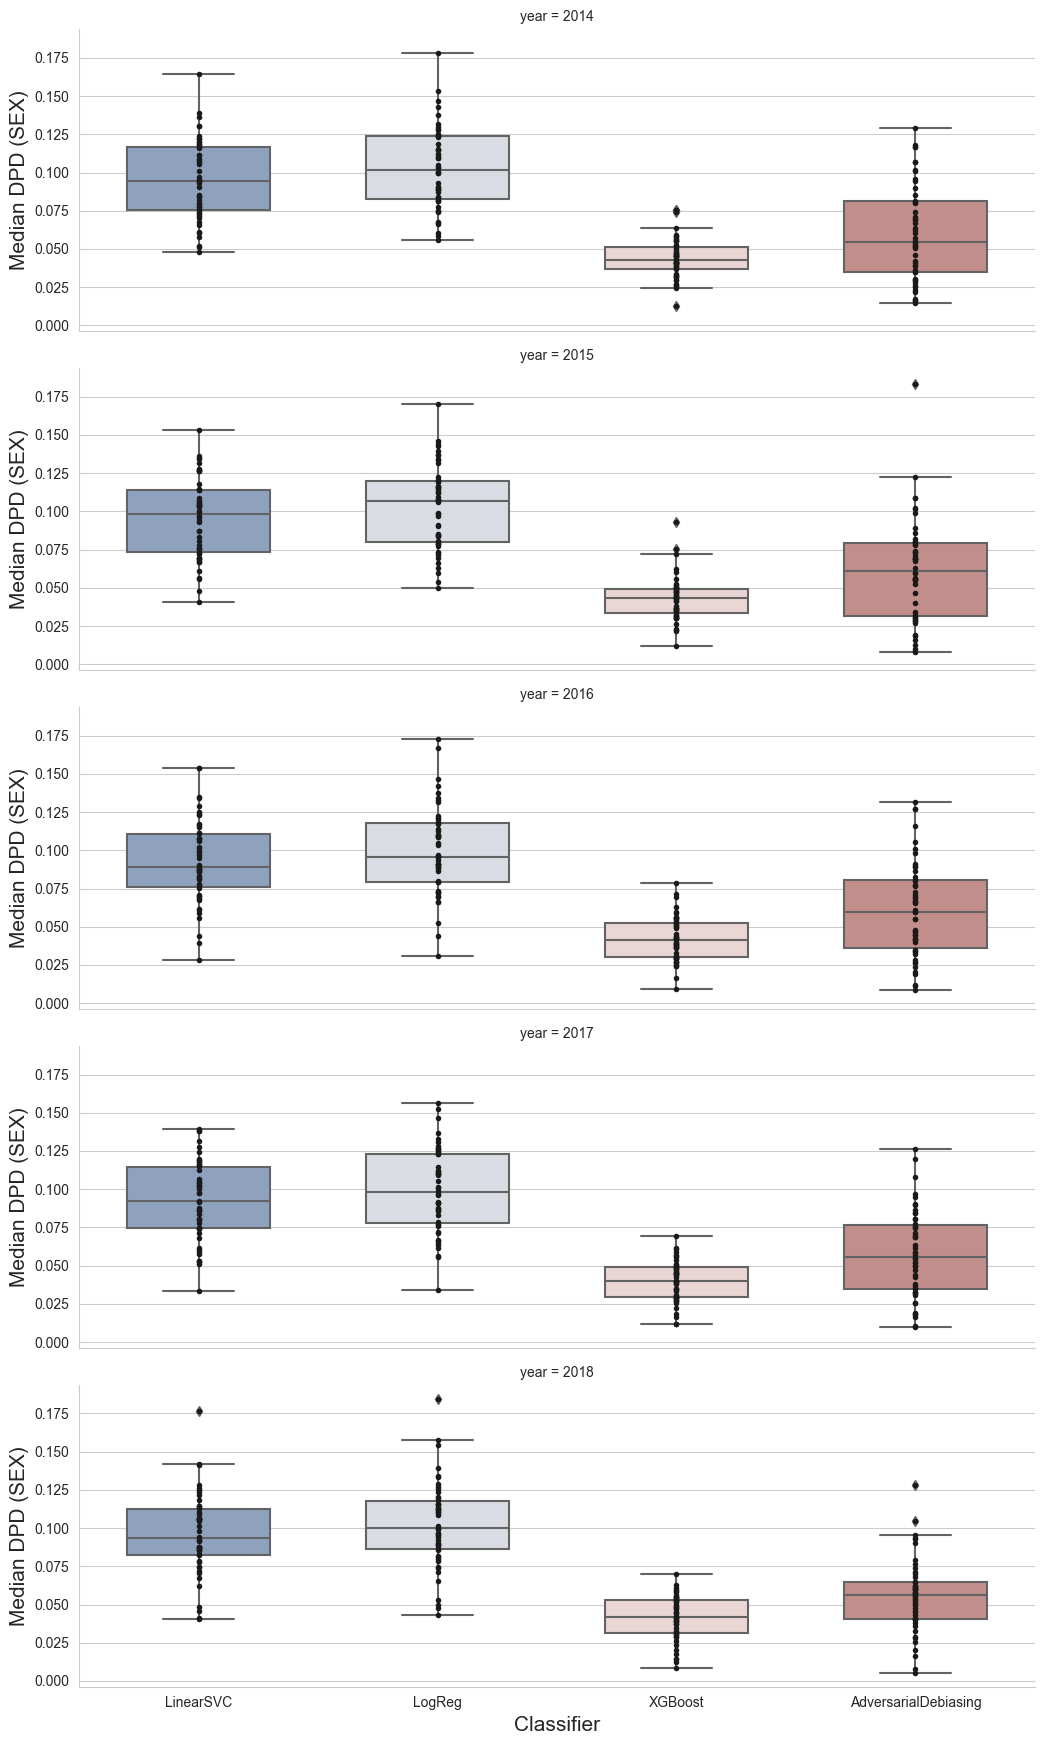

In [8]:
# median DPD SEX
from matplotlib.cbook import boxplot_stats
clfiers_coord={"LogReg":0,'LinearSVC':1,'XGBoost':2,'AdversarialDebiasing':3}

g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_dpd", width=.6, order=clfiers, palette="vlag")
g.map(sns.stripplot,"classifier", "median_sex_dpd", size=4, order=clfiers,jitter=False, color=".1", linewidth=0)

# (outliers with arrow)
for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["state"]):
                 if m in fliers:
                     print(c,m,s)
#                     outlier_states.append(s)
#
#                     ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
#                     (facecolor='black',shrink=0.01))
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))


#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median DPD (SEX)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_normal_dir,'median_sex_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_sex_dpd_normal.png'),format='png',dpi=300)

In [7]:
spatial_results.groupby(by=['year','classifier'])['median_rac_dpd'].mean()

year  classifier          
2014  AdversarialDebiasing    0.145271
      LinearSVC               0.121866
      LogReg                  0.124176
      XGBoost                 0.107223
2015  AdversarialDebiasing    0.141985
      LinearSVC               0.122042
      LogReg                  0.124083
      XGBoost                 0.109185
2016  AdversarialDebiasing    0.136389
      LinearSVC               0.118589
      LogReg                  0.121667
      XGBoost                 0.108502
2017  AdversarialDebiasing    0.140095
      LinearSVC               0.123328
      LogReg                  0.124597
      XGBoost                 0.118573
2018  AdversarialDebiasing    0.147118
      LinearSVC               0.124471
      LogReg                  0.125996
      XGBoost                 0.115329
Name: median_rac_dpd, dtype: float64

AdversarialDebiasing 0.2668426007570924 MT
AdversarialDebiasing 0.981218505951035 VT
AdversarialDebiasing 0.3045372999113973 WY
LinearSVC 0.2812233868350727 ME
LinearSVC 0.2439703339910247 ND
LogReg 0.273572116568177 ME
LogReg 0.2616016320672116 ND
XGBoost 0.1417618745206026 IL
XGBoost 0.1431320263319765 WI
AdversarialDebiasing 0.3091287976966628 HI
AdversarialDebiasing 0.2113398853328891 NM
AdversarialDebiasing 0.2091324940290653 ND
AdversarialDebiasing 0.2742337312145239 SD
AdversarialDebiasing 0.9798951850918518 VT
AdversarialDebiasing 0.3785545220864873 WY
LinearSVC 0.2013801756587202 HI
LinearSVC 0.2000593796590965 NM
LogReg 0.2088086412398638 HI
LogReg 0.2038527875517608 NM
LogReg 0.0408512682701578 VT
XGBoost 0.1430129215042865 HI
XGBoost 0.0621172683491141 MT
XGBoost 0.0682488006139631 ND
XGBoost 0.0760672868185938 RI
XGBoost 0.0685996022538946 WY
AdversarialDebiasing 0.2697093681509872 ME
AdversarialDebiasing 0.17546047056195 ND
AdversarialDebiasing 0.986678111126187 VT
Advers

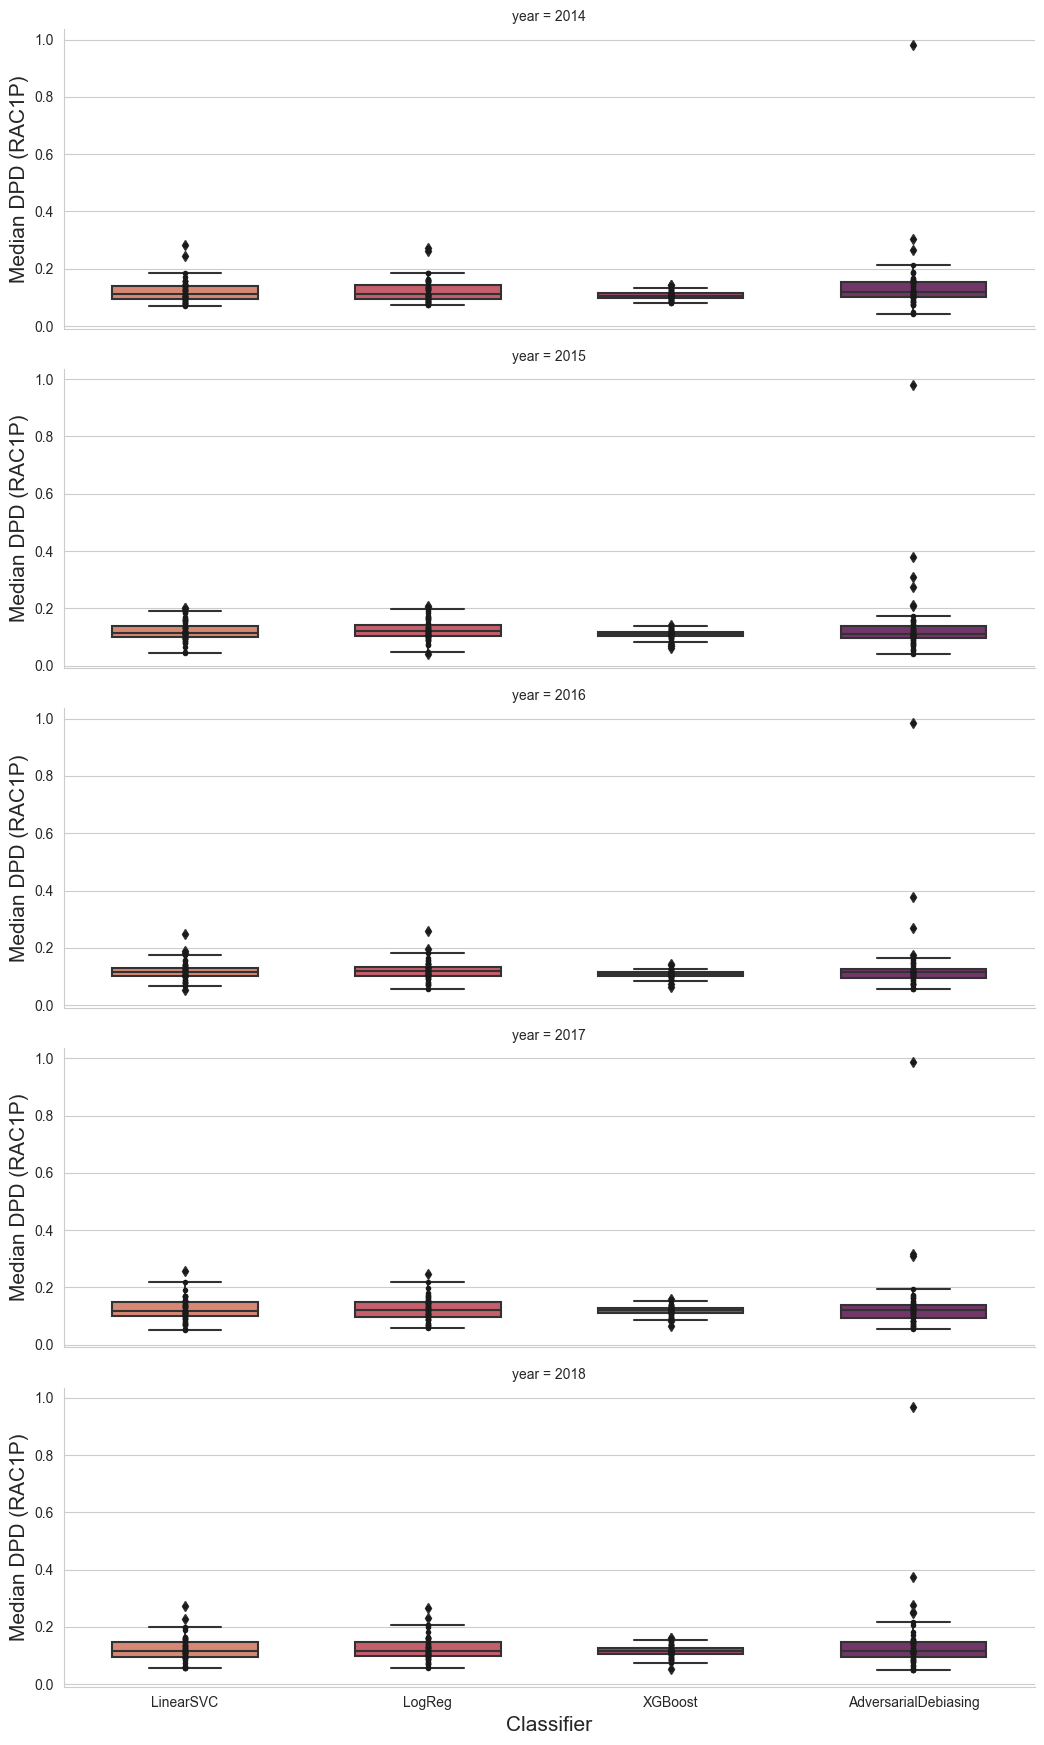

In [9]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_dpd", width=.6, order=clfiers, palette="flare")
g.map(sns.stripplot,"classifier", "median_rac_dpd", size=4, order=clfiers, jitter=False, color=".1", linewidth=0)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["state"]):
                if m in fliers:
                    print(c,m,s)

                    #ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    #(facecolor='black',shrink=0.01))
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))


#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median DPD (RAC1P)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_normal_dir,'median_rac_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_rac_dpd_normal.png'),format='png',dpi=300)

In [8]:
spatial_results.groupby(by=['year','classifier'])['median_sex_eod'].mean()

year  classifier          
2014  AdversarialDebiasing    0.068778
      LinearSVC               0.086486
      LogReg                  0.094888
      XGBoost                 0.050803
2015  AdversarialDebiasing    0.069382
      LinearSVC               0.086806
      LogReg                  0.094905
      XGBoost                 0.051837
2016  AdversarialDebiasing    0.069212
      LinearSVC               0.084316
      LogReg                  0.091878
      XGBoost                 0.053305
2017  AdversarialDebiasing    0.062232
      LinearSVC               0.083676
      LogReg                  0.090837
      XGBoost                 0.051763
2018  AdversarialDebiasing    0.058930
      LinearSVC               0.085843
      LogReg                  0.092159
      XGBoost                 0.054042
Name: median_sex_eod, dtype: float64

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



AdversarialDebiasing 0.123158783208345 AR
AdversarialDebiasing 0.1642673666977163 HI
AdversarialDebiasing 0.1217012648465336 KY
AdversarialDebiasing 0.1227637041709059 MS
AdversarialDebiasing 0.1159321059014422 WV
AdversarialDebiasing 0.1077472268652987 AR
AdversarialDebiasing 0.1991124013285742 HI
AdversarialDebiasing 0.1182161788209551 MS
AdversarialDebiasing 0.0230237132053451 VT
XGBoost 0.0278812875466485 AK
XGBoost 0.0795475567822778 MA
AdversarialDebiasing 0.1400344891824368 MS
XGBoost 0.0857832810461971 AK
AdversarialDebiasing 0.1261553230321074 AL
AdversarialDebiasing 0.103349324503616 AZ
AdversarialDebiasing 0.1189383050963757 LA
AdversarialDebiasing 0.1067010986011406 WV
XGBoost 0.0946930531175607 AK
XGBoost 0.0737913338399454 AR
AdversarialDebiasing 0.097745130153244 AL
AdversarialDebiasing 0.0979846222779354 MS
AdversarialDebiasing 0.1314745282728228 MT
AdversarialDebiasing 0.0983576255297126 SC
AdversarialDebiasing 0.0207300931660223 VT
LinearSVC 0.1736630528730501 ID
LogR

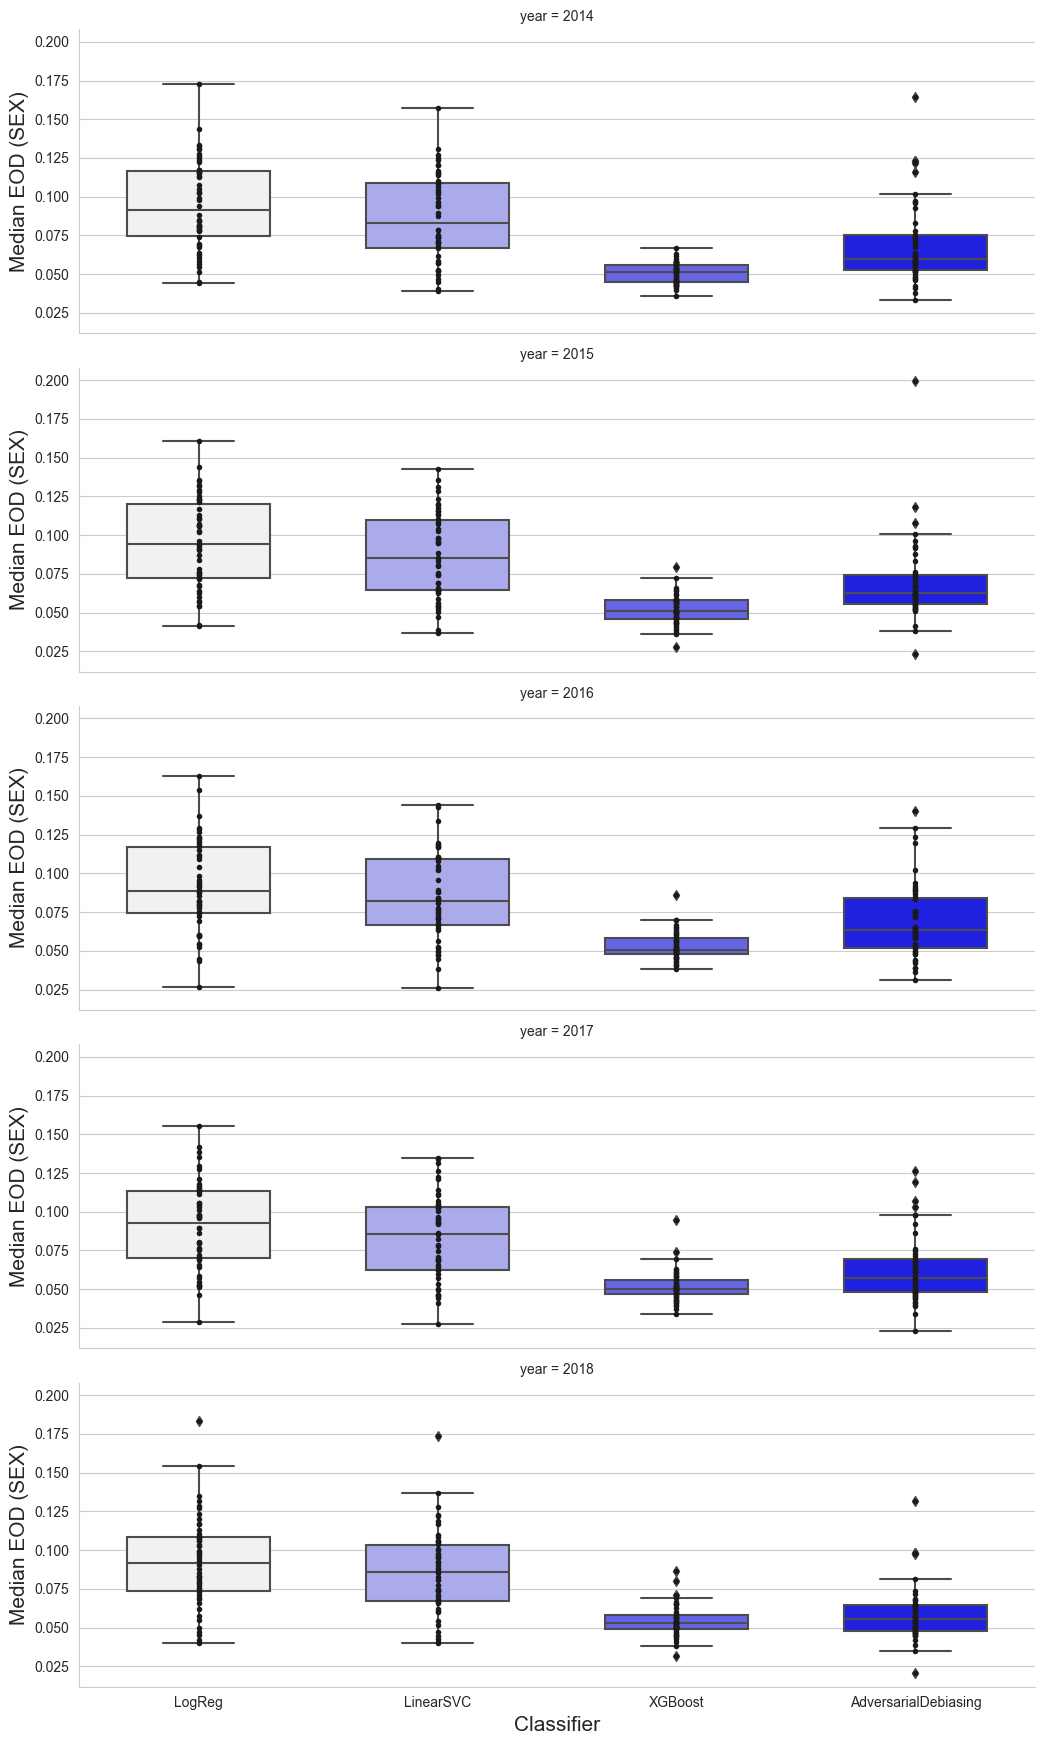

In [10]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_eod", width=.6, palette="light:b")
g.map(sns.stripplot,"classifier", "median_sex_eod", size=4, jitter=False, color=".1", linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["state"]):
                if m in fliers:
                    print(c,m,s)

                    #ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    #(facecolor='black',shrink=0.01))

#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median EOD (SEX)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_normal_dir,'median_sex_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_sex_eod_normal.png'),format='png',dpi=300)

In [9]:
spatial_results.groupby(by=['year','classifier'])['median_rac_eod'].mean()

year  classifier          
2014  AdversarialDebiasing    0.158070
      LinearSVC               0.130189
      LogReg                  0.132413
      XGBoost                 0.121517
2015  AdversarialDebiasing    0.162445
      LinearSVC               0.140746
      LogReg                  0.140949
      XGBoost                 0.131485
2016  AdversarialDebiasing    0.159449
      LinearSVC               0.139466
      LogReg                  0.139739
      XGBoost                 0.131420
2017  AdversarialDebiasing    0.163280
      LinearSVC               0.145166
      LogReg                  0.144351
      XGBoost                 0.142075
2018  AdversarialDebiasing    0.171966
      LinearSVC               0.143686
      LogReg                  0.141848
      XGBoost                 0.138131
Name: median_rac_eod, dtype: float64

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



AdversarialDebiasing 0.30110346382954 MT
AdversarialDebiasing 0.2795058348079774 ND
AdversarialDebiasing 0.9947840042797914 VT
AdversarialDebiasing 0.4500508987407434 WY
LinearSVC 0.2735686274509804 ME
LinearSVC 0.2454281969509028 ND
LogReg 0.2701325900730662 ME
LogReg 0.2677608202768096 ND
XGBoost 0.1735294117647058 ME
XGBoost 0.0751875117278202 WY
AdversarialDebiasing 0.3532019572429242 HI
AdversarialDebiasing 0.3118514896889428 ND
AdversarialDebiasing 0.289318332275587 SD
AdversarialDebiasing 0.995558702368692 VT
AdversarialDebiasing 0.5452906865557468 WY
LinearSVC 0.2363261093911248 HI
LogReg 0.2409006980417248 HI
AdversarialDebiasing 0.2311223712526708 HI
AdversarialDebiasing 0.3619952883199124 ME
AdversarialDebiasing 0.301280918531895 ND
AdversarialDebiasing 0.9965931626771408 VT
AdversarialDebiasing 0.5034493399320537 WY
LinearSVC 0.2839082308535938 ME
LinearSVC 0.2106138285899405 NE
LinearSVC 0.2267896073764426 SD
LogReg 0.2887571580881306 ME
LogReg 0.2125253157494424 NE
LogReg

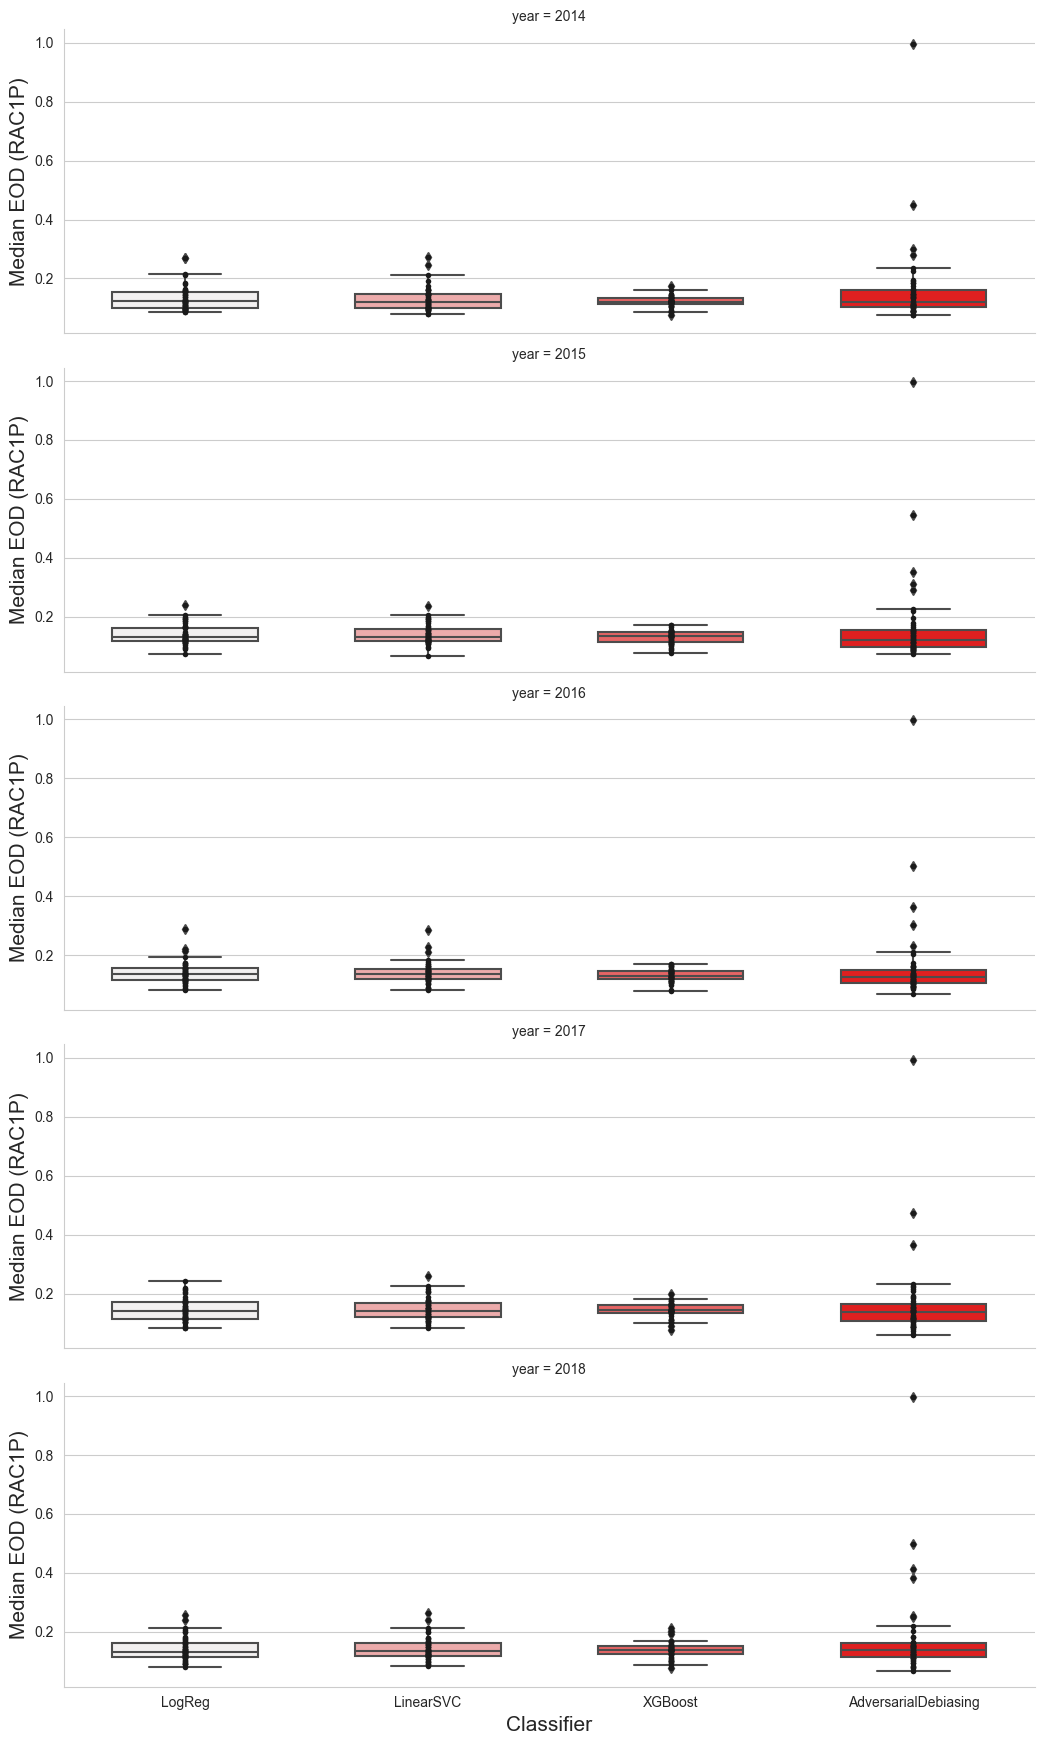

In [11]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_eod", width=.6, palette="light:r")
g.map(sns.stripplot,"classifier", "median_rac_eod", size=4, jitter=False, color=".1", linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["state"]):
                if m in fliers:
                    print(c,m,s)

                    #ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    #(facecolor='black',shrink=0.01))
#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median EOD (RAC1P)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_normal_dir,'median_rac_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_rac_eod_normal.png'),format='png',dpi=300)

## Temporal 2014 plots (no sampling)

In [93]:
temporal_2014_results = pd.read_csv(os.path.join(results_dir,'results_temporal2014_normal.csv'),sep=',',header=0)
temporal_2014_results

classifier  year  train_kfold_accuracy  accuracy  \
0                         LinearSVC  2015              0.759770  0.764971   
1                         LinearSVC  2016              0.759770  0.761548   
2                         LinearSVC  2017              0.759770  0.765655   
3                         LinearSVC  2018              0.759770  0.760174   
4                            LogReg  2015              0.759604  0.764023   
..                              ...   ...                   ...       ...   
991            AdversarialDebiasing  2018              0.730029  0.750324   
992  ExponentiatedGradientReduction  2015              0.730668  0.724452   
993  ExponentiatedGradientReduction  2016              0.730668  0.741964   
994  ExponentiatedGradientReduction  2017              0.730668  0.730197   
995  ExponentiatedGradientReduction  2018              0.730668  0.733060   

     bal_accuracy  precision    recall   sex_dpd   sex_dpr   sex_eod  \
0        0.765926   0.738858  0.794560  0.122744  0.789853  0.126238   
1        0.762046   0.740398  0.793833  0.117801  0.800210  0.122810   
2        0.766432   0.739859  0.804300  0.120635  0.797493  0.119483   
3        0.760374   0.741281  0.795033  0.135020  0.776402  0.124132   
4        0.764700   0.741797  0.785017  0.127855  0.778984  0.134298   
..            ...        ...       ...       ...       ...       ...   
991      0.745667   0.787234  0.776321  0.068407  0.886432  0.090105   
992      0.697978   0.732695  0.841700  0.032457  0.953390  0.019815   
993      0.720268   0.740921  0.854525  0.050121  0.927882  0.025027   
994      0.705270   0.729047  0.855159  0.041047  0.941736  0.031607   
995      0.711149   0.728462  0.855377  0.047856  0.931669  0.020489   

      rac_dpd   rac_dpr train_state   rac_eod  
0    0.098245  0.821680          AL  0.095059  
1    0.100583  0.817364          AL  0.086215  
2    0.120889  0.786991          AL  0.097168  
3    0.101641  0.819508          AL  0.108752  
4    0.088877  0.833003          AL  0.084648  
..        ...       ...         ...       ...  
991  0.304131  0.650249          WY  0.296941  
992  0.054521  0.924709          WY  0.122995  
993  0.106214  0.852223          WY  0.069155  
994  0.077774  0.887395          WY  0.190244  
995  0.073144  0.892725          WY  0.436219  

[996 rows x 14 columns]

In [94]:
temporal_2014_results.groupby(by=['train_state','classifier']).size()

train_state  classifier                    
AK           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
                                              ..
WY           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
Length: 249, dtype: int64

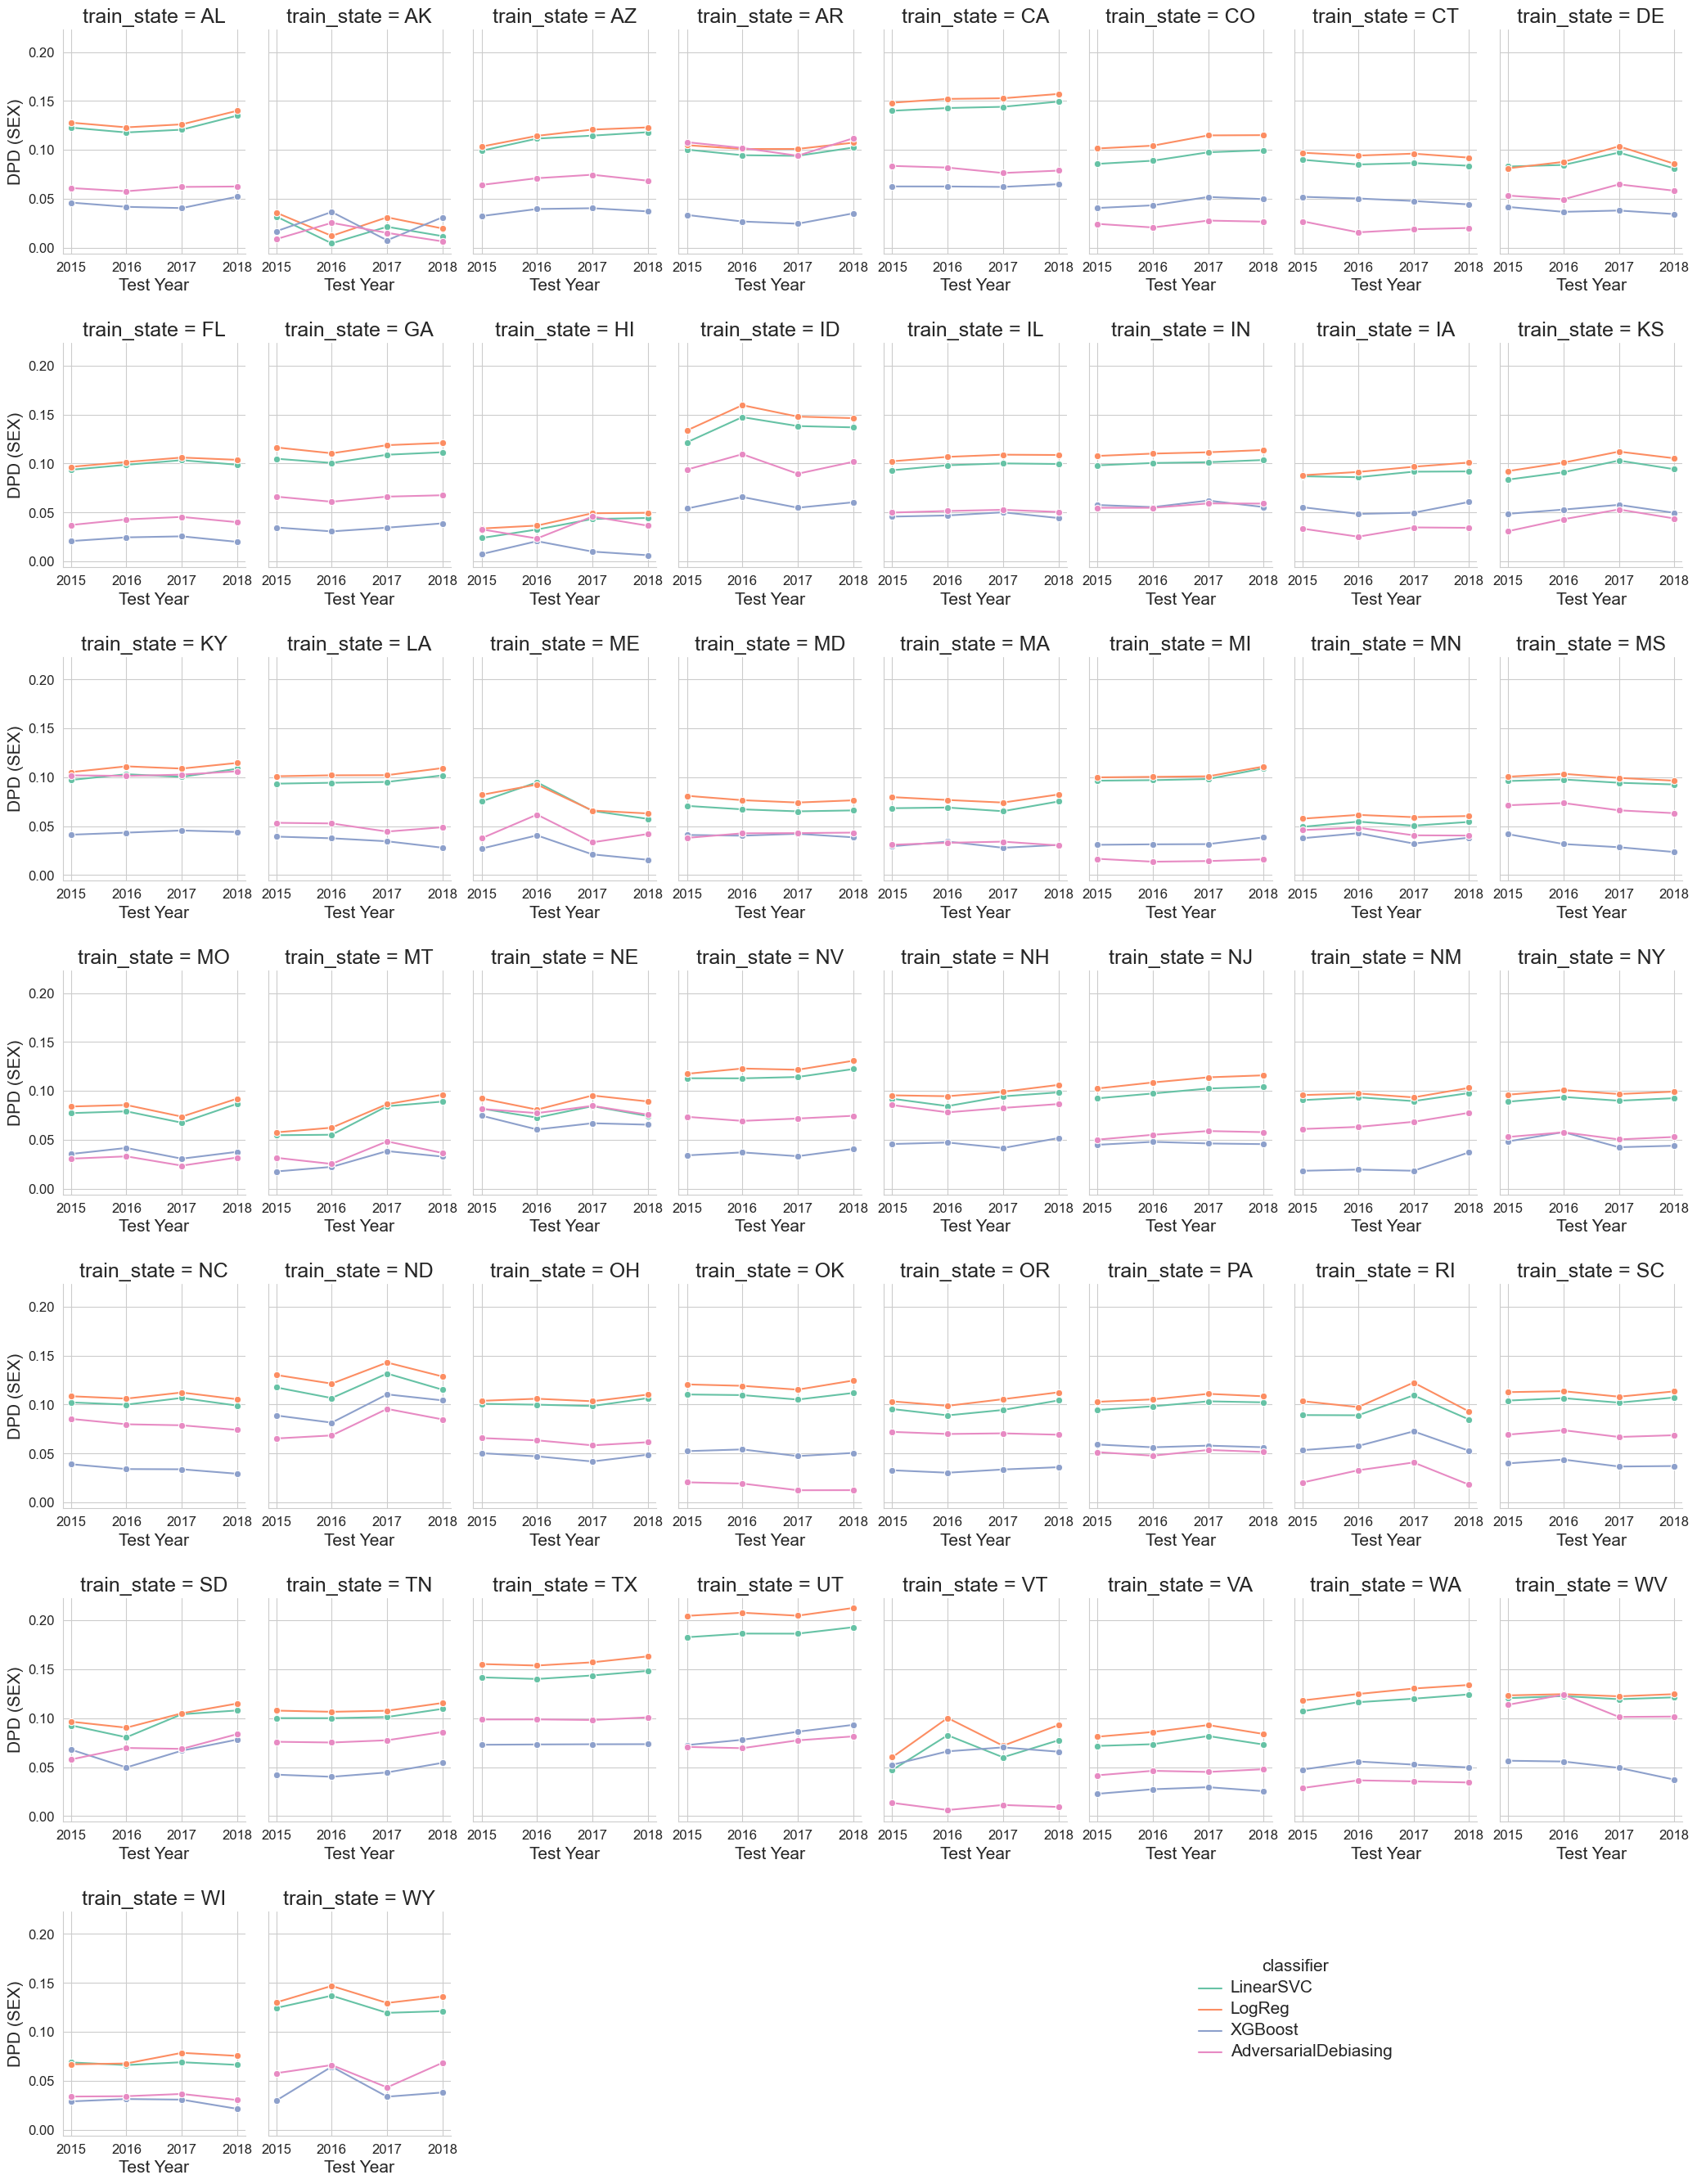

In [95]:
# plot with SEX DPD
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',
                x="year",
                y="sex_dpd",
                marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='Set2',
                height=4, aspect=0.65
           )

for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
    #plt.subplots_adjust(bottom=0.5,hspace=0.5)
    #print(ax.title.get_text()[-2:])

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['dpd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_dpd_normal.png'),format='png',dpi=300)

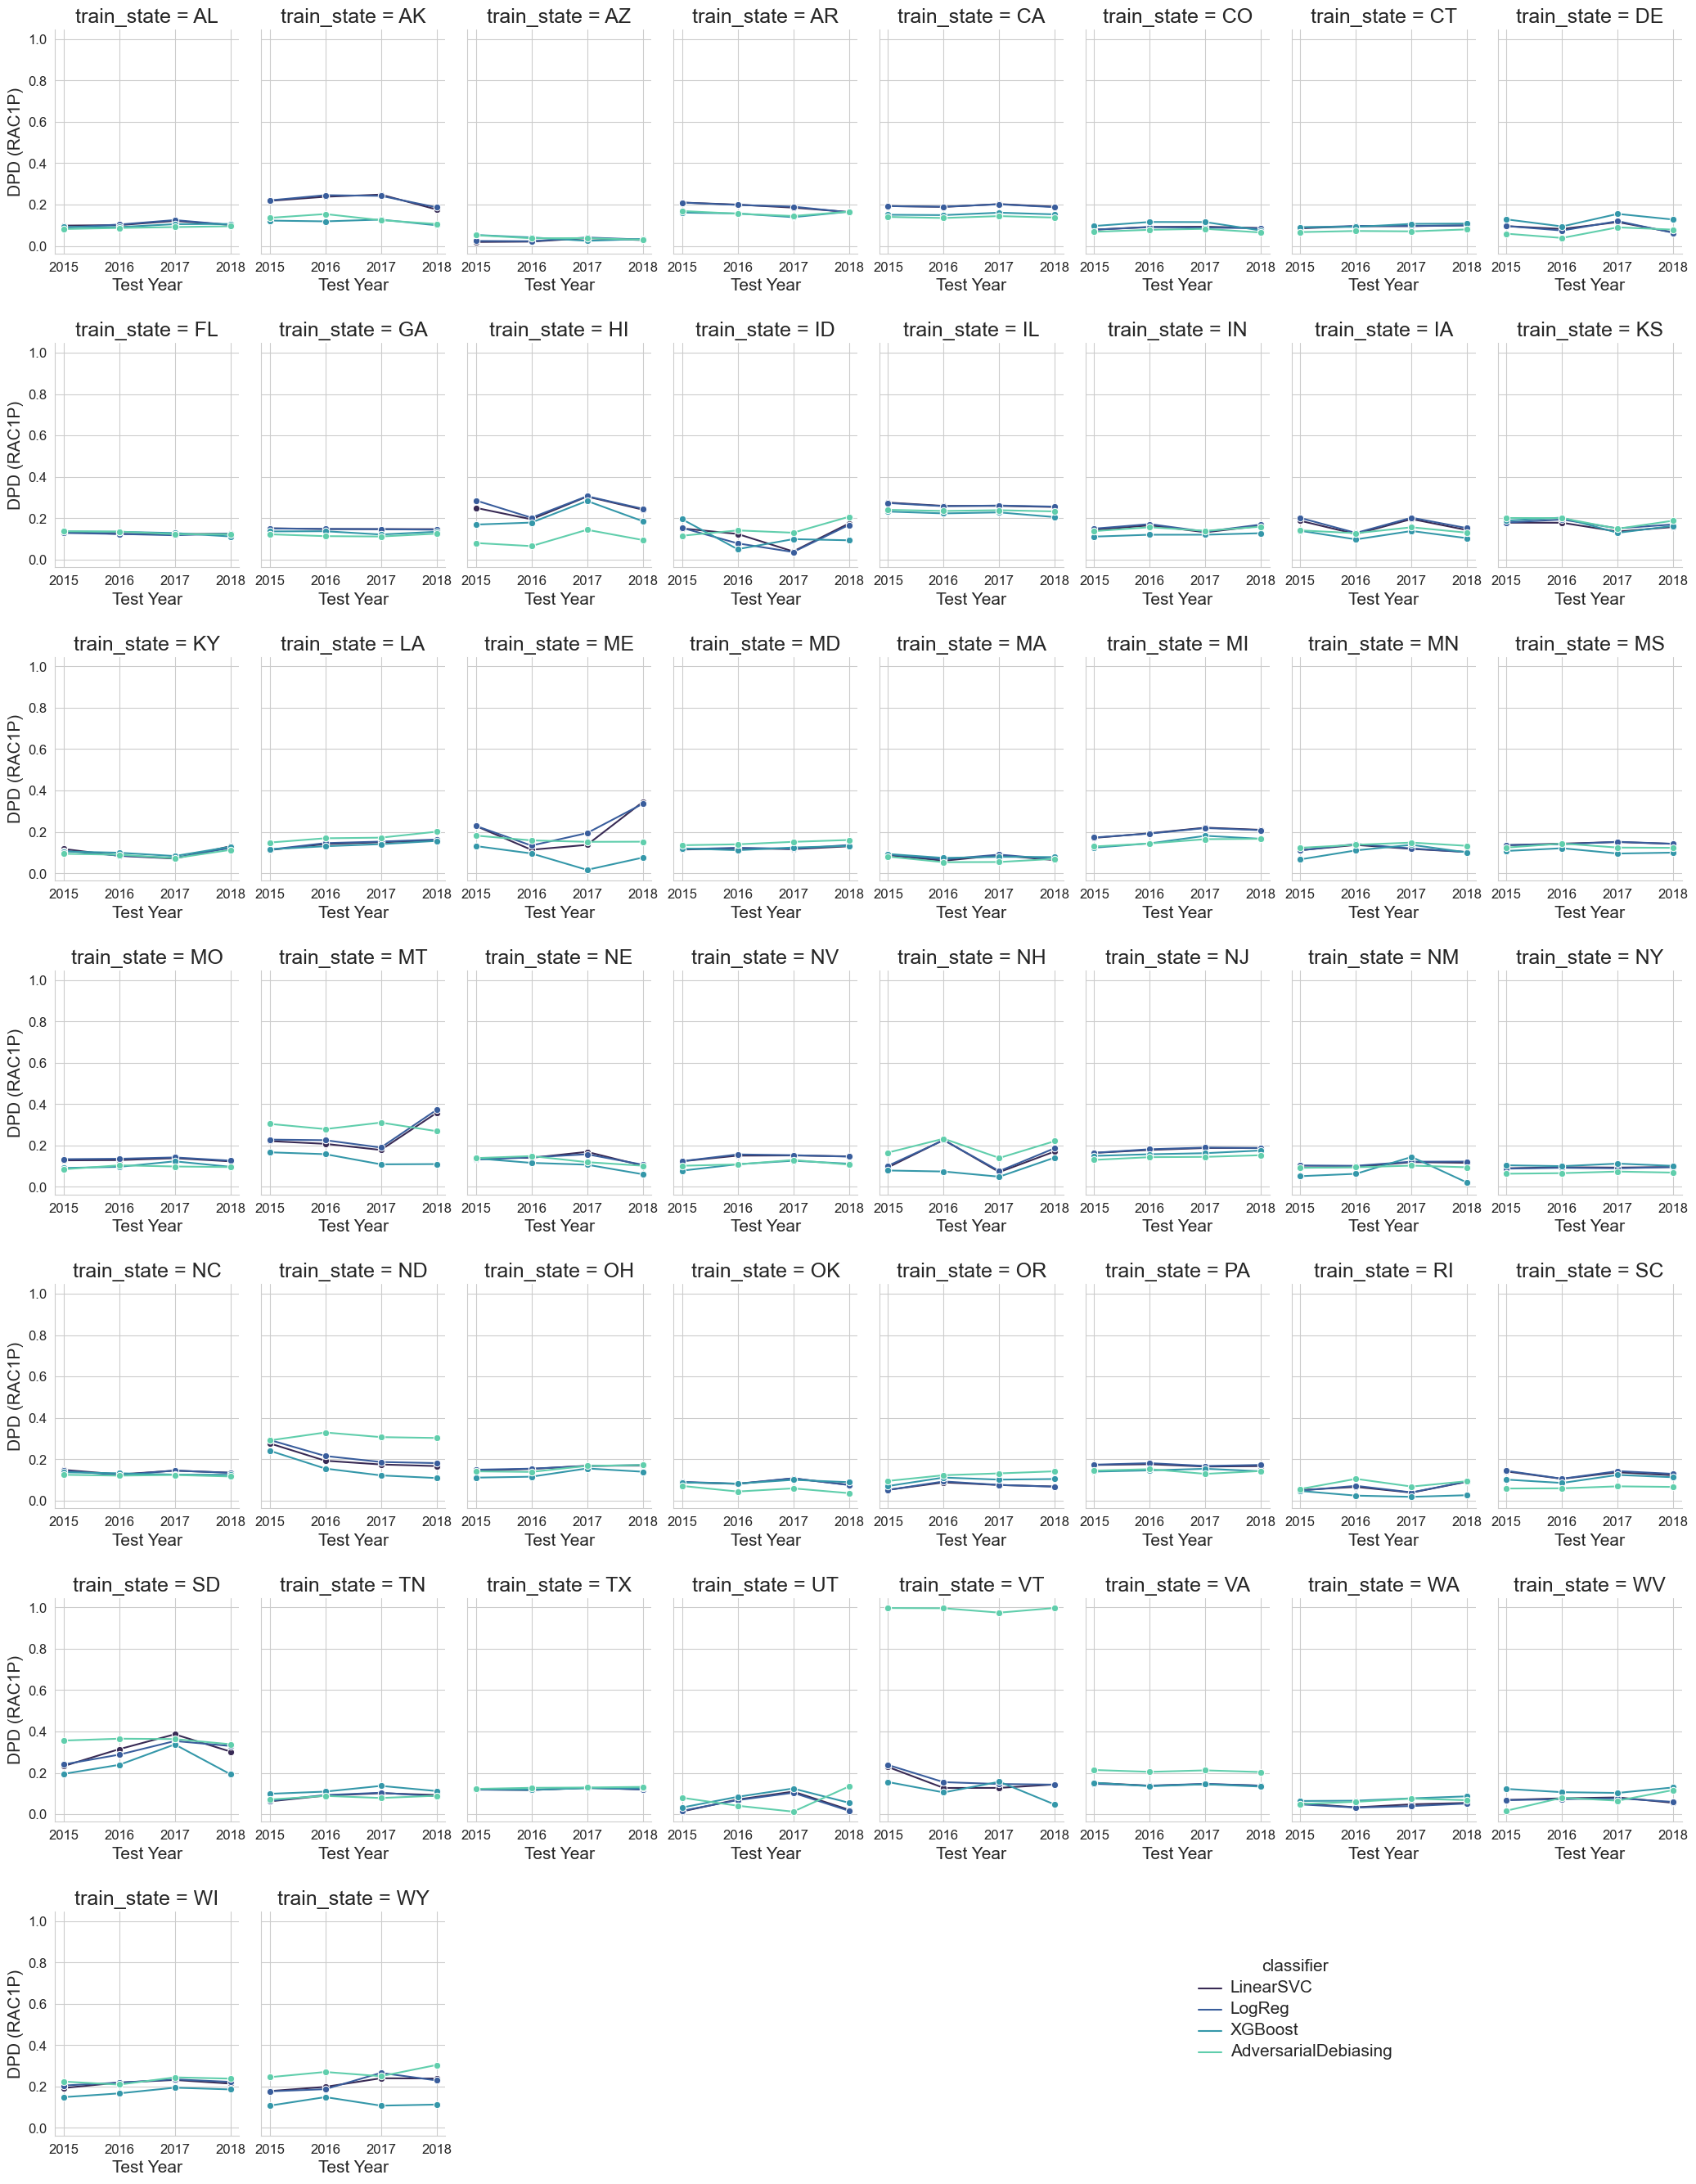

In [96]:
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])],
                kind='line',x="year",y="rac_dpd", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='mako',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
#
#     group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
#     #print(group['spd_sex'].values)
#     ax.scatter([2015,2016,2017,2018],abs(group['dpd_rac'].values),s=15,marker='x',c='red')
plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_dpd_normal.png'),format='png',dpi=300)

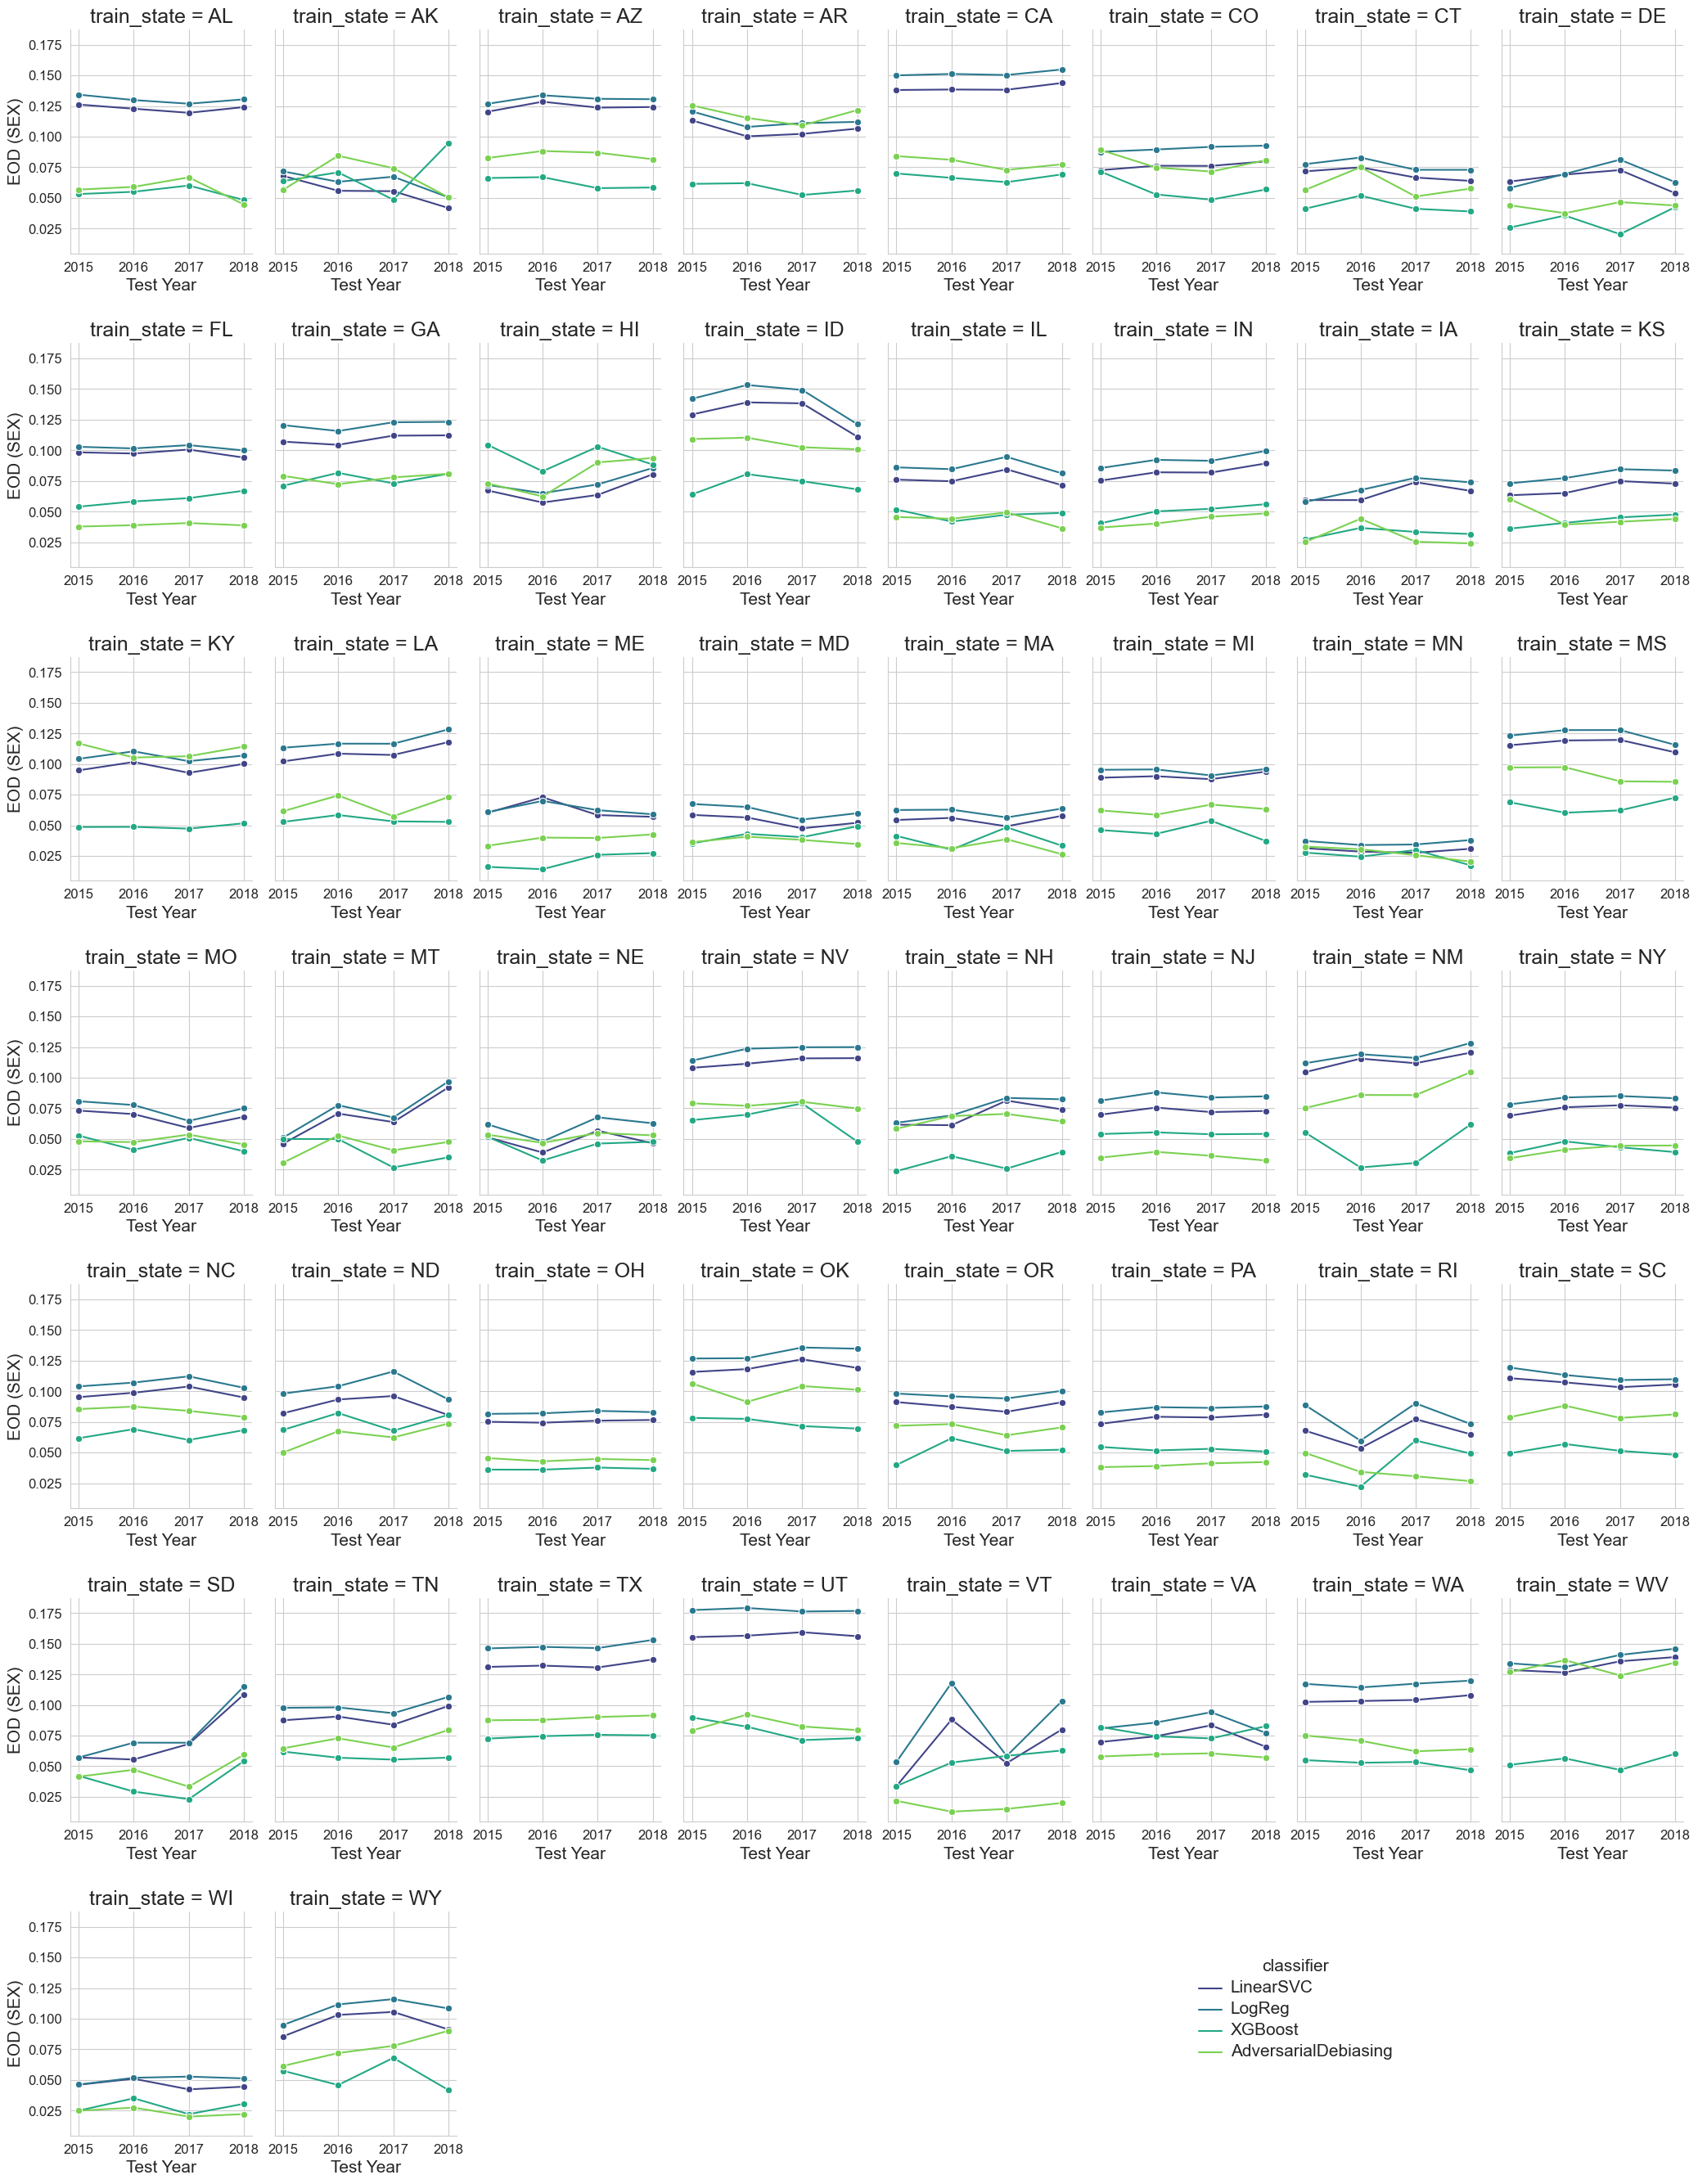

In [97]:
# EOD sex
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="sex_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='viridis',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_eod_normal.png'),format='png',dpi=300)

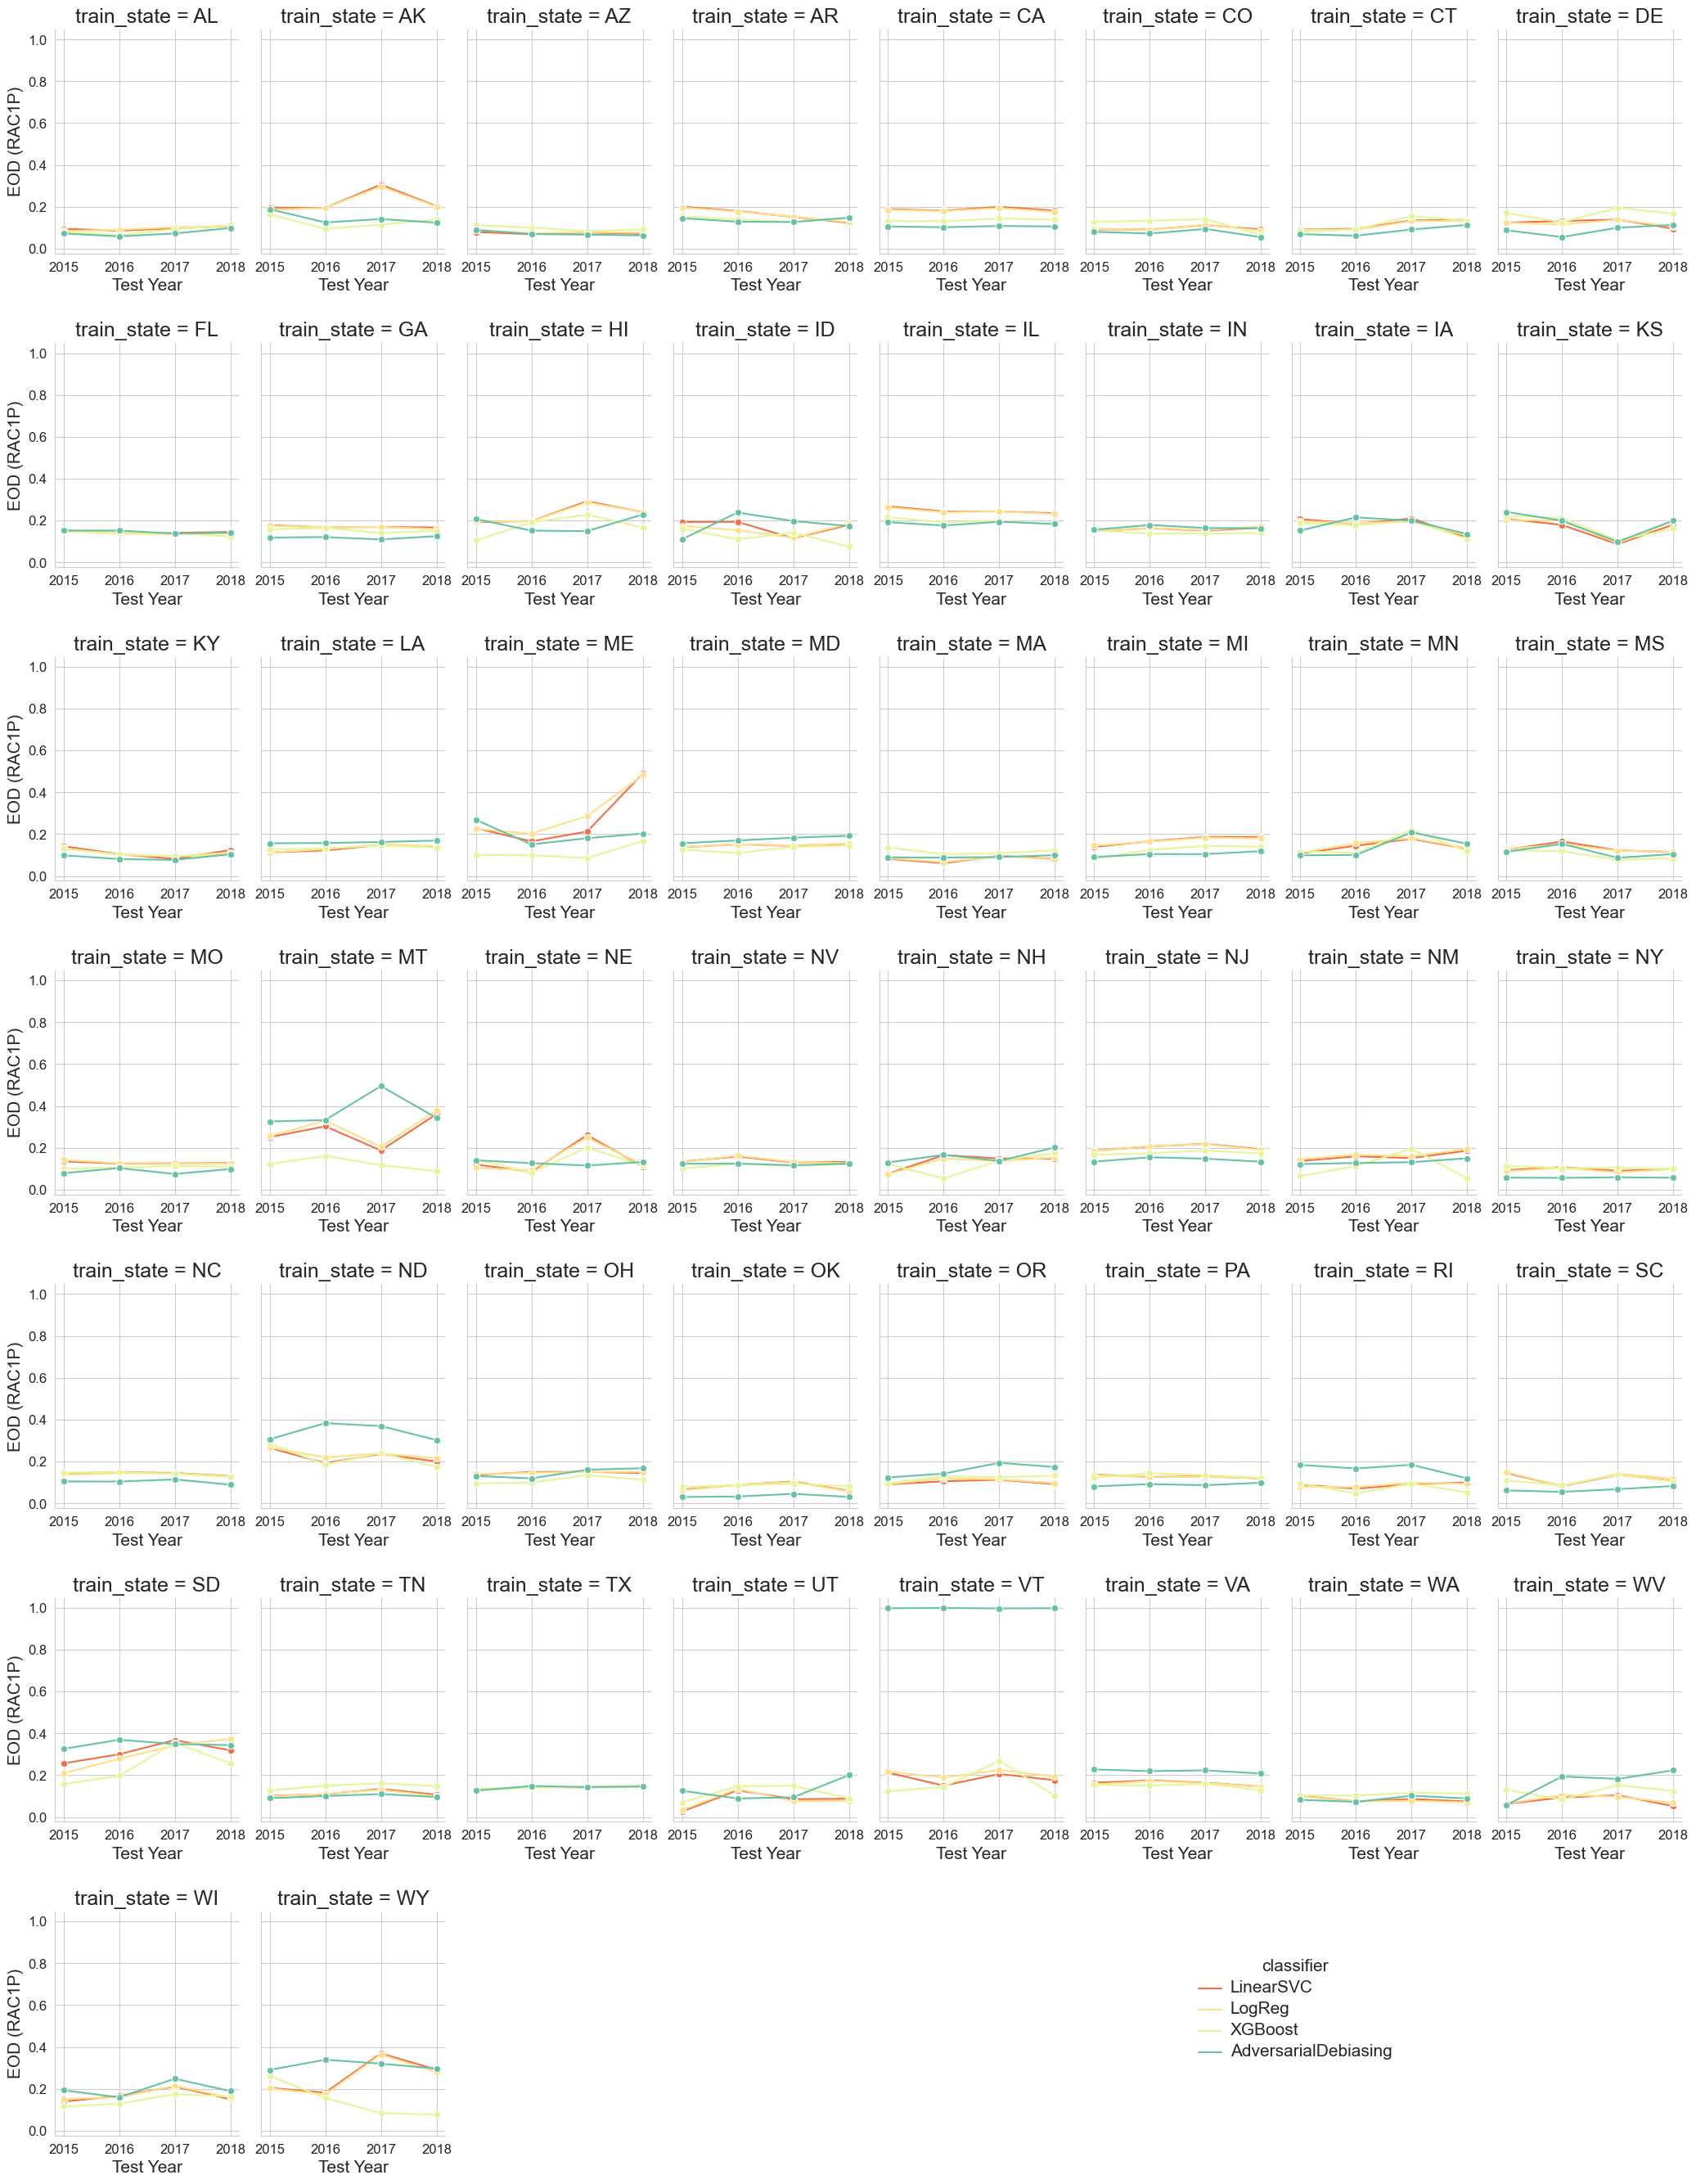

In [98]:
# EOD RAC1P
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="rac_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette="Spectral",
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_eod_normal.png'),format='png',dpi=300)

## Temporal overall results (no sampling)

In [10]:
temporal_results= pd.read_csv(os.path.join(results_dir,"results_temporal_normal.csv"),sep=',',header=0)
temporal_results

classifier  year  train_kfold_accuracy  accuracy  \
0                          LinearSVC  2015              0.759770  0.764971   
1                          LinearSVC  2016              0.759770  0.761548   
2                          LinearSVC  2017              0.759770  0.765655   
3                          LinearSVC  2018              0.759770  0.760174   
4                             LogReg  2015              0.759604  0.764023   
...                              ...   ...                   ...       ...   
4967            AdversarialDebiasing  2017              0.752474  0.756674   
4968  ExponentiatedGradientReduction  2014              0.741797  0.729777   
4969  ExponentiatedGradientReduction  2015              0.741797  0.725971   
4970  ExponentiatedGradientReduction  2016              0.741797  0.738054   
4971  ExponentiatedGradientReduction  2017              0.741797  0.732604   

      bal_accuracy  precision    recall   sex_dpd   sex_dpr   sex_eod  \
0         0.765926   0.738858  0.794560  0.122744  0.789853  0.126238   
1         0.762046   0.740398  0.793833  0.117801  0.800210  0.122810   
2         0.766432   0.739859  0.804300  0.120635  0.797493  0.119483   
3         0.760374   0.741281  0.795033  0.135020  0.776402  0.124132   
4         0.764700   0.741797  0.785017  0.127855  0.778984  0.134298   
...            ...        ...       ...       ...       ...       ...   
4967      0.747208   0.784120  0.804128  0.016553  0.972697  0.087050   
4968      0.710301   0.755116  0.810395  0.038638  0.941502  0.020950   
4969      0.706541   0.747134  0.812019  0.027923  0.957528  0.026095   
4970      0.722308   0.751715  0.819746  0.042080  0.935703  0.023861   
4971      0.715642   0.747513  0.817636  0.055732  0.916275  0.050240   

       rac_dpd   rac_dpr train_state  train_year   rac_eod  
0     0.098245  0.821680          AL        2014  0.095059  
1     0.100583  0.817364          AL        2014  0.086215  
2     0.120889  0.786991          AL        2014  0.097168  
3     0.101641  0.819508          AL        2014  0.108752  
4     0.088877  0.833003          AL        2014  0.084648  
...        ...       ...         ...         ...       ...  
4967  0.311320  0.655324          WY        2018  0.477687  
4968  0.088686  0.878057          WY        2018  0.154259  
4969  0.115848  0.847292          WY        2018  0.364663  
4970  0.163105  0.782526          WY        2018  0.179927  
4971  0.136265  0.816338          WY        2018  0.233954  

[4972 rows x 15 columns]

In [11]:
temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby(by=['train_state',
                                                                                                       'train_year',
                                                                                                       'classifier'])\
    .size()

train_state  train_year  classifier          
AK           2014        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
             2015        AdversarialDebiasing    4
                                                ..
WY           2017        XGBoost                 4
             2018        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
Length: 1000, dtype: int64

In [12]:
acc_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_accuracy=('accuracy','median')).reset_index()
acc_temporal

train_year            classifier train_state  median_accuracy
0          2014  AdversarialDebiasing          AK         0.736671
1          2014  AdversarialDebiasing          AL         0.781897
2          2014  AdversarialDebiasing          AR         0.778571
3          2014  AdversarialDebiasing          AZ         0.780073
4          2014  AdversarialDebiasing          CA         0.775303
..          ...                   ...         ...              ...
995        2018               XGBoost          VT         0.777636
996        2018               XGBoost          WA         0.780075
997        2018               XGBoost          WI         0.808082
998        2018               XGBoost          WV         0.776194
999        2018               XGBoost          WY         0.761484

[1000 rows x 4 columns]

In [13]:
acc_temporal.groupby(by=['train_year','classifier']).size()

train_year  classifier          
2014        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2015        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2016        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2017        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2018        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
dtype: int64

In [15]:
acc_temporal.groupby(by=['train_year','classifier']).agg(**{'avg_median_accuracy':('median_accuracy','mean')})

avg_median_accuracy
train_year classifier                               
2014       AdversarialDebiasing             0.773238
           LinearSVC                        0.761901
           LogReg                           0.761830
           XGBoost                          0.783899
2015       AdversarialDebiasing             0.772737
           LinearSVC                        0.762687
           LogReg                           0.762576
           XGBoost                          0.784192
2016       AdversarialDebiasing             0.771975
           LinearSVC                        0.763190
           LogReg                           0.763012
           XGBoost                          0.783657
2017       AdversarialDebiasing             0.772676
           LinearSVC                        0.763215
           LogReg                           0.763171
           XGBoost                          0.783118
2018       AdversarialDebiasing             0.772631
           LinearSVC                        0.764168
           LogReg                           0.764017
           XGBoost                          0.782156

In [16]:
acc_temporal_table_results = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])]\
    .groupby(by=["train_year","classifier","train_state"]).agg(**{'median_accuracy':('accuracy','mean'),
                                                      'median_sex_dpd':('sex_dpd','mean'),
                                                      'median_rac_dpd':('rac_dpd','mean'),
                                                      'median_sex_eod':('sex_eod','mean'),
                                                      'median_rac_eod':('rac_eod','mean')}).reset_index()

acc_temporal_table_results

train_year            classifier train_state  median_accuracy  \
0          2014  AdversarialDebiasing          AK         0.735394   
1          2014  AdversarialDebiasing          AL         0.781899   
2          2014  AdversarialDebiasing          AR         0.778164   
3          2014  AdversarialDebiasing          AZ         0.780257   
4          2014  AdversarialDebiasing          CA         0.774808   
..          ...                   ...         ...              ...   
995        2018               XGBoost          VT         0.774811   
996        2018               XGBoost          WA         0.780813   
997        2018               XGBoost          WI         0.807390   
998        2018               XGBoost          WV         0.776175   
999        2018               XGBoost          WY         0.762053   

     median_sex_dpd  median_rac_dpd  median_sex_eod  median_rac_eod  
0          0.014002        0.130096        0.066448        0.145169  
1          0.060871        0.088673        0.056803        0.075929  
2          0.103922        0.158678        0.117931        0.137750  
3          0.069605        0.039055        0.084851        0.072627  
4          0.080185        0.139071        0.078895        0.106048  
..              ...             ...             ...             ...  
995        0.009486        0.102698        0.027982        0.218303  
996        0.034303        0.082307        0.068553        0.118739  
997        0.024852        0.165090        0.033962        0.137667  
998        0.040814        0.129197        0.046510        0.139638  
999        0.058996        0.085905        0.061379        0.181428  

[1000 rows x 8 columns]

In [23]:
print(acc_temporal_table_results.groupby(by=['train_year','classifier']).agg(**{'Median Accuracy (AVG)':
                                                                               ('median_accuracy','mean'),
                                                      'Median Accuracy (STD)':('median_accuracy','std'),
                                                      'Median DPD SEX (AVG)':('median_sex_dpd','mean'),
                                                      'Median DPD SEX (STD)':('median_sex_dpd','std'),
                                                      'Median DPD RAC1P (AVG)':('median_rac_dpd','mean'),
                                                      'Median DPD RAC1P (STD)':('median_rac_dpd','std'),
                                                      'Median EOD SEX (AVG)':('median_sex_eod','mean'),
                                                      'Median EOD SEX (STD)':('median_sex_eod','std'),
                                                      'Median EOD RAC1P (AVG)':('median_rac_eod','mean'),
                                                      'Median EOD RAC1P (STD)':('median_rac_eod','std')}
                                                      ).to_latex(float_format="%.3f",
                                                                 bold_rows=True,
                                                                 caption='Temporal context analyses results'))

\begin{table}
\centering
\caption{Temporal context analyses results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         &  Median Accuracy (AVG) &  Median Accuracy (STD) &  Median DPD SEX (AVG) &  Median DPD SEX (STD) &  Median DPD RAC1P (AVG) &  Median DPD RAC1P (STD) &  Median EOD SEX (AVG) &  Median EOD SEX (STD) &  Median EOD RAC1P (AVG) &  Median EOD RAC1P (STD) \\
\textbf{train\_year} & \textbf{classifier} &                        &                        &                       &                       &                         &                         &                       &                       &                         &                         \\
\midrule
\textbf{2014} & \textbf{AdversarialDebiasing} &                  0.773 &                  0.054 &                 0.056 &                 0.025 &                   0.153 &                   0.139 &                 0.063 &                 0.026 &                   0.164 &                   0.140 \\
     & \textbf{Linea

C:\Users\sarab\AppData\Local\Temp\ipykernel_16328\2051406010.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



2014 -> AdversarialDebiasing 0.736671459002598 AK
2014 -> AdversarialDebiasing 0.41286228341241055 VT
2014 -> LinearSVC 0.7256055578867556 AK
2014 -> LogReg 0.725701041549629 AK
2014 -> XGBoost 0.737928820572713 AK
2014 -> XGBoost 0.7583010830134652 NM
2014 -> XGBoost 0.8099581450172113 WI
2015 -> AdversarialDebiasing 0.7337942967330164 AK
2015 -> AdversarialDebiasing 0.4139818499672977 VT
2015 -> AdversarialDebiasing 0.7241074263270261 WY
2015 -> LinearSVC 0.7238234509557537 AK
2015 -> LogReg 0.7243129456509361 AK
2015 -> XGBoost 0.741380135072635 AK
2015 -> XGBoost 0.7581020777369661 NM
2015 -> XGBoost 0.8086228764409275 WI
2016 -> AdversarialDebiasing 0.7355901188309435 AK
2016 -> AdversarialDebiasing 0.41278384981444016 VT
2016 -> AdversarialDebiasing 0.705695931090519 WY
2016 -> LinearSVC 0.729545542369803 AK
2016 -> LinearSVC 0.7898136238168711 WI
2016 -> LogReg 0.7285782186482006 AK
2016 -> LogReg 0.791307060932392 WI
2016 -> XGBoost 0.745487737657961 AK
2016 -> XGBoost 0.755614

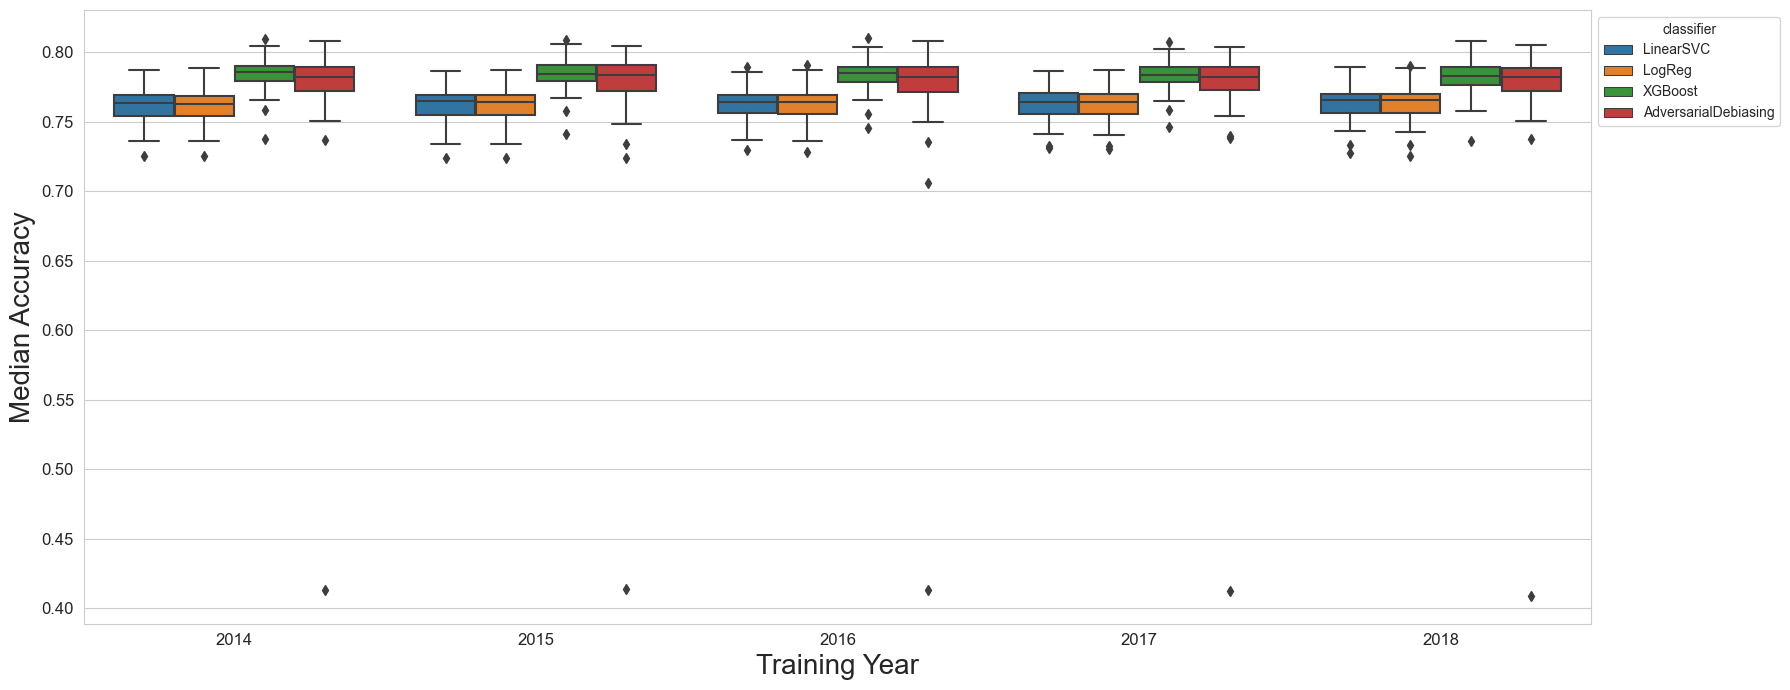

In [19]:
plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_accuracy",
                 hue="classifier",
                 data=acc_temporal,
                 hue_order=clfiers)
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median Accuracy",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(acc_temporal["classifier"]):
        group = acc_temporal.loc[(acc_temporal["train_year"] == y) & (acc_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_accuracy"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_accuracy"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_accuracy_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_accuracy_normal.png'),format='png',dpi=300)

NameError: name 'boxplot_stats' is not defined

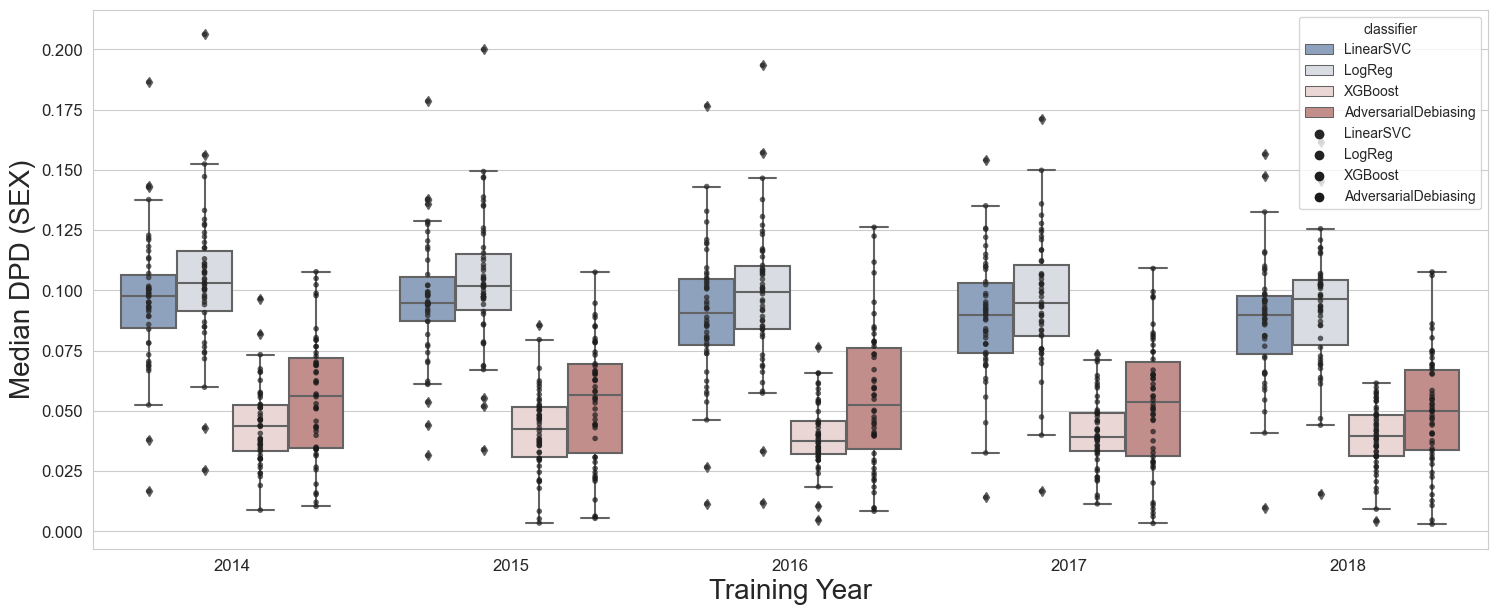

In [16]:
# median DPD SEX

sex_dpd_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_dpd=('sex_dpd','median')).reset_index()

clfiers=['LinearSVC','LogReg','XGBoost','AdversarialDebiasing']

plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_dpd",
                 hue="classifier",
                 data=sex_dpd_temporal,
                 palette="vlag",
                 hue_order=clfiers
                 )

sns.stripplot(data=sex_dpd_temporal,x="train_year",y= "median_sex_dpd",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1", alpha=0.7,
              linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(sex_dpd_temporal["classifier"]):
        group = sex_dpd_temporal.loc[(sex_dpd_temporal["train_year"] == y) & (sex_dpd_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_dpd_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_dpd_normal.png'),format='png',dpi=300)

In [17]:
sex_dpd_temporal.groupby(by=['train_year','classifier'])['median_sex_dpd'].mean()

train_year  classifier          
2014        AdversarialDebiasing    0.055834
            LinearSVC               0.095969
            LogReg                  0.103996
            XGBoost                 0.044058
2015        AdversarialDebiasing    0.053644
            LinearSVC               0.096264
            LogReg                  0.103718
            XGBoost                 0.041541
2016        AdversarialDebiasing    0.055368
            LinearSVC               0.090152
            LogReg                  0.097402
            XGBoost                 0.039852
2017        AdversarialDebiasing    0.052466
            LinearSVC               0.088730
            LogReg                  0.095715
            XGBoost                 0.041289
2018        AdversarialDebiasing    0.049542
            LinearSVC               0.087551
            LogReg                  0.093769
            XGBoost                 0.039037
Name: median_sex_dpd, dtype: float64

NameError: name 'boxplot_stats' is not defined

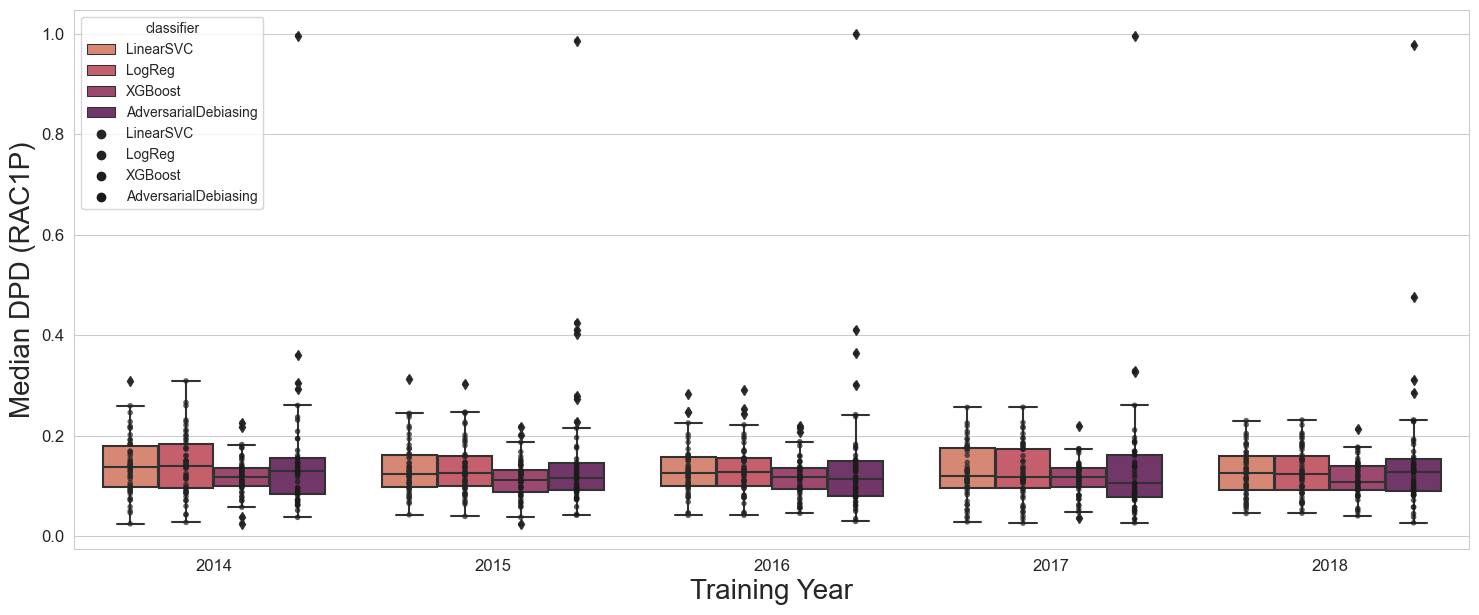

In [18]:
# median DPD RAC1P

rac_dpd_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_dpd=('rac_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_dpd",
                 hue="classifier",
                 data=rac_dpd_temporal,
                 palette="flare",
                 hue_order=clfiers
                 )


sns.stripplot(data=rac_dpd_temporal,x="train_year",y= "median_rac_dpd",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, alpha=0.7, palette="dark:.1", \
                                                                                                  linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(rac_dpd_temporal["classifier"]):
        group = rac_dpd_temporal.loc[(rac_dpd_temporal["train_year"] == y) & (rac_dpd_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_dpd_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_dpd_normal.png'),format='png',dpi=300)

In [19]:
rac_dpd_temporal.groupby(by=['train_year','classifier'])['median_rac_dpd'].mean()

train_year  classifier          
2014        AdversarialDebiasing    0.152668
            LinearSVC               0.140906
            LogReg                  0.143217
            XGBoost                 0.119118
2015        AdversarialDebiasing    0.156073
            LinearSVC               0.135543
            LogReg                  0.137086
            XGBoost                 0.113667
2016        AdversarialDebiasing    0.145776
            LinearSVC               0.131838
            LogReg                  0.133000
            XGBoost                 0.117423
2017        AdversarialDebiasing    0.138325
            LinearSVC               0.127581
            LogReg                  0.128363
            XGBoost                 0.116080
2018        AdversarialDebiasing    0.151775
            LinearSVC               0.126745
            LogReg                  0.128378
            XGBoost                 0.114186
Name: median_rac_dpd, dtype: float64

NameError: name 'boxplot_stats' is not defined

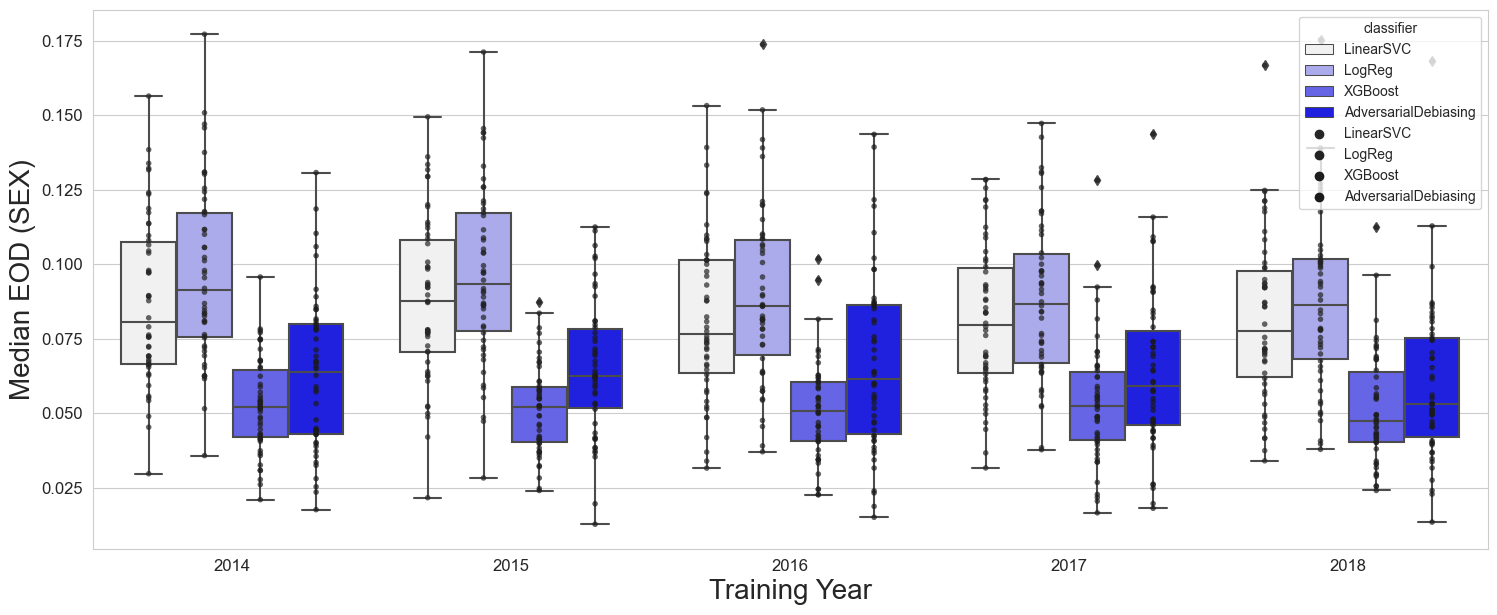

In [20]:
# median EOD SEX
sex_eod_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_eod=('sex_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_eod",
                 hue="classifier",
                 data=sex_eod_temporal,
                 palette="light:b",
                 hue_order=clfiers
                 )


sns.stripplot(data=sex_eod_temporal,x="train_year",y= "median_sex_eod",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1",alpha=0.7,
linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(sex_eod_temporal["classifier"]):
        group = sex_eod_temporal.loc[(sex_eod_temporal["train_year"] == y) & (sex_eod_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_eod_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_eod_normal.png'),format='png',dpi=300)

In [24]:
sex_eod_temporal['median_sex_eod'].max()

0.177123828225171

2014 -> AdversarialDebiasing 0.338137295692814 MT
2014 -> AdversarialDebiasing 0.3381163109925922 ND
2014 -> AdversarialDebiasing 0.3462855414941058 SD
2014 -> AdversarialDebiasing 0.9980840293271489 VT
2014 -> AdversarialDebiasing 0.30861702677418734 WY
2014 -> LinearSVC 0.3093286419968388 SD
2014 -> LogReg 0.2929611580150326 MT
2014 -> LogReg 0.31046223696839814 SD
2014 -> XGBoost 0.21327589273094666 ND
2014 -> XGBoost 0.2264311206058945 SD
2015 -> AdversarialDebiasing 0.44828842710198635 MT
2015 -> AdversarialDebiasing 0.30383248136994934 ND
2015 -> AdversarialDebiasing 0.42490954387664737 SD
2015 -> AdversarialDebiasing 0.9992882823608153 VT
2015 -> AdversarialDebiasing 0.5737369398374421 WY
2015 -> LinearSVC 0.265120111384967 MT
2015 -> LinearSVC 0.35096197228810544 SD
2015 -> LogReg 0.2860899871935526 MT
2015 -> LogReg 0.260204329876968 NH
2015 -> LogReg 0.3527113686874923 SD
2015 -> XGBoost 0.19969644327494807 HI
2015 -> XGBoost 0.19214719881313386 IL
2015 -> XGBoost 0.067162479

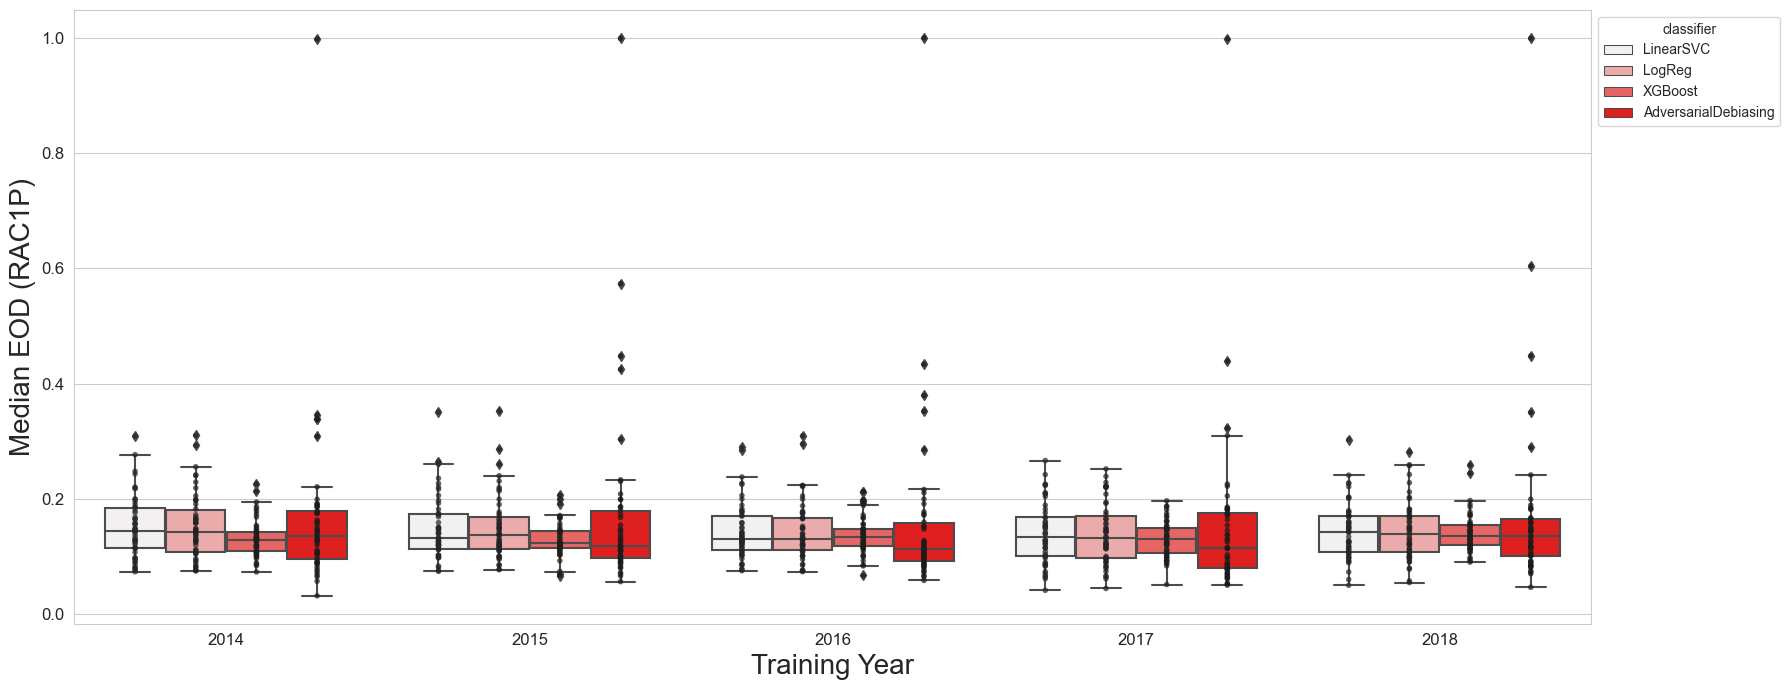

In [23]:
# median EOD RAC1P
rac_eod_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_eod=('rac_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_eod",
                 hue="classifier",
                 data=rac_eod_temporal,
                 palette="light:r",
                 hue_order=clfiers
                 )

sns.stripplot(data=rac_eod_temporal,x="train_year",y= "median_rac_eod",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1",alpha=0.7,
linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(rac_eod_temporal["classifier"]):
        group = rac_eod_temporal.loc[(rac_eod_temporal["train_year"] == y) & (rac_eod_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_eod_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_eod_normal.png'),format='png',dpi=300)

# SAMPLING RESULTS NOW

## Spatial results (sampling)

In [3]:
spatial_results_sampled = pd.read_csv(os.path.join(results_dir,'spatial_results_sampling.csv'),sep=',',header=0)
spatial_results_sampled

year state            classifier  median_accuracy  median_sex_dpd  \
0    2014    AL                LogReg         0.737066        0.031211   
1    2014    AK                LogReg         0.723820        0.035598   
2    2014    AZ                LogReg         0.740682        0.015733   
3    2014    AR                LogReg         0.739956        0.007719   
4    2014    CA                LogReg         0.738412        0.026748   
..    ...   ...                   ...              ...             ...   
995  2018    VA  AdversarialDebiasing         0.774204        0.020487   
996  2018    WA  AdversarialDebiasing         0.774418        0.021661   
997  2018    WV  AdversarialDebiasing         0.769585        0.010311   
998  2018    WI  AdversarialDebiasing         0.771575        0.005955   
999  2018    WY  AdversarialDebiasing         0.756761        0.003906   

     median_sex_dpr  median_sex_eod  median_rac_dpd  median_rac_dpr  \
0          0.948292        0.068702        0.049992        0.919597   
1          0.944126        0.070910        0.095830        0.852233   
2          0.971421        0.060903        0.074674        0.871070   
3          0.985954        0.055766        0.122186        0.794725   
4          0.952582        0.072702        0.090196        0.849284   
..              ...             ...             ...             ...   
995        0.965337        0.075215        0.065079        0.892431   
996        0.963635        0.076634        0.076225        0.875152   
997        0.980660        0.067724        0.074254        0.869801   
998        0.989246        0.061103        0.082880        0.861584   
999        0.992707        0.057872        0.085773        0.855552   

     median_rac_eod  
0          0.080800  
1          0.123962  
2          0.111931  
3          0.132192  
4          0.120551  
..              ...  
995        0.087637  
996        0.102167  
997        0.089792  
998        0.110402  
999        0.095186  

[1000 rows x 10 columns]

In [4]:
spatial_results_sampled.groupby(by=['year','classifier']).agg(state_count=('state','count'))

state_count
year classifier                       
2014 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2015 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2016 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2017 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2018 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50

In [28]:
spatial_results_sampled[spatial_results_sampled['classifier'].isin(['LinearSVC','LogReg'])]['median_sex_eod'].max()

0.0846199906019771

In [14]:
spatial_results_sampled[spatial_results_sampled['classifier'].isin(['LinearSVC'])]['median_sex_dpd'].mean()

0.01448306705083876

In [23]:
print(spatial_results_sampled.groupby(by=['year','classifier']).agg(**{'Median Accuracy (AVG)':('median_accuracy',
                                                                                               'mean'),
                                                      'Median Accuracy (STD)':('median_accuracy','std'),
                                                      'Median DPD SEX (AVG)':('median_sex_dpd','mean'),
                                                      'Median DPD SEX (STD)':('median_sex_dpd','std'),
                                                      'Median DPD RAC1P (AVG)':('median_rac_dpd','mean'),
                                                      'Median DPD RAC1P (STD)':('median_rac_dpd','std'),
                                                      'Median EOD SEX (AVG)':('median_sex_eod','mean'),
                                                      'Median EOD SEX (STD)':('median_sex_eod','std'),
                                                      'Median EOD RAC1P (AVG)':('median_rac_eod','mean'),
                                                      'Median EOD RAC1P (STD)':('median_rac_eod','std')}
                                                      ).to_latex(float_format="%.3f",
                                                                 bold_rows=True,
                                                                 caption='Spatial context analyses results (using '
                                                                         'domain knowledge)'))

\begin{table}
\centering
\caption{Spatial context analyses results (using domain knowledge)}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         &  Median Accuracy (AVG) &  Median Accuracy (STD) &  Median DPD SEX (AVG) &  Median DPD SEX (STD) &  Median DPD RAC1P (AVG) &  Median DPD RAC1P (STD) &  Median EOD SEX (AVG) &  Median EOD SEX (STD) &  Median EOD RAC1P (AVG) &  Median EOD RAC1P (STD) \\
\textbf{year} & \textbf{classifier} &                        &                        &                       &                       &                         &                         &                       &                       &                         &                         \\
\midrule
\textbf{2014} & \textbf{AdversarialDebiasing} &                  0.763 &                  0.007 &                 0.019 &                 0.009 &                   0.062 &                   0.025 &                 0.070 &                 0.011 &                   0.086 &                   0.026 \\
   

C:\Users\sarab\AppData\Local\Temp\ipykernel_7264\3639664550.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



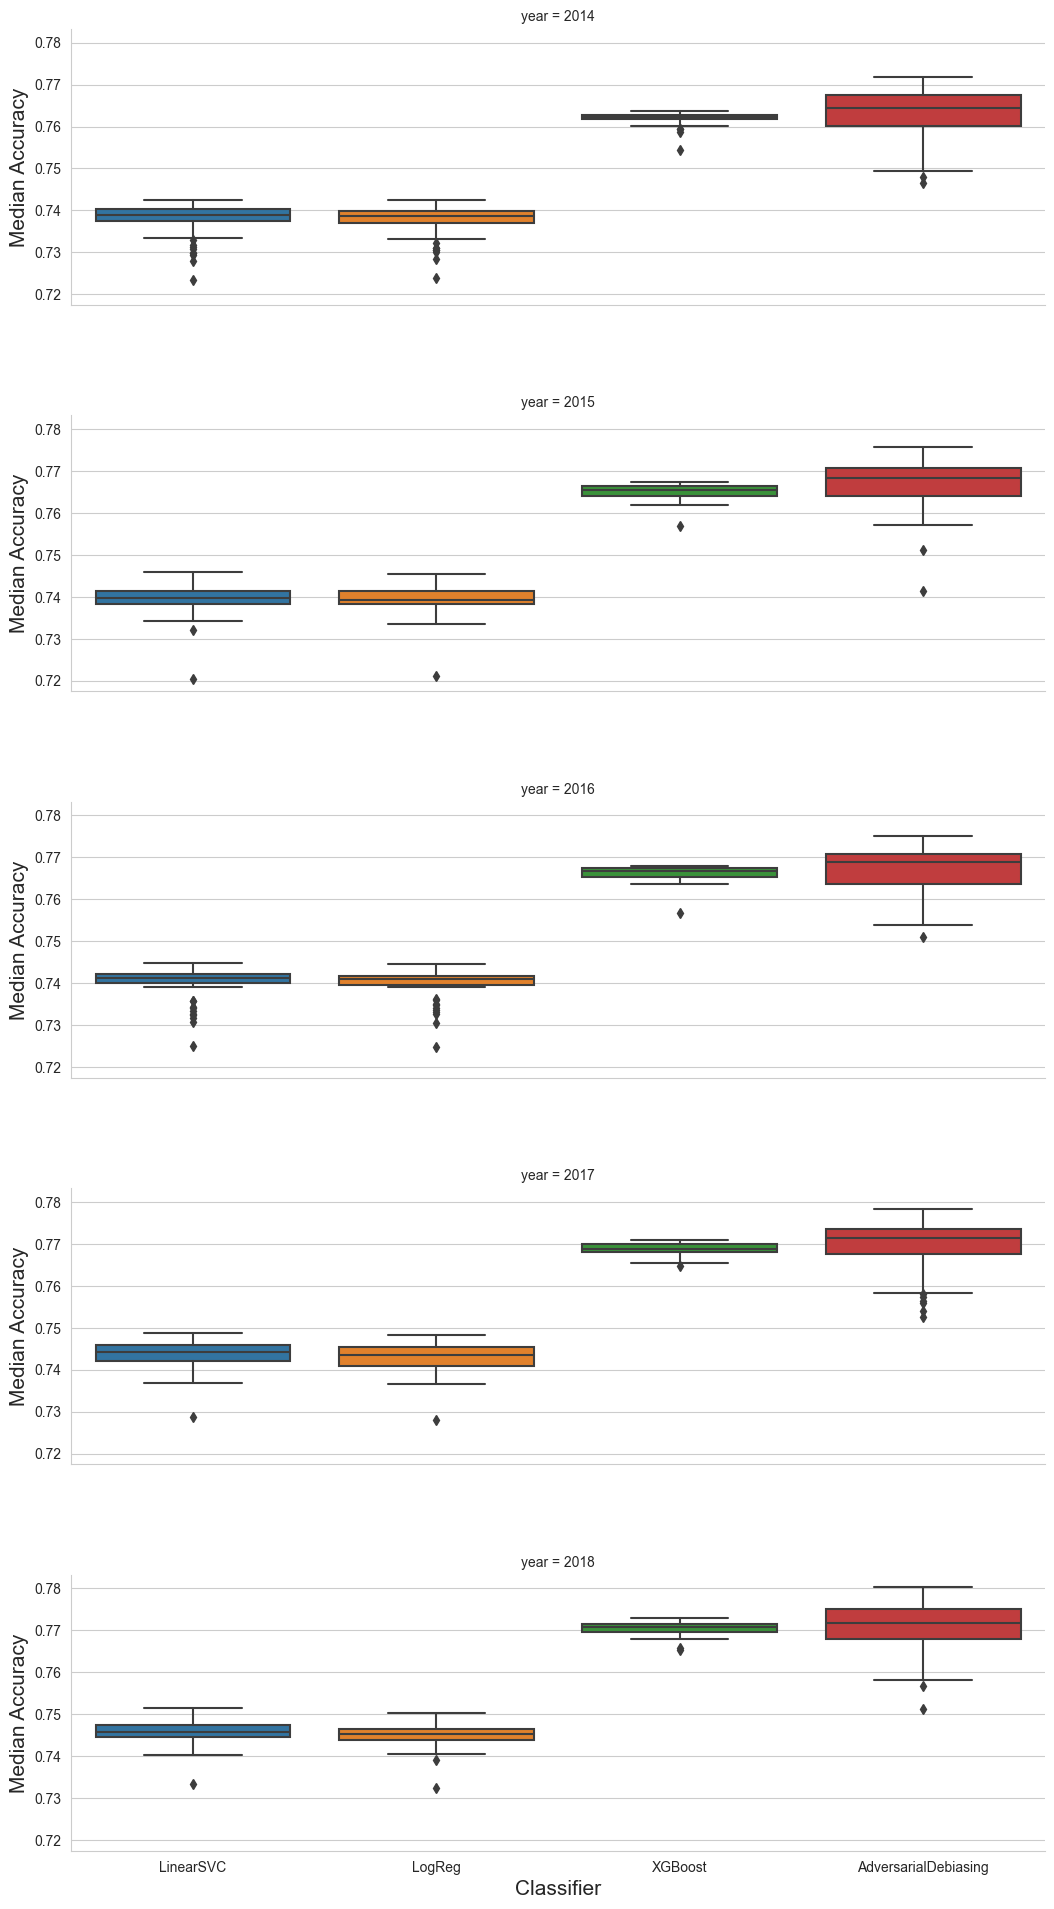

In [24]:
# median accuracy

clfiers = ['LinearSVC','LogReg','XGBoost','AdversarialDebiasing']

g = sns.catplot(data=spatial_results_sampled, x="classifier", y="median_accuracy", kind="box", order=clfiers,
                row='year',
                height=4, aspect=2.65)

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
#leg = g._legend
#leg._loc=8
#leg.set_bbox_to_anchor([0.7, 0.05])
#plt.setp(leg.get_texts(), fontsize=15)
#plt.setp(leg.get_title(), fontsize=15)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(acc_temporal["classifier"]):
        group = acc_temporal.loc[(acc_temporal["train_year"] == y) & (acc_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_accuracy"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_accuracy"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median Accuracy',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'median_accuracy_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_accuracy_sampling.png'),format='png',dpi=300)

2018 -> AdversarialDebiasing 0.0466410045972891 NH
2018 -> AdversarialDebiasing 0.0462668622157833 ID
2018 -> AdversarialDebiasing 0.0548140223960845 WV
2018 -> AdversarialDebiasing 0.042997869071131 DE


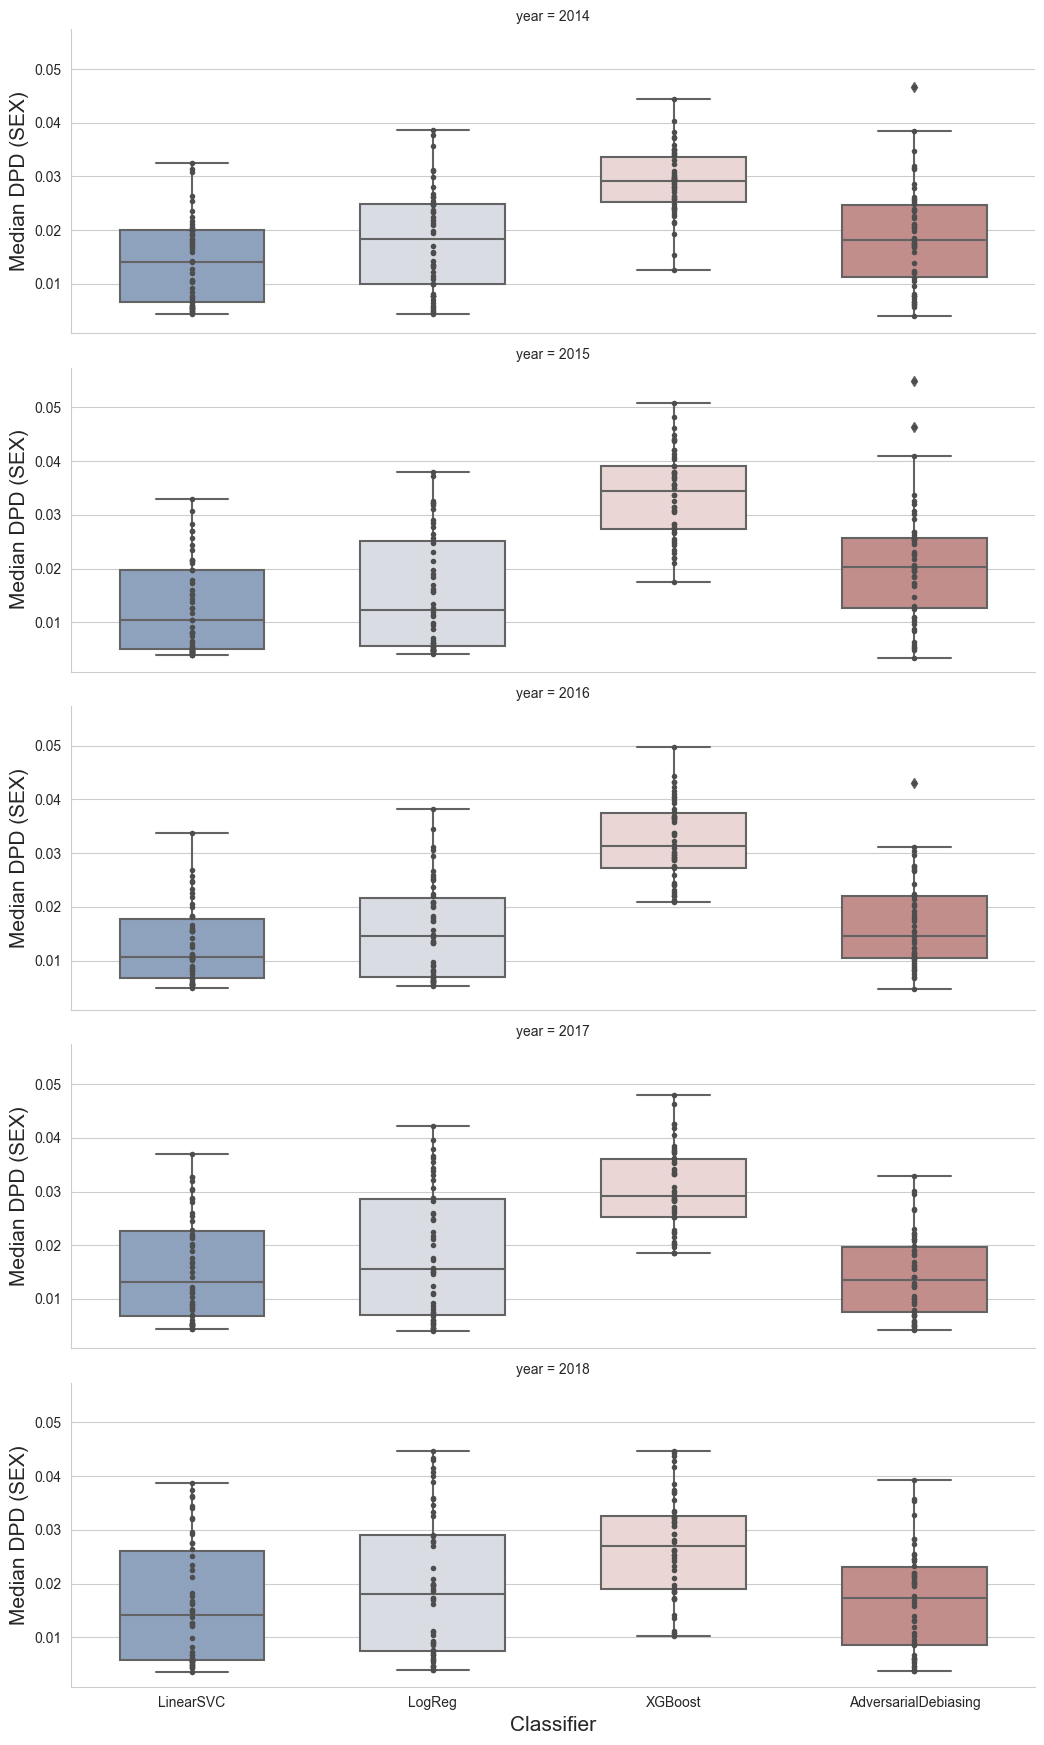

In [26]:
# median DPD SEX
from matplotlib.cbook import boxplot_stats
clfiers_coord={"LogReg":0,'LinearSVC':1,'XGBoost':2,'AdversarialDebiasing':3}

g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_dpd", width=.6, order=clfiers, palette="vlag")
g.map(sns.stripplot,"classifier", "median_sex_dpd", size=4, order=clfiers, color=".3",jitter=False, linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["state"]):
                if m in fliers:
                    print(y, '->', c,m,s)
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))

#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median DPD (SEX)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_dpd_sampling.png'),format='png',dpi=300)

2018 -> AdversarialDebiasing 0.1205426579160973 KY
2018 -> AdversarialDebiasing 0.1257961685015604 NV
2018 -> AdversarialDebiasing 0.1172342177283999 OR
2018 -> AdversarialDebiasing 0.1114783372349035 AR
2018 -> AdversarialDebiasing 0.1059806773550133 KS
2018 -> AdversarialDebiasing 0.1625799193172941 UT
2018 -> LinearSVC 0.1370614446134532 UT
2018 -> AdversarialDebiasing 0.1411186045789925 KS


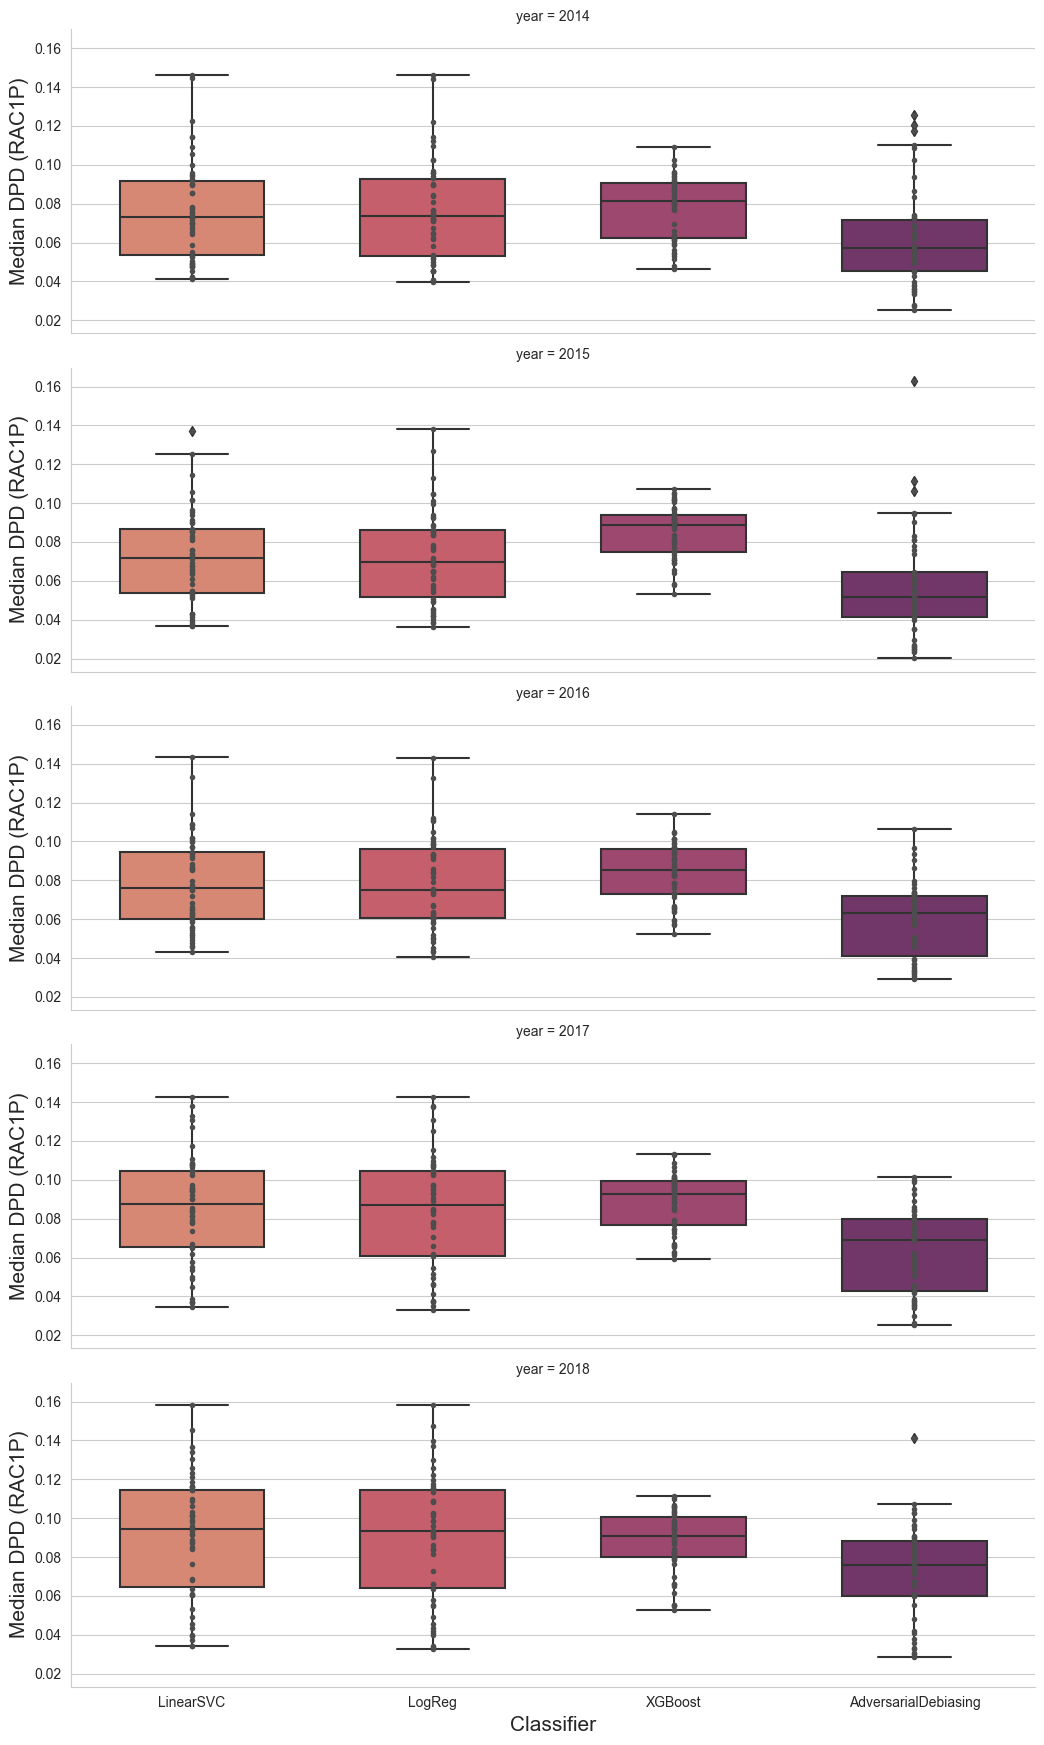

In [28]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_dpd", width=.6, order=clfiers, palette="flare")
g.map(sns.stripplot,"classifier", "median_rac_dpd", size=4, order=clfiers, color=".3",jitter=False, linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["state"]):
                if m in fliers:
                    print(y,'->',c,m,s)
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))
#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median DPD (RAC1P)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_dpd_sampling.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



2018 -> XGBoost 0.0635616589455106 MT
2018 -> XGBoost 0.1042225282025267 WV
2018 -> AdversarialDebiasing 0.1077842160745723 ID
2018 -> AdversarialDebiasing 0.1161792534328851 WV
2018 -> AdversarialDebiasing 0.0957454980742084 DE
2018 -> LinearSVC 0.0788610794662618 CO
2018 -> LogReg 0.0846199906019771 CO


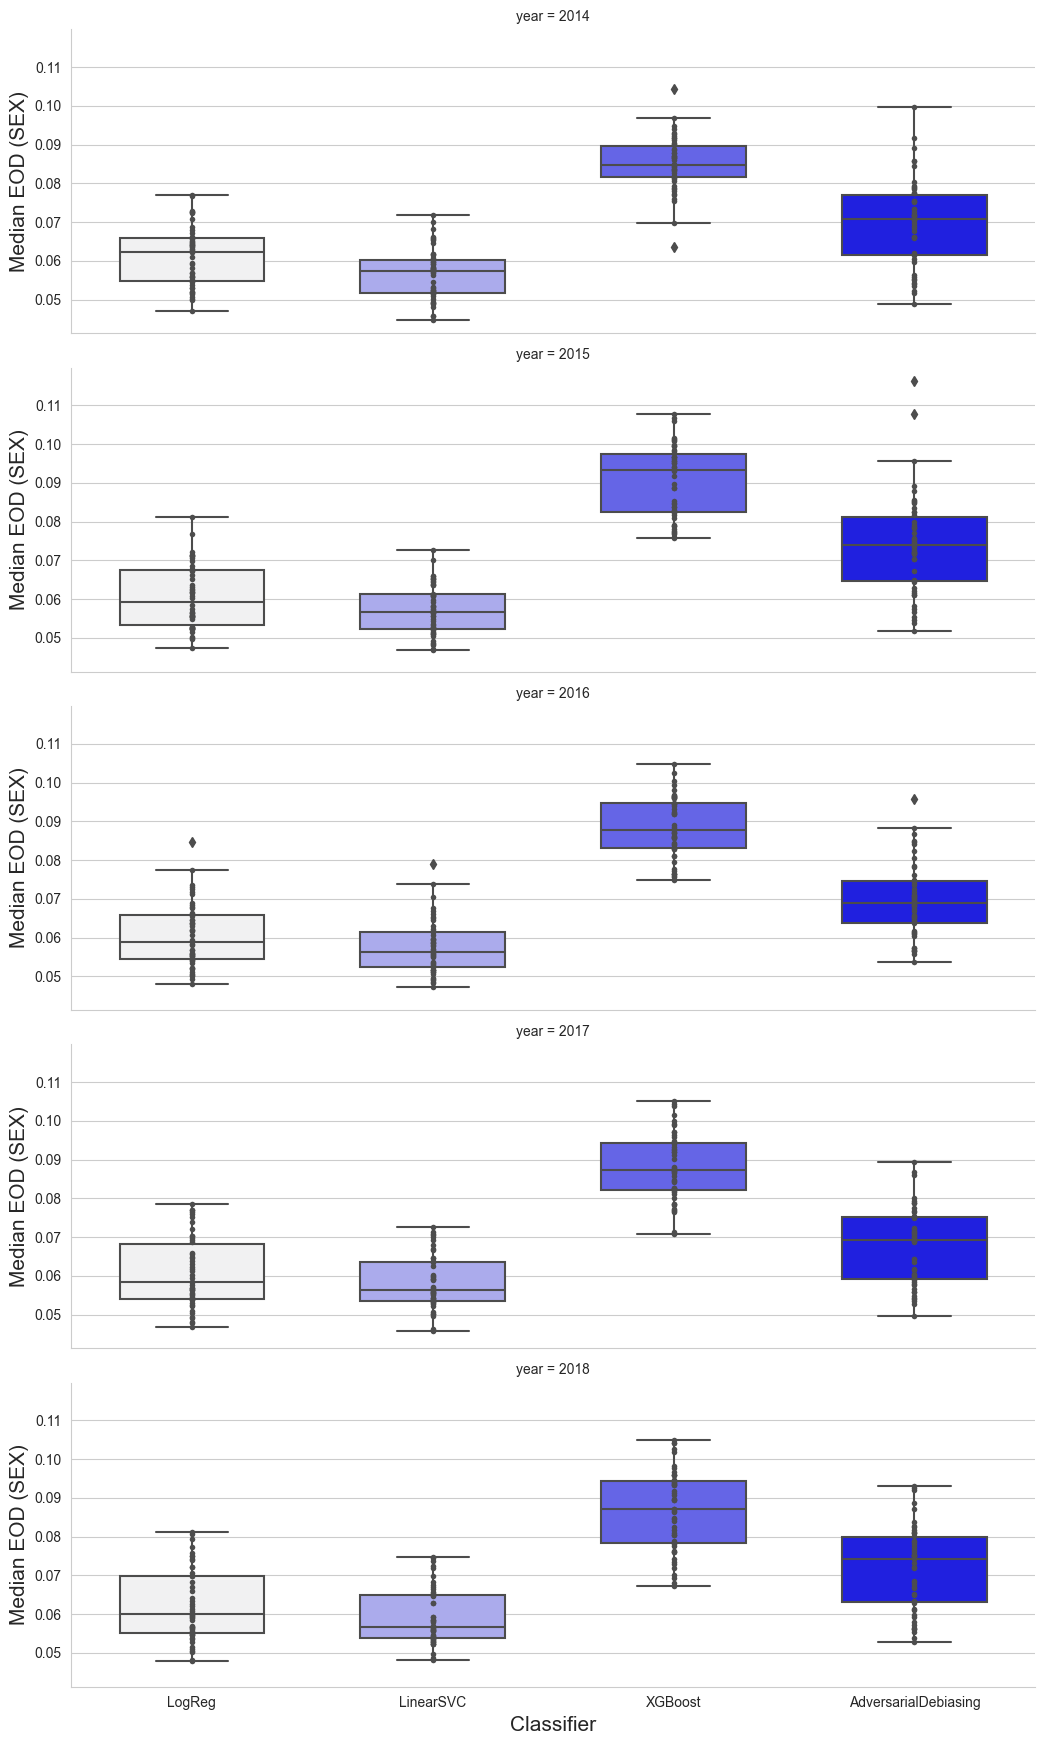

In [29]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_eod", width=.6, palette="light:b")
g.map(sns.stripplot,"classifier", "median_sex_eod", size=4, color=".3",jitter=False, linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["state"]):
                if m in fliers:
                    print(y,'->',c,m,s)
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))
#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median EOD (SEX)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_eod_sampling.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



2018 -> AdversarialDebiasing 0.1553341148886283 OR
2018 -> LinearSVC 0.1787950565128253 UT
2018 -> LogReg 0.1760614486391369 UT
2018 -> AdversarialDebiasing 0.1814285711224919 UT
2018 -> LogReg 0.1691999116180425 UT
2018 -> LinearSVC 0.1866979906260896 UT
2018 -> LogReg 0.1851363009873415 UT


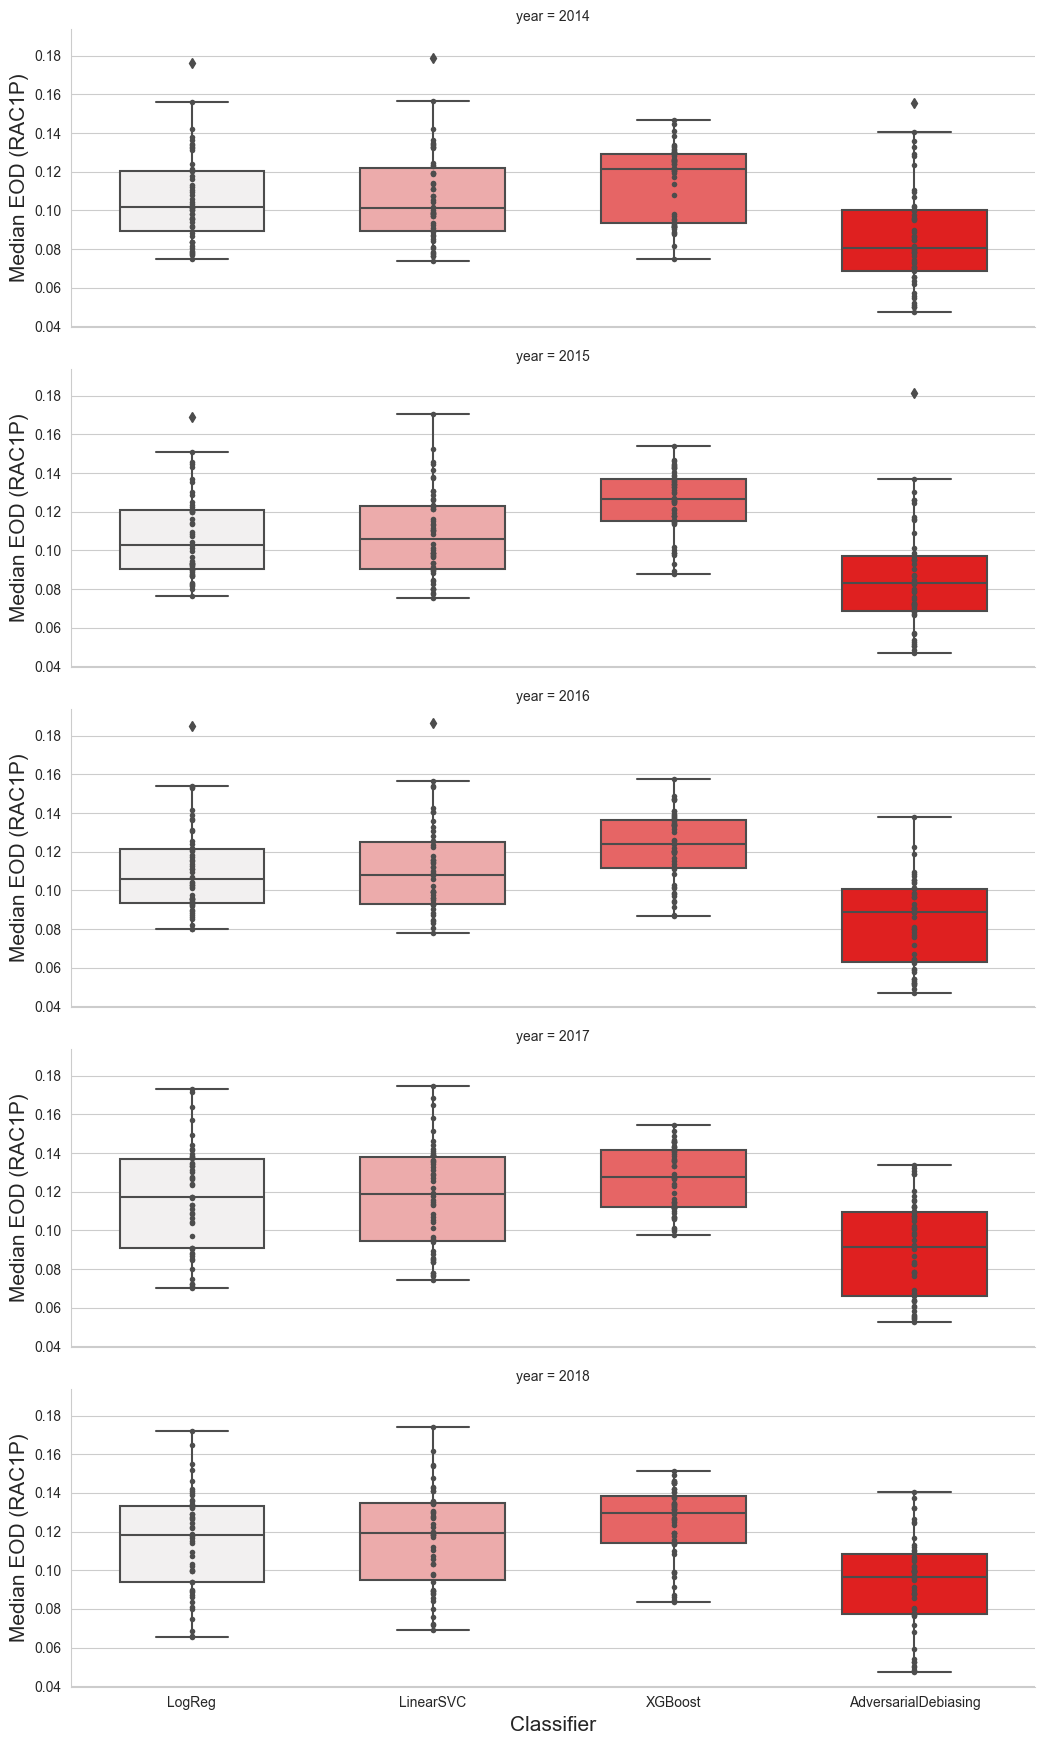

In [30]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_eod", width=.6, palette="light:r")
g.map(sns.stripplot,"classifier", "median_rac_eod", size=4, color=".3", jitter=False, linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["state"]):
                if m in fliers:
                    print(y,'->',c,m,s)
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))
#for axes in g.axes.flat:
#    _ = axes.set_xticklabels(clfiers, rotation=45)
g.set_ylabels(label='Median EOD (RAC1P)',fontsize=15)
g.set_xlabels(label='Classifier',fontsize=15)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_eod_sampling.png'),format='png',dpi=300)

## temporal 2014 results (sampling)

In [29]:
temporal_2014_results_sampled = pd.read_csv(os.path.join(results_dir,'results_temporal2014_sampling.csv'),sep=',',
                                            header=0)
temporal_2014_results_sampled

classifier  year  train_kfold_accuracy  accuracy  \
0                         LinearSVC  2015              0.745300  0.751103   
1                         LinearSVC  2016              0.745300  0.749391   
2                         LinearSVC  2017              0.745300  0.753069   
3                         LinearSVC  2018              0.745300  0.752520   
4                            LogReg  2015              0.745368  0.750709   
..                              ...   ...                   ...       ...   
995            AdversarialDebiasing  2018              0.736745  0.733835   
996  ExponentiatedGradientReduction  2015              0.713055  0.689297   
997  ExponentiatedGradientReduction  2016              0.713055  0.698254   
998  ExponentiatedGradientReduction  2017              0.713055  0.692034   
999  ExponentiatedGradientReduction  2018              0.713055  0.692136   

     bal_accuracy  precision    recall  tpr_fairlearn  fpr_fairlearn  \
0        0.749882   0.728010  0.816129       0.816129       0.316366   
1        0.747833   0.728653  0.813301       0.813301       0.317635   
2        0.750396   0.733581  0.822508       0.822508       0.321716   
3        0.749289   0.737491  0.818452       0.818452       0.319874   
4        0.749662   0.731496  0.806468       0.806468       0.307144   
..            ...        ...       ...            ...            ...   
995      0.733997   0.718220  0.765015       0.765015       0.297021   
996      0.689407   0.670019  0.743476       0.743476       0.364662   
997      0.698007   0.680515  0.752527       0.752527       0.356514   
998      0.692291   0.670511  0.749689       0.749689       0.365106   
999      0.692475   0.668074  0.757295       0.757295       0.372345   

     tnr_fairlearn  fnr_fairlearn       auc   sex_dpd   sex_dpr   sex_eod  \
0         0.683634       0.183871  0.820399  0.031191  0.946823  0.074042   
1         0.682365       0.186699  0.820080  0.023443  0.959804  0.060903   
2         0.678284       0.177492  0.822214  0.022464  0.962097  0.056966   
3         0.680126       0.181548  0.821371  0.032699  0.945245  0.067384   
4         0.692856       0.193532  0.820539  0.037831  0.934822  0.081864   
..             ...            ...       ...       ...       ...       ...   
995       0.702979       0.234985  0.810131  0.047030  0.915022  0.104961   
996       0.635338       0.256524  0.741211  0.007711  0.986168  0.026023   
997       0.643486       0.247473  0.748728  0.026905  0.952700  0.048526   
998       0.634894       0.250311  0.738645  0.012019  0.978632  0.030145   
999       0.627655       0.242705  0.738025  0.002807  0.995033  0.016036   

      rac_dpd   rac_dpr train_state   rac_eod  
0    0.051173  0.915073          AL  0.078750  
1    0.041993  0.929656          AL  0.063685  
2    0.068611  0.890767          AL  0.080854  
3    0.060572  0.902925          AL  0.066437  
4    0.050614  0.914489          AL  0.078291  
..        ...       ...         ...       ...  
995  0.073598  0.872566          WY  0.084939  
996  0.017081  0.969259          WY  0.032553  
997  0.001256  0.997743          WY  0.033972  
998  0.020137  0.964743          WY  0.019386  
999  0.029017  0.950522          WY  0.033213  

[1000 rows x 19 columns]

In [30]:
temporal_2014_results_sampled.groupby(by=['train_state','classifier']).size()

train_state  classifier                    
AK           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
                                              ..
WY           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
Length: 250, dtype: int64

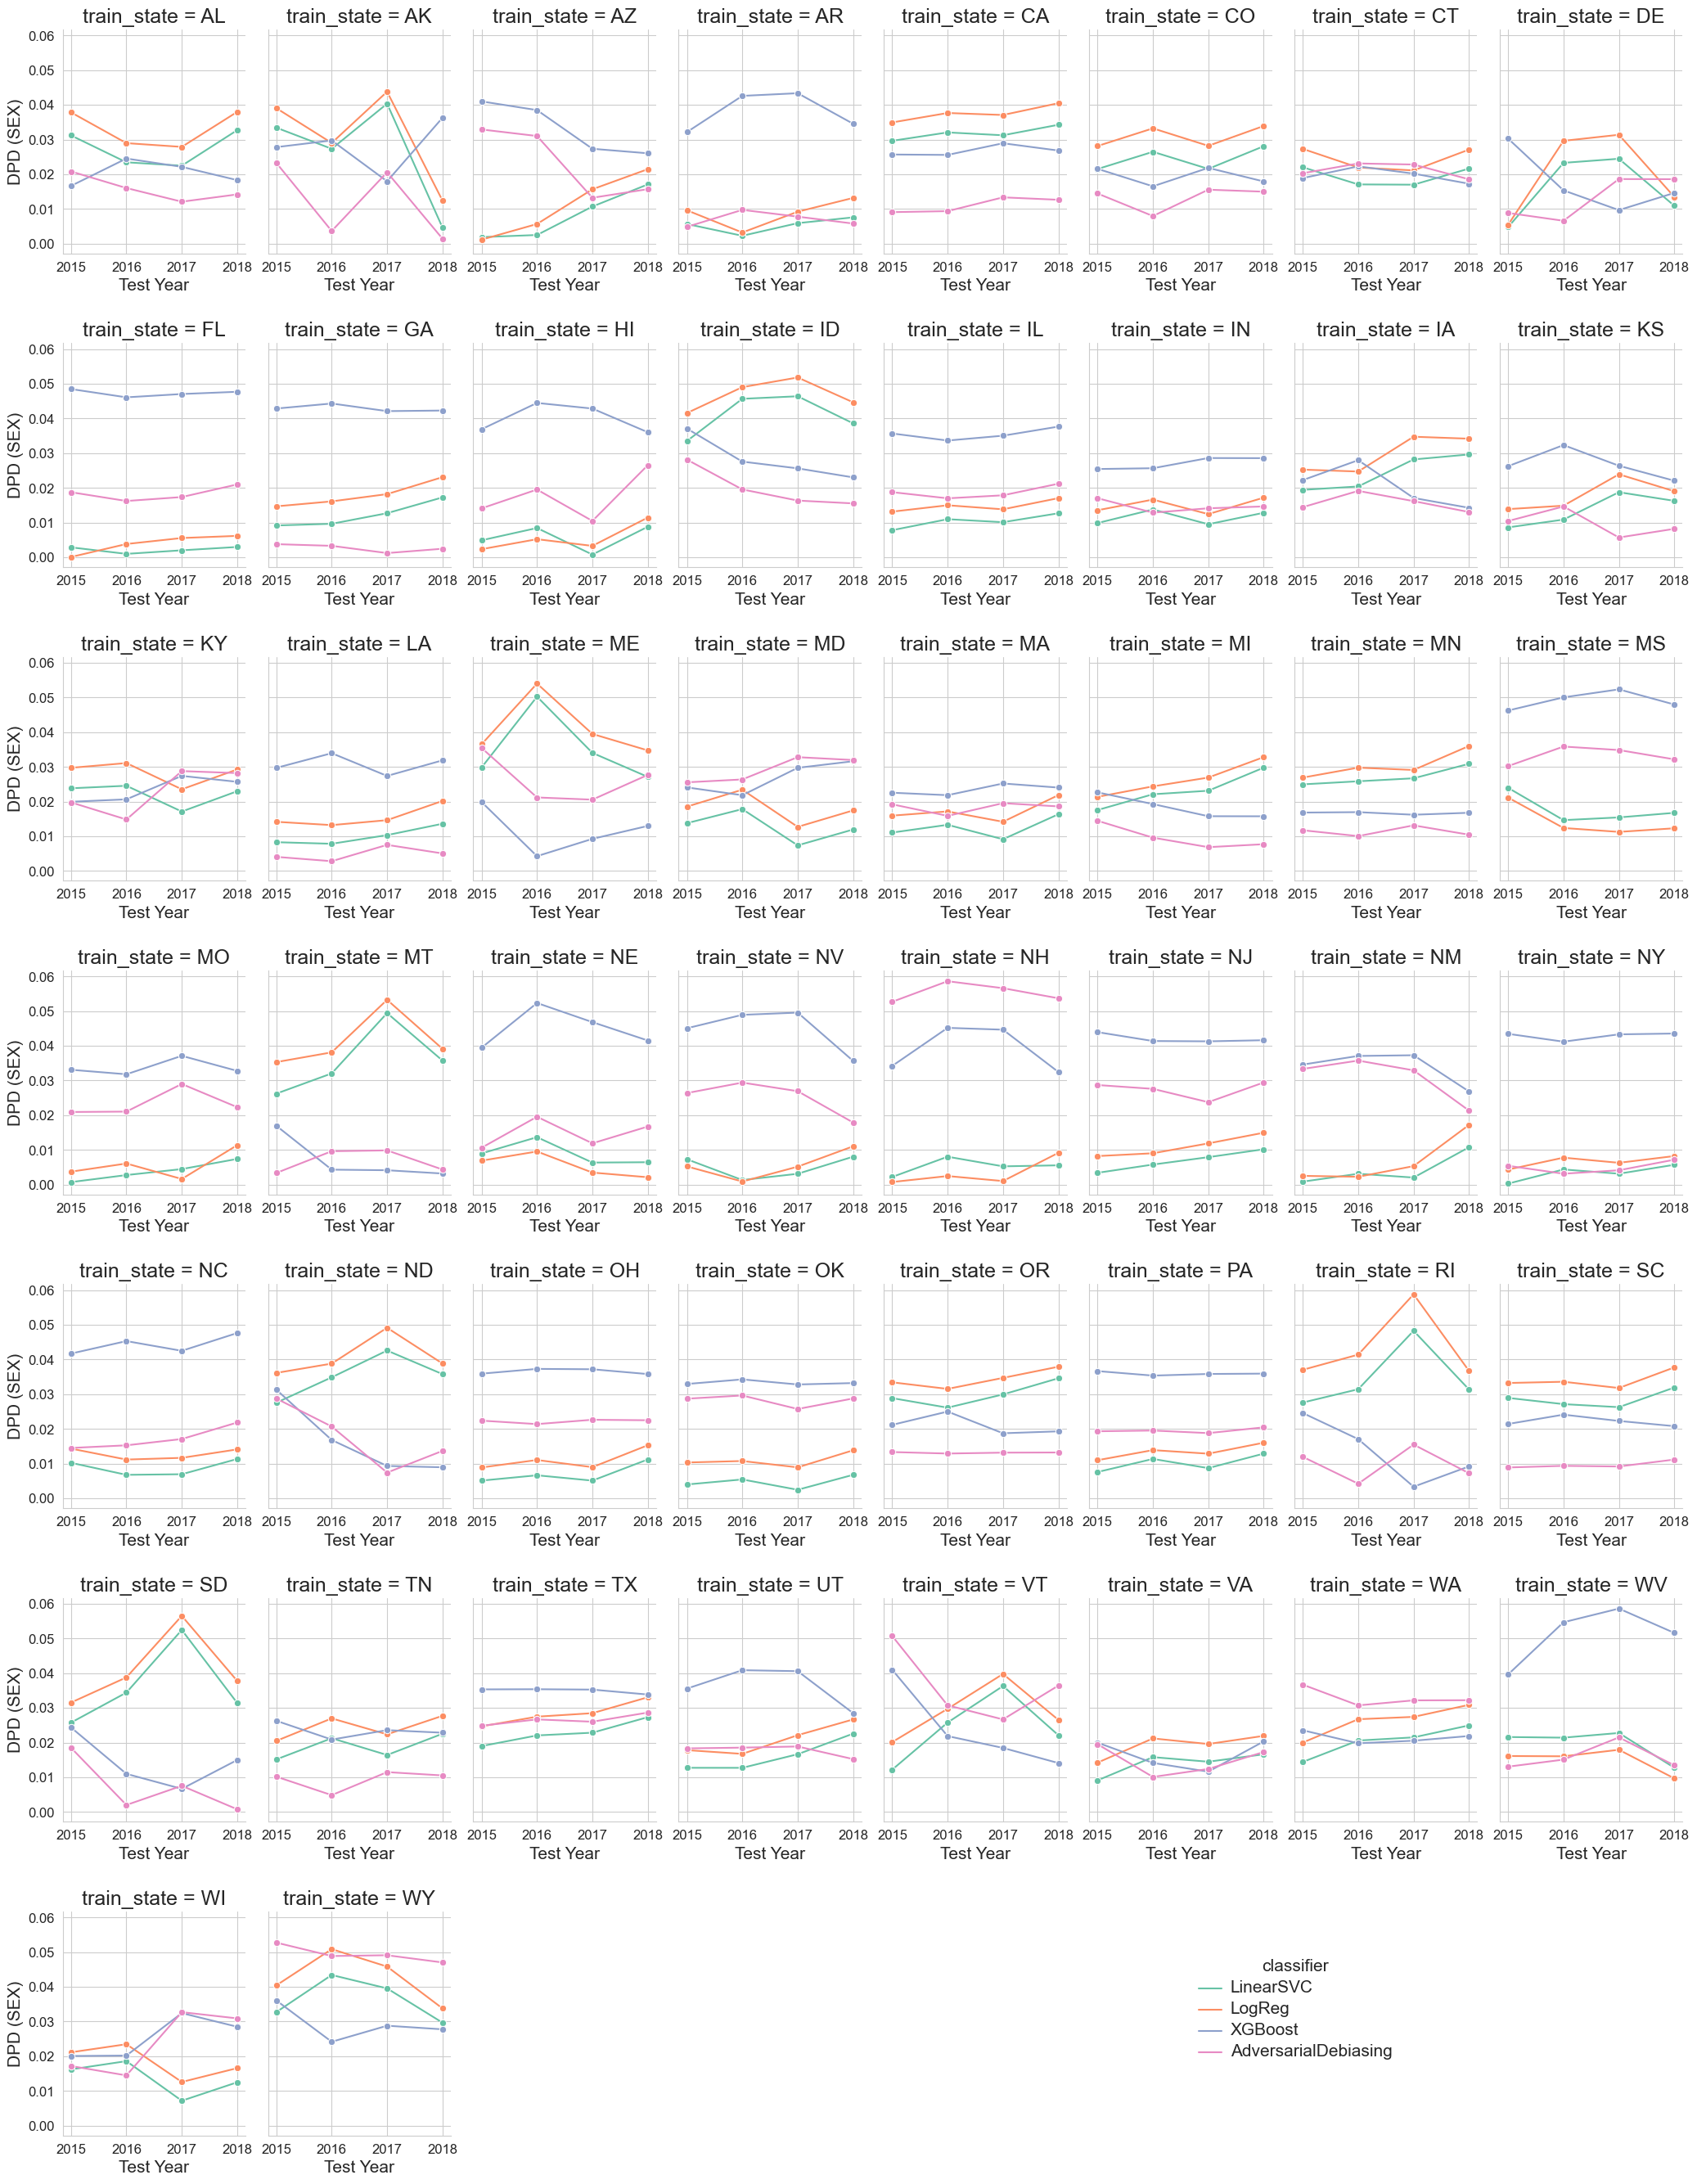

In [31]:
# plot with SEX DPD
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',
                x="year",
                y="sex_dpd",
                marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='Set2',
                height=4, aspect=0.65
           )

for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
    #plt.subplots_adjust(bottom=0.5,hspace=0.5)
    #print(ax.title.get_text()[-2:])

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['dpd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_dpd_sampling.png'),format='png',dpi=300)

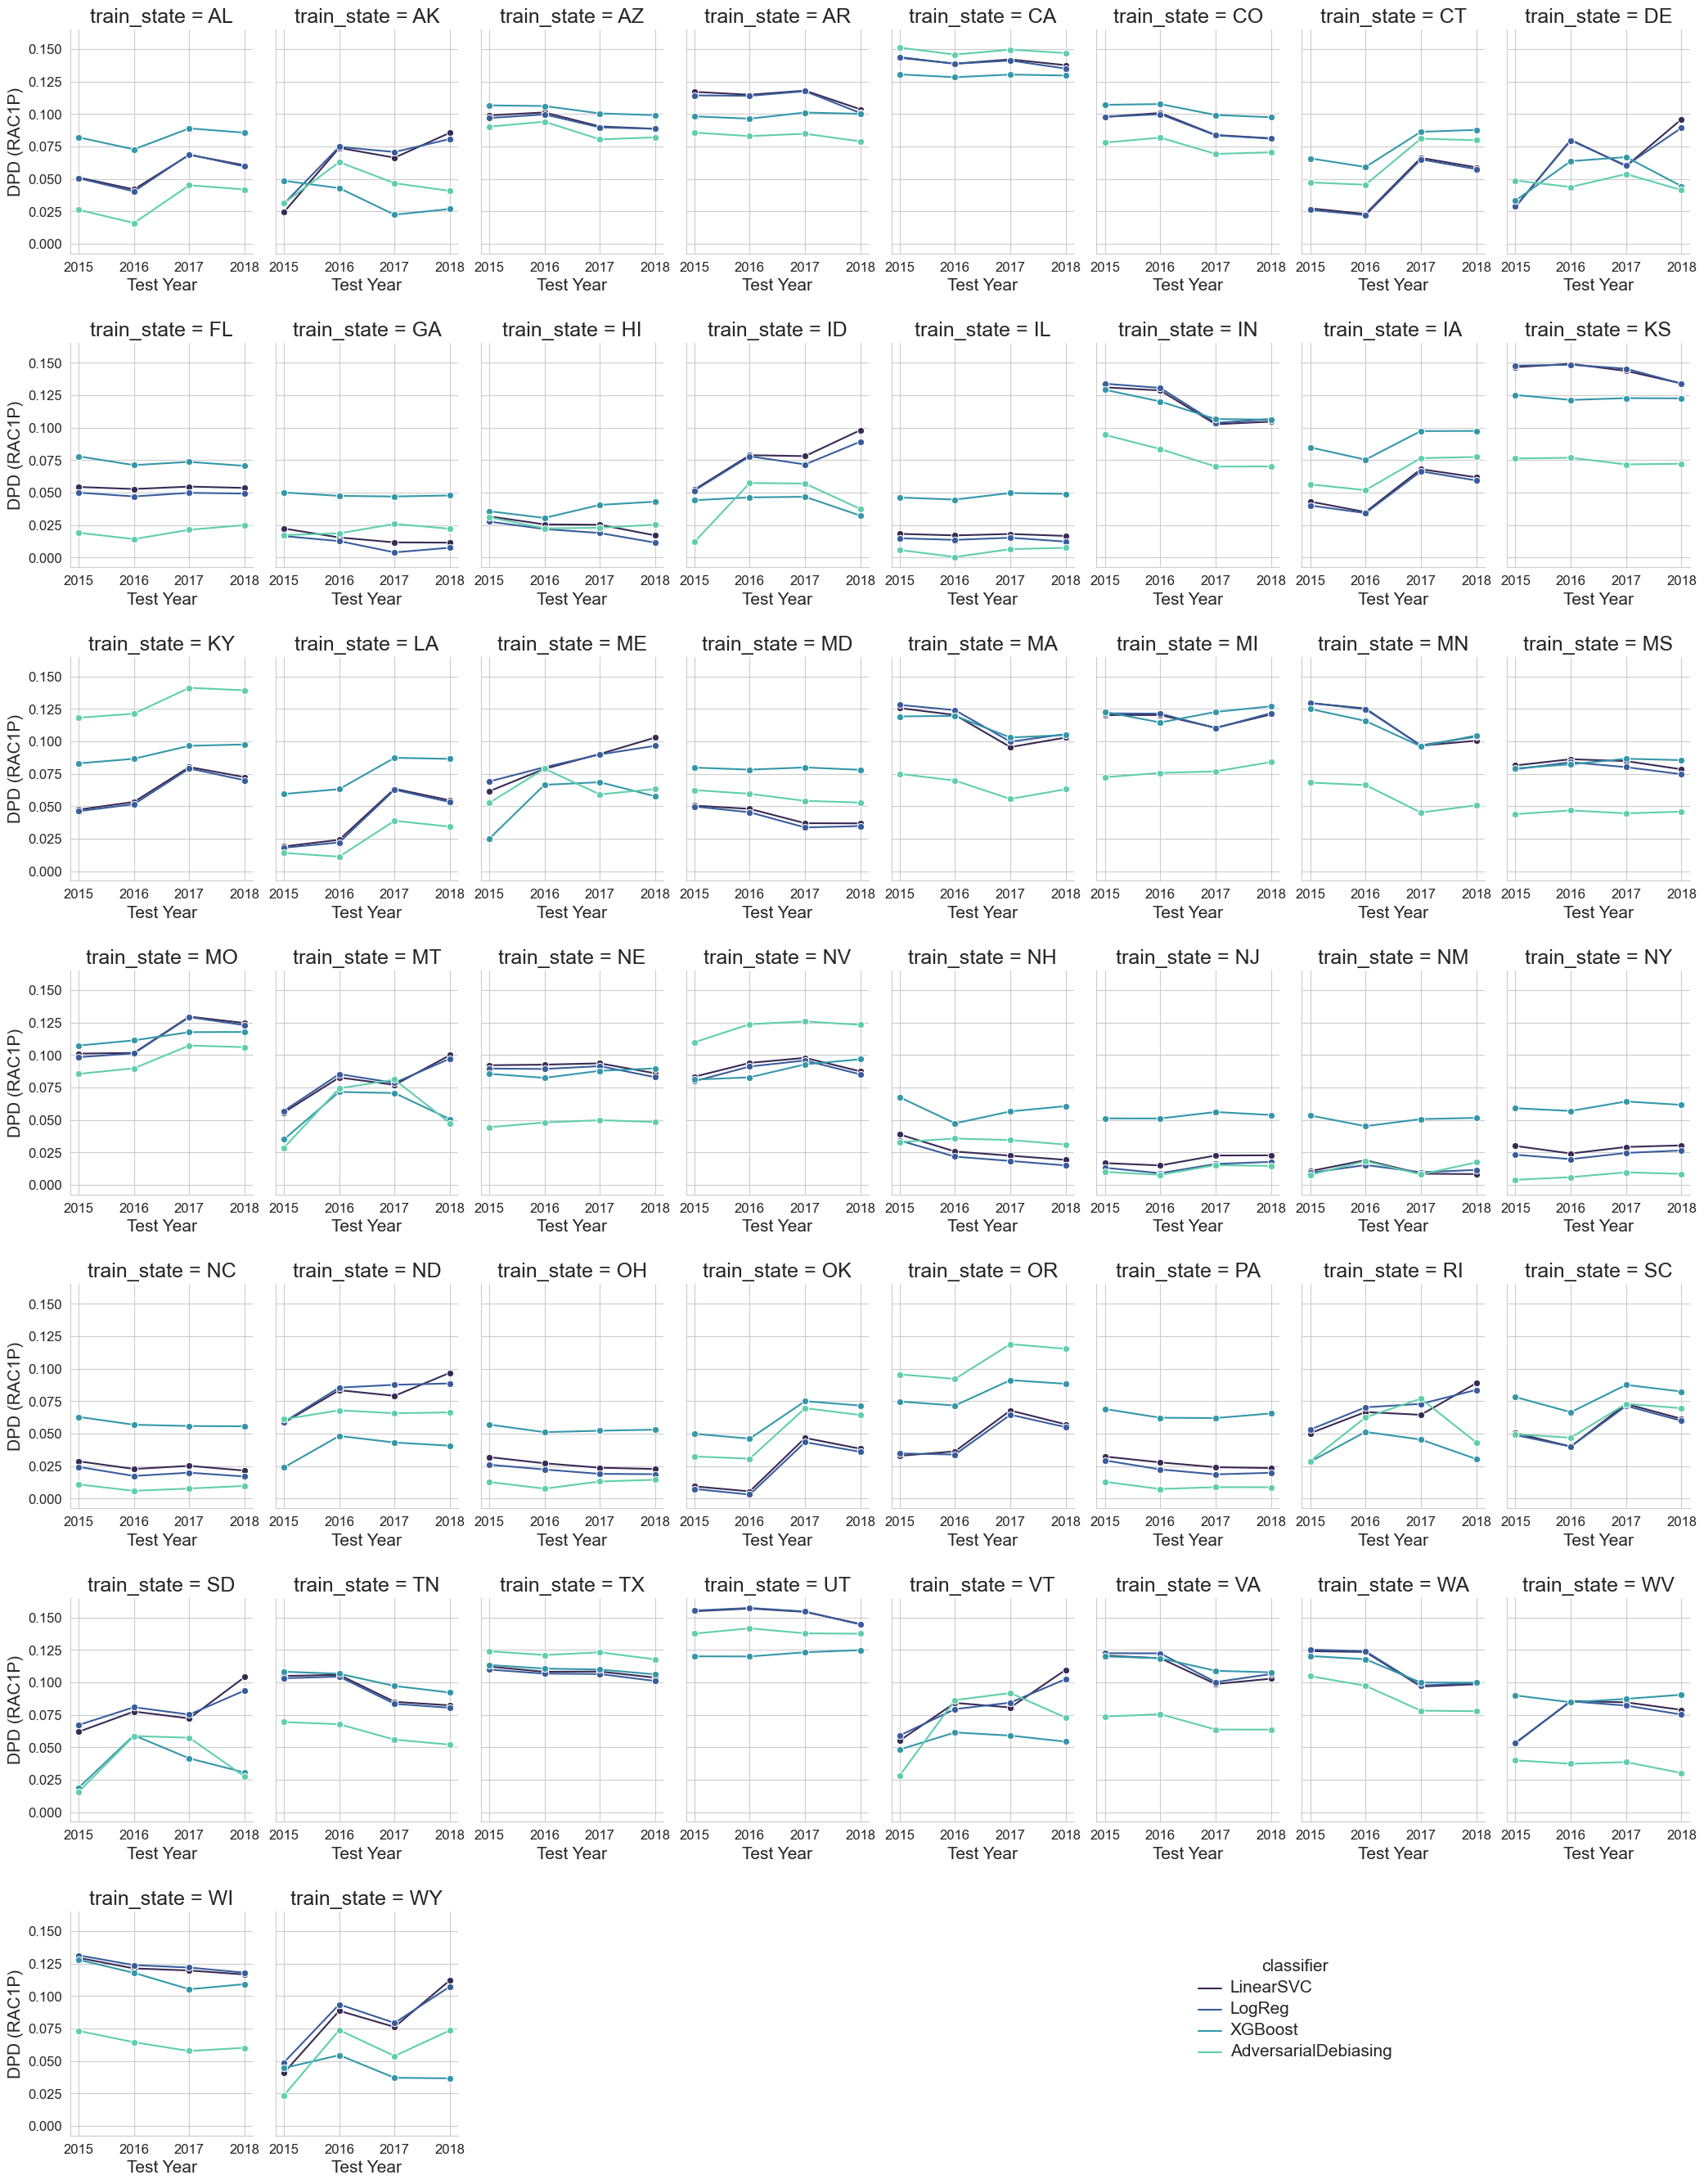

In [32]:
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])],
                kind='line',x="year",y="rac_dpd", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='mako',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
#
#     group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
#     #print(group['spd_sex'].values)
#     ax.scatter([2015,2016,2017,2018],abs(group['dpd_rac'].values),s=15,marker='x',c='red')
plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_dpd_sampling.png'),format='png',dpi=300)

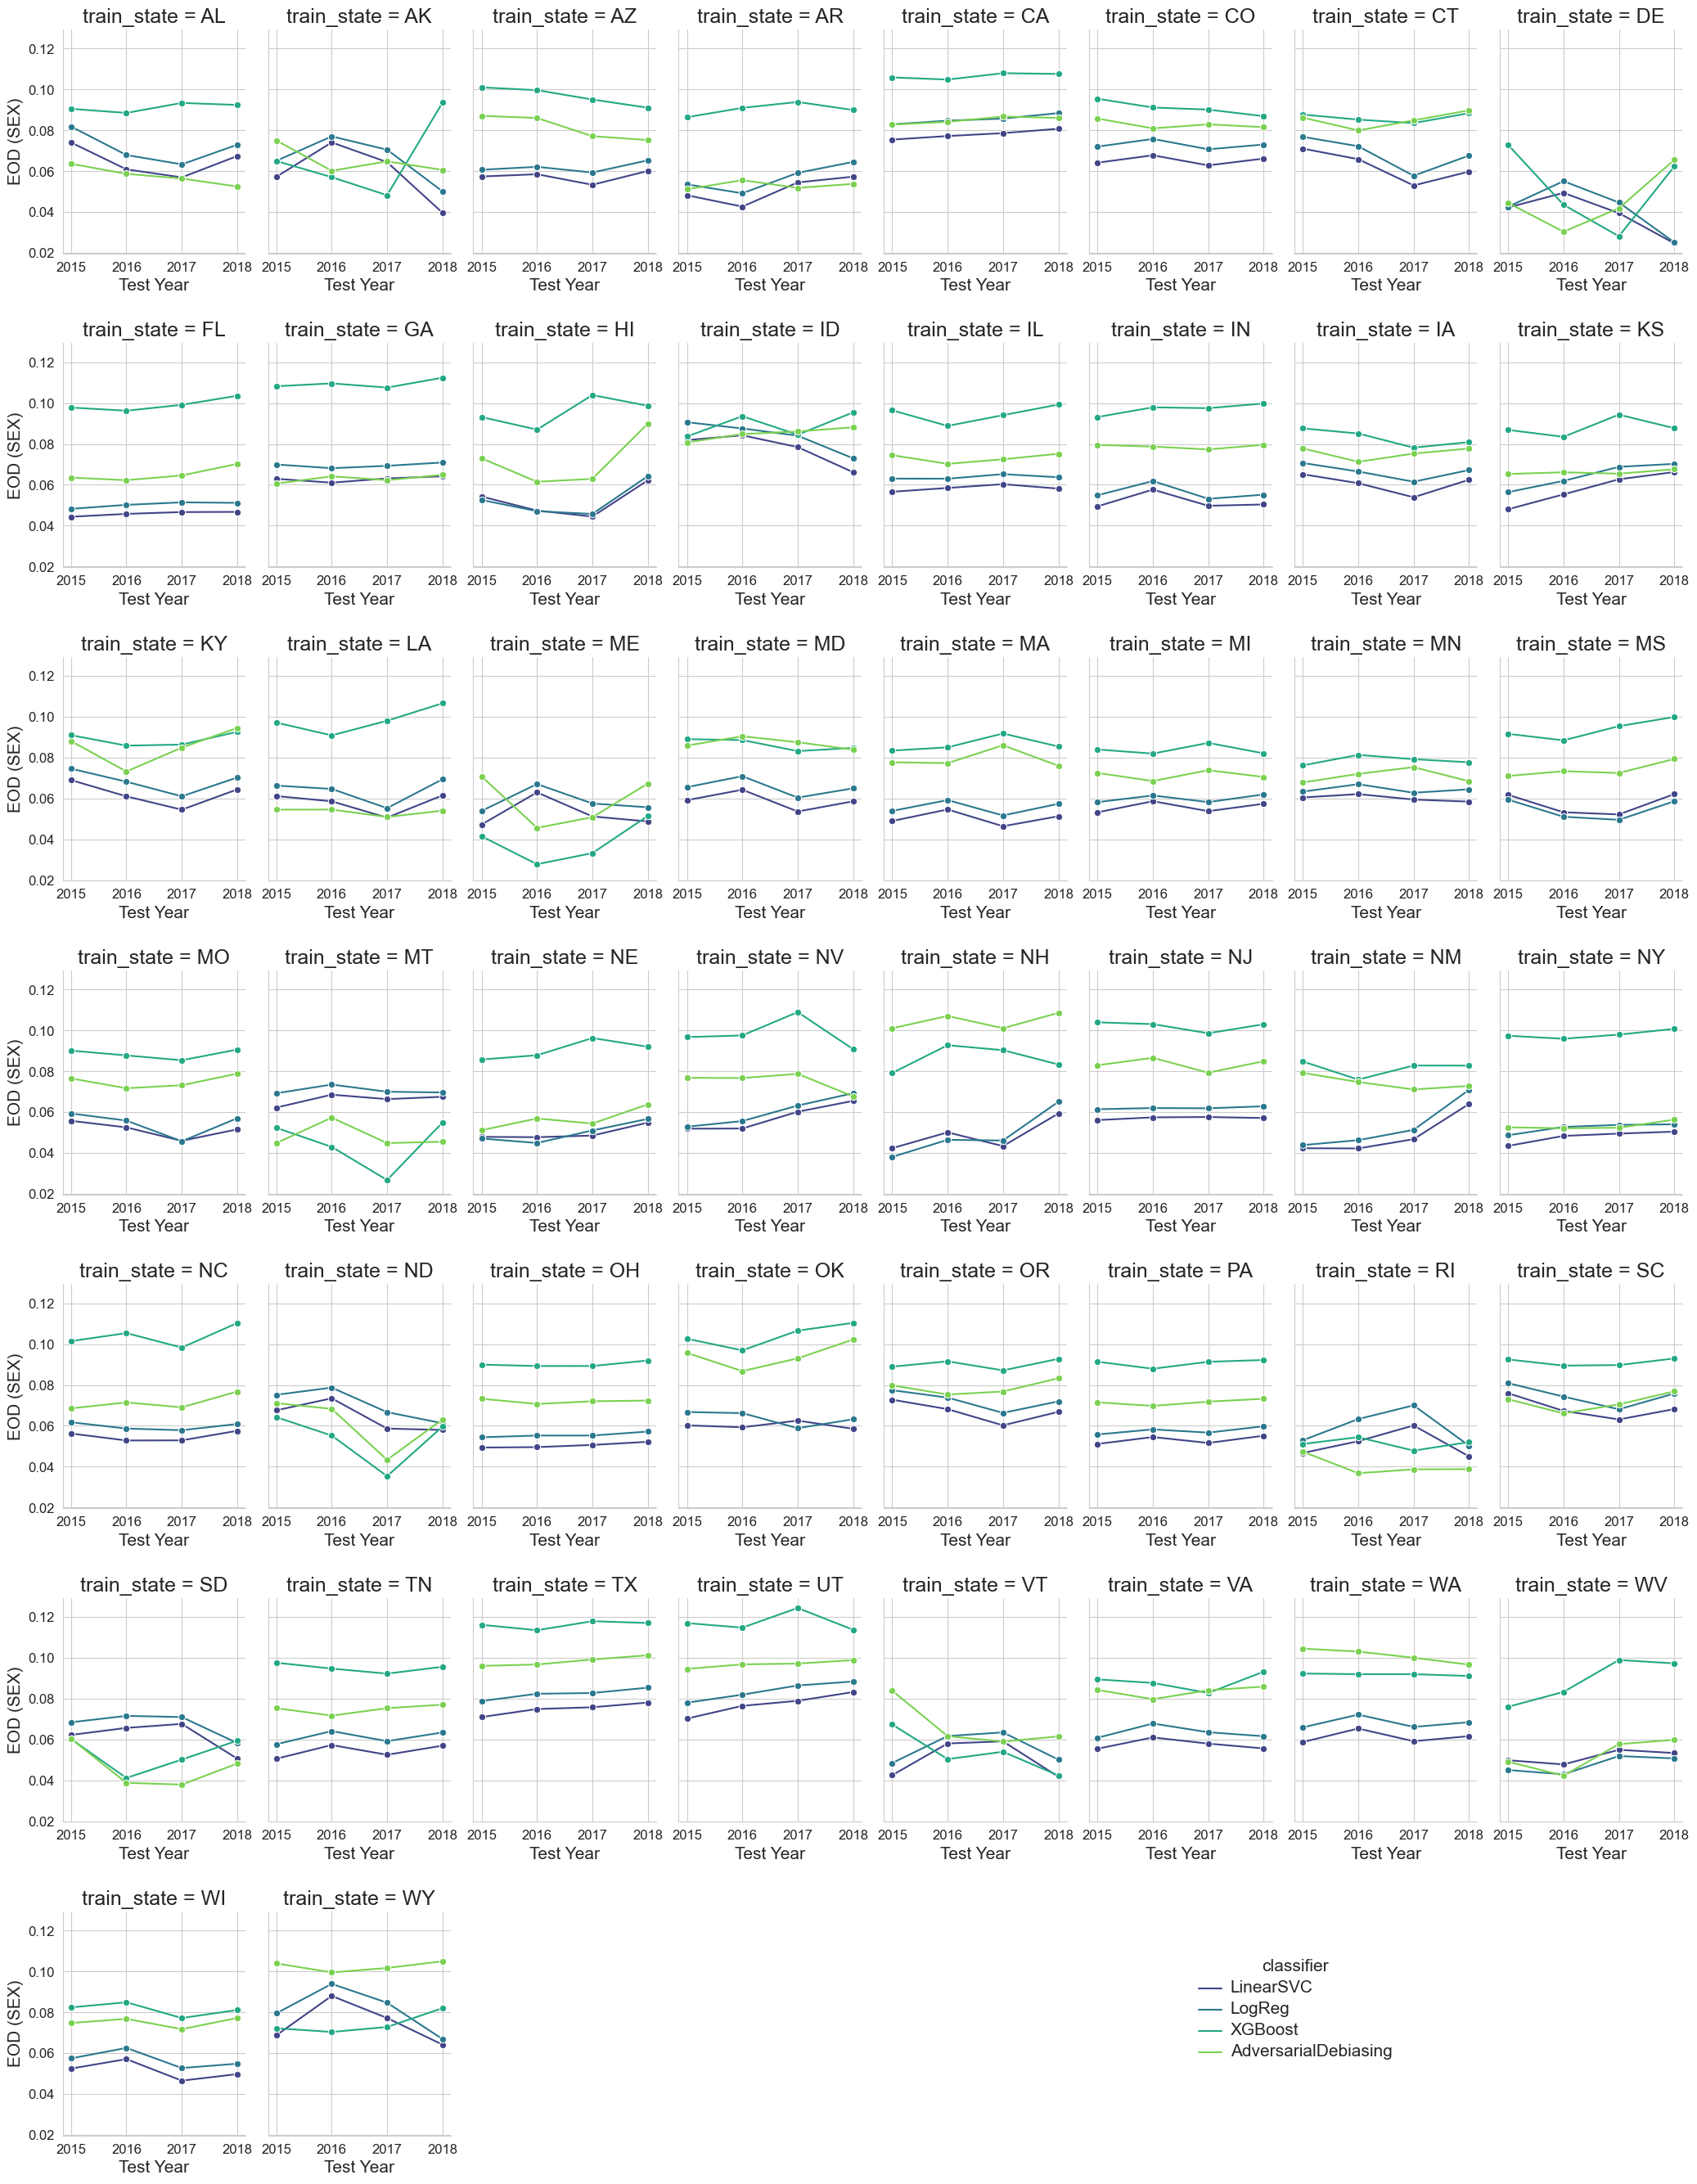

In [33]:
# EOD sex
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="sex_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='viridis',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_eod_sampling.png'),format='png',dpi=300)

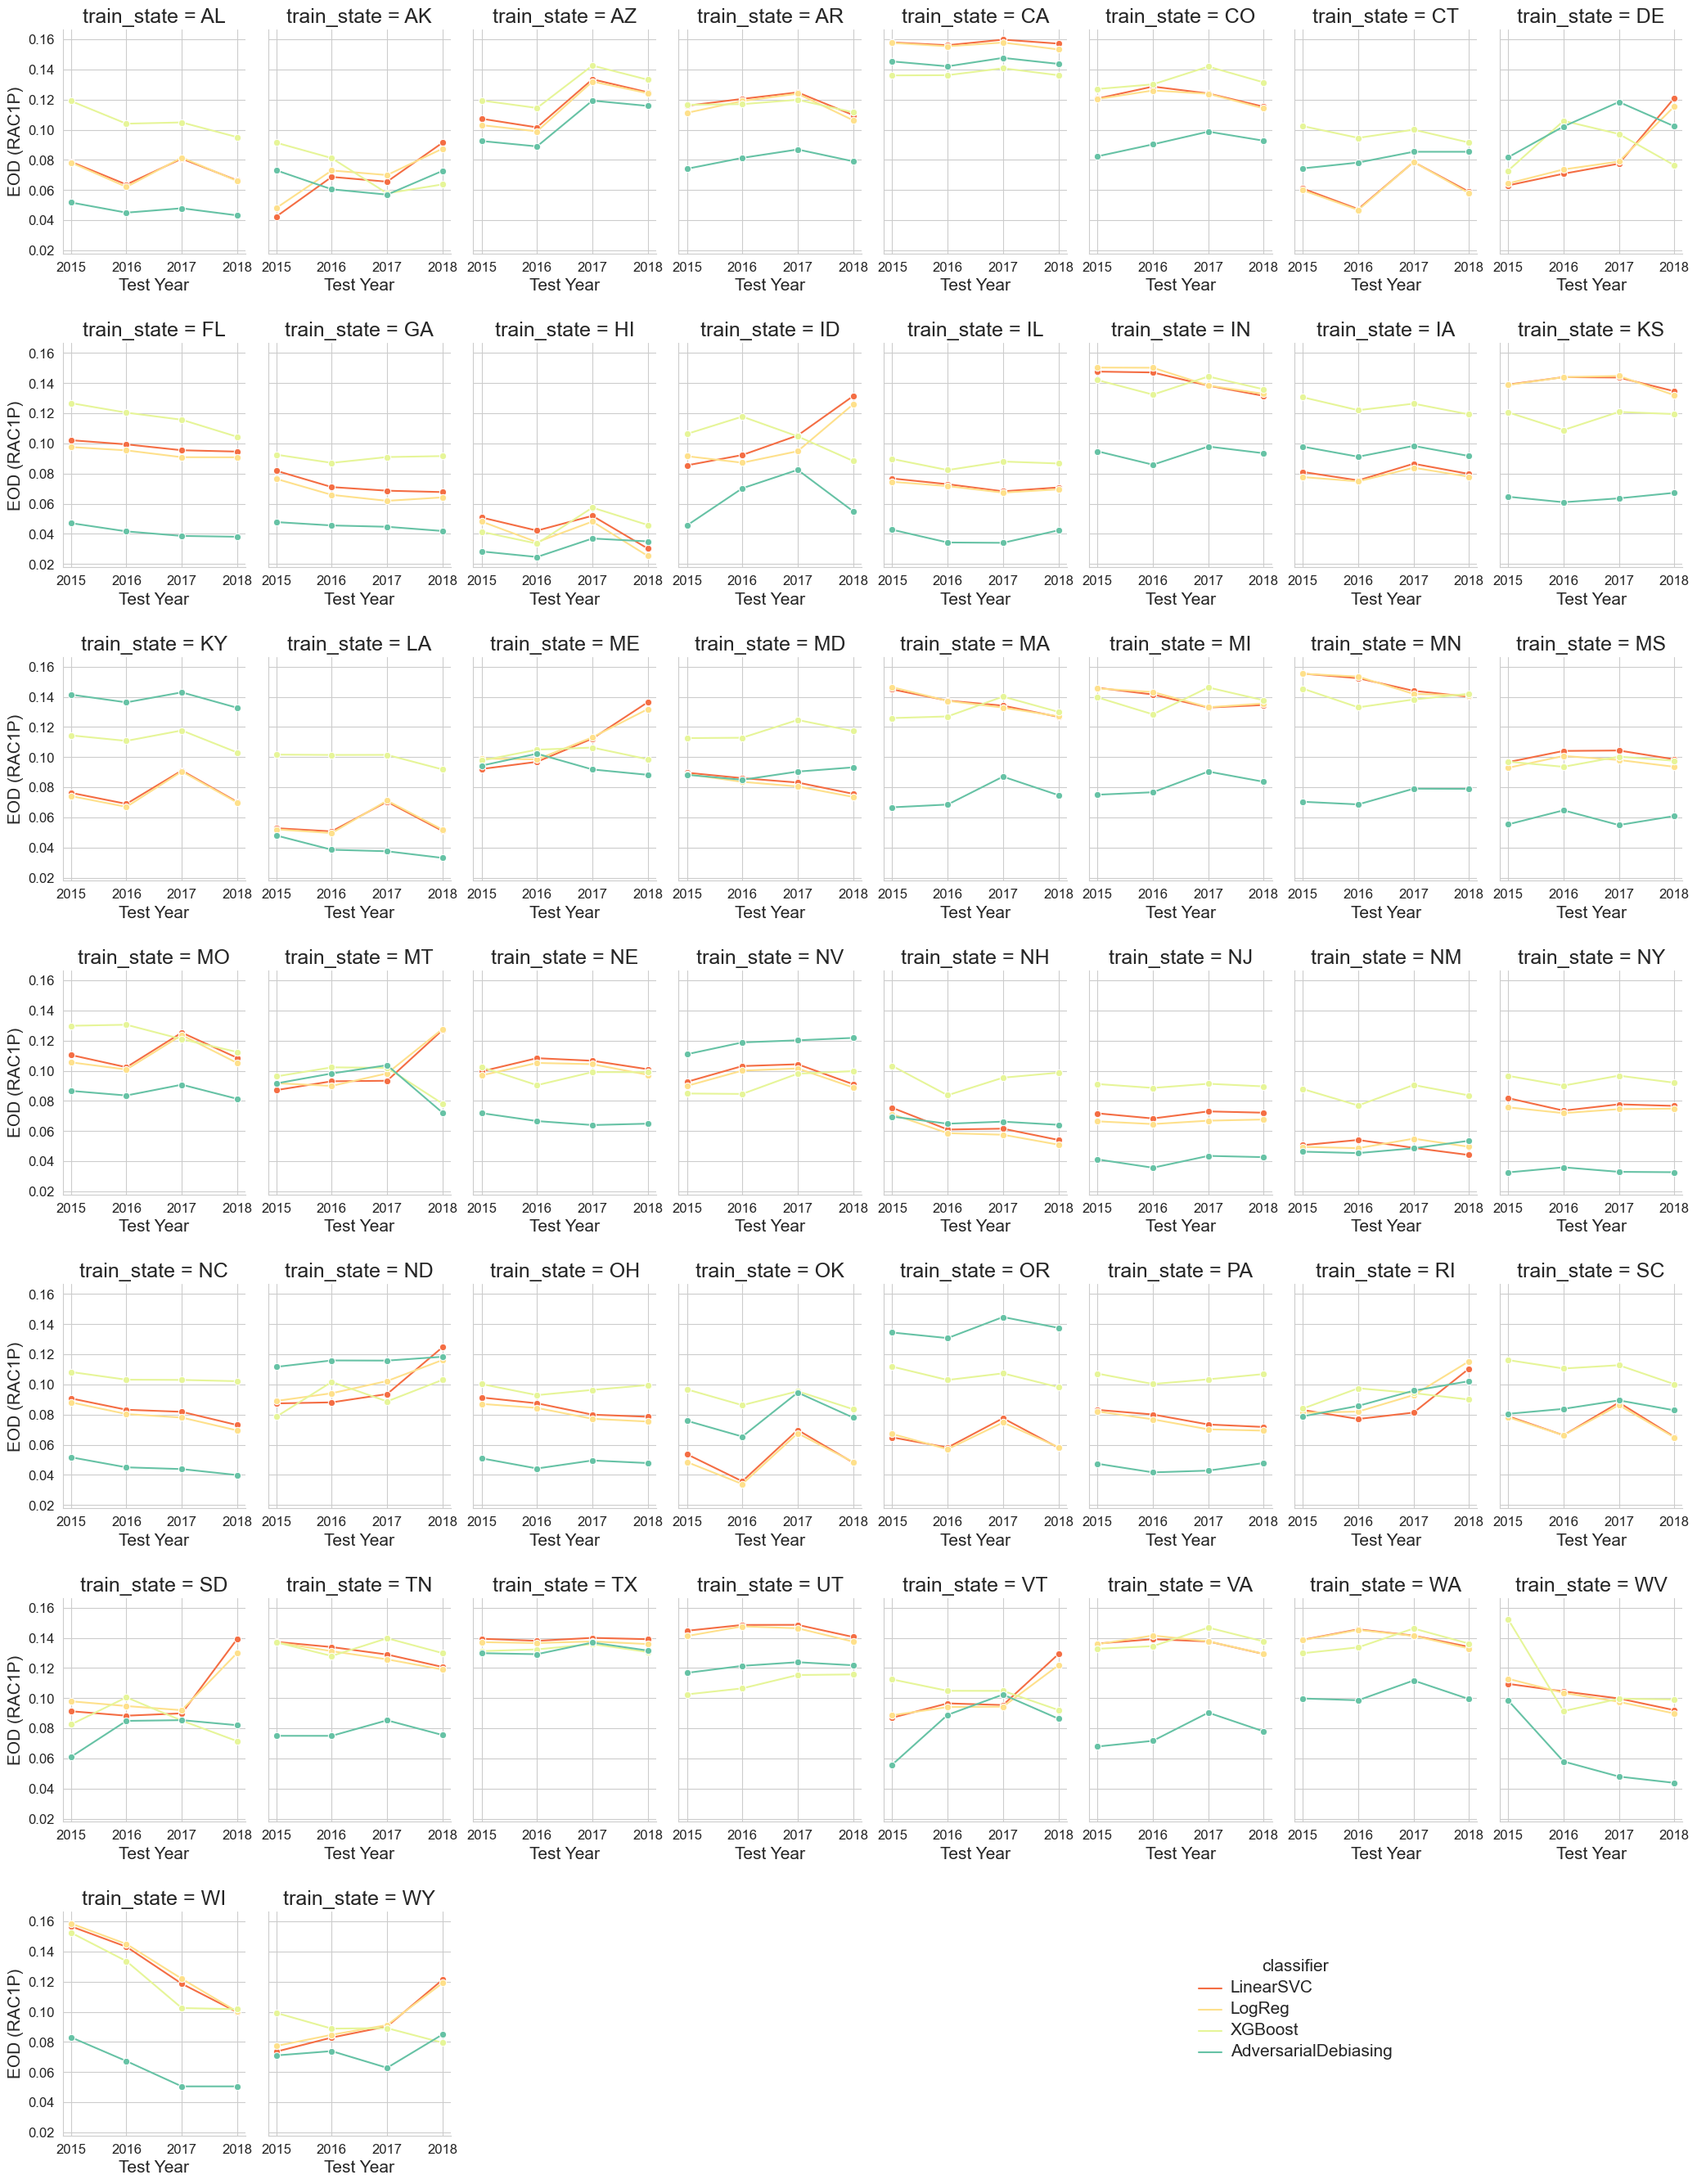

In [34]:
# EOD RAC1P
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="rac_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette="Spectral",
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_eod_sampling.png'),format='png',dpi=300)

## Temporal results overall (sampling)

In [7]:
temporal_results_sampled= pd.read_csv(os.path.join(results_dir,"results_temporal_sampling.csv"),sep=',',header=0)
temporal_results_sampled

classifier  year  train_kfold_accuracy  accuracy  \
0                          LinearSVC  2015              0.745300  0.751103   
1                          LinearSVC  2016              0.745300  0.749391   
2                          LinearSVC  2017              0.745300  0.753069   
3                          LinearSVC  2018              0.745300  0.752520   
4                             LogReg  2015              0.745368  0.750709   
...                              ...   ...                   ...       ...   
4995            AdversarialDebiasing  2017              0.746814  0.743233   
4996  ExponentiatedGradientReduction  2014              0.722317  0.686350   
4997  ExponentiatedGradientReduction  2015              0.722317  0.690934   
4998  ExponentiatedGradientReduction  2016              0.722317  0.699100   
4999  ExponentiatedGradientReduction  2017              0.722317  0.693813   

      bal_accuracy  precision    recall  tpr_fairlearn  fpr_fairlearn  \
0         0.749882   0.728010  0.816129       0.816129       0.316366   
1         0.747833   0.728653  0.813301       0.813301       0.317635   
2         0.750396   0.733581  0.822508       0.822508       0.321716   
3         0.749289   0.737491  0.818452       0.818452       0.319874   
4         0.749662   0.731496  0.806468       0.806468       0.307144   
...            ...        ...       ...            ...            ...   
4995      0.743266   0.738008  0.750622       0.750622       0.264090   
4996      0.686037   0.678309  0.719865       0.719865       0.347792   
4997      0.691006   0.677592  0.726079       0.726079       0.344067   
4998      0.698947   0.688291  0.732772       0.732772       0.334879   
4999      0.693990   0.677869  0.733375       0.733375       0.345396   

      tnr_fairlearn  fnr_fairlearn       auc   sex_dpd   sex_dpr   sex_eod  \
0          0.683634       0.183871  0.820399  0.031191  0.946823  0.074042   
1          0.682365       0.186699  0.820080  0.023443  0.959804  0.060903   
2          0.678284       0.177492  0.822214  0.022464  0.962097  0.056966   
3          0.680126       0.181548  0.821371  0.032699  0.945245  0.067384   
4          0.692856       0.193532  0.820539  0.037831  0.934822  0.081864   
...             ...            ...       ...       ...       ...       ...   
4995       0.735910       0.249378  0.817604  0.004405  0.991337  0.050157   
4996       0.652208       0.280135  0.748782  0.007144  0.986749  0.021533   
4997       0.655933       0.273921  0.757510  0.002111  0.996059  0.021947   
4998       0.665121       0.267228  0.769942  0.006595  0.987743  0.037963   
4999       0.654604       0.266625  0.759336  0.003414  0.993680  0.025564   

       rac_dpd   rac_dpr train_state  train_year   rac_eod  
0     0.051173  0.915073          AL        2014  0.078750  
1     0.041993  0.929656          AL        2014  0.063685  
2     0.068611  0.890767          AL        2014  0.080854  
3     0.060572  0.902925          AL        2014  0.066437  
4     0.050614  0.914489          AL        2014  0.078291  
...        ...       ...         ...         ...       ...  
4995  0.036329  0.931439          WY        2018  0.068699  
4996  0.016114  0.970430          WY        2018  0.037975  
4997  0.004975  0.990737          WY        2018  0.008022  
4998  0.017258  0.968158          WY        2018  0.025777  
4999  0.005052  0.990655          WY        2018  0.031017  

[5000 rows x 20 columns]

In [32]:
temporal_results_sampled[~temporal_results_sampled['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=['train_state',
                                                                                                       'train_year',
                                                                                                       'classifier'])\
    .size()

train_state  train_year  classifier          
AK           2014        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
             2015        AdversarialDebiasing    4
                                                ..
WY           2017        XGBoost                 4
             2018        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
Length: 1000, dtype: int64

In [8]:
acc_temporal_sampled = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])]\
    .groupby\
    (by=["train_year","classifier","train_state"]).agg(median_accuracy=('accuracy','median')).reset_index()
acc_temporal_sampled

train_year            classifier train_state  median_accuracy
0          2014  AdversarialDebiasing          AK         0.737382
1          2014  AdversarialDebiasing          AL         0.775309
2          2014  AdversarialDebiasing          AR         0.768403
3          2014  AdversarialDebiasing          AZ         0.776269
4          2014  AdversarialDebiasing          CA         0.775002
..          ...                   ...         ...              ...
995        2018               XGBoost          VT         0.744615
996        2018               XGBoost          WA         0.772783
997        2018               XGBoost          WI         0.773647
998        2018               XGBoost          WV         0.765043
999        2018               XGBoost          WY         0.743578

[1000 rows x 4 columns]

In [11]:
acc_temporal_sampled[(acc_temporal_sampled['train_state']=='VT') & (acc_temporal_sampled['classifier'].isin
                                                                    (['AdversarialDebiasing']))]['median_accuracy']\
    .mean()

0.7424189586824712

In [34]:
acc_temporal_table_results_sampled = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])]\
    .groupby(by=["train_year","classifier","train_state"]).agg(**{'median_accuracy':('accuracy','mean'),
                                                      'median_sex_dpd':('sex_dpd','mean'),
                                                      'median_rac_dpd':('rac_dpd','mean'),
                                                      'median_sex_eod':('sex_eod','mean'),
                                                      'median_rac_eod':('rac_eod','mean')}).reset_index()

acc_temporal_table_results_sampled

train_year            classifier train_state  median_accuracy  \
0          2014  AdversarialDebiasing          AK         0.737196   
1          2014  AdversarialDebiasing          AL         0.775775   
2          2014  AdversarialDebiasing          AR         0.768244   
3          2014  AdversarialDebiasing          AZ         0.776161   
4          2014  AdversarialDebiasing          CA         0.774841   
..          ...                   ...         ...              ...   
995        2018               XGBoost          VT         0.744849   
996        2018               XGBoost          WA         0.772155   
997        2018               XGBoost          WI         0.774719   
998        2018               XGBoost          WV         0.766045   
999        2018               XGBoost          WY         0.744461   

     median_sex_dpd  median_rac_dpd  median_sex_eod  median_rac_eod  
0          0.012223        0.045499        0.065165        0.065845  
1          0.015771        0.032411        0.057800        0.047005  
2          0.007031        0.083152        0.053081        0.080387  
3          0.023207        0.086776        0.081371        0.104183  
4          0.011102        0.148398        0.084937        0.144717  
..              ...             ...             ...             ...  
995        0.034988        0.078316        0.065806        0.136195  
996        0.020992        0.102744        0.091981        0.120390  
997        0.024409        0.144895        0.082888        0.170925  
998        0.041674        0.083925        0.077952        0.112080  
999        0.044980        0.065315        0.092534        0.111528  

[1000 rows x 8 columns]

In [39]:
print(acc_temporal_table_results_sampled.groupby(by=['train_year','classifier']).agg(**{'Median Accuracy (AVG)':
                                                                               ('median_accuracy','mean'),
                                                      'Median Accuracy (STD)':('median_accuracy','std'),
                                                      'Median DPD SEX (AVG)':('median_sex_dpd','mean'),
                                                      'Median DPD SEX (STD)':('median_sex_dpd','std'),
                                                      'Median DPD RAC1P (AVG)':('median_rac_dpd','mean'),
                                                      'Median DPD RAC1P (STD)':('median_rac_dpd','std'),
                                                      'Median EOD SEX (AVG)':('median_sex_eod','mean'),
                                                      'Median EOD SEX (STD)':('median_sex_eod','std'),
                                                      'Median EOD RAC1P (AVG)':('median_rac_eod','mean'),
                                                      'Median EOD RAC1P (STD)':('median_rac_eod','std')}
                                                      ).to_latex(float_format="%.3f",
                                                                 bold_rows=True,
                                                                 caption='Temporal context analyses results (using '
                                                                         'domain knowledge)'))

\begin{table}
\centering
\caption{Temporal context analyses results (using domain knowledge)}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         &  Median Accuracy (AVG) &  Median Accuracy (STD) &  Median DPD SEX (AVG) &  Median DPD SEX (STD) &  Median DPD RAC1P (AVG) &  Median DPD RAC1P (STD) &  Median EOD SEX (AVG) &  Median EOD SEX (STD) &  Median EOD RAC1P (AVG) &  Median EOD RAC1P (STD) \\
\textbf{train\_year} & \textbf{classifier} &                        &                        &                       &                       &                         &                         &                       &                       &                         &                         \\
\midrule
\textbf{2014} & \textbf{AdversarialDebiasing} &                  0.768 &                  0.013 &                 0.019 &                 0.011 &                   0.059 &                   0.035 &                 0.073 &                 0.015 &                   0.078 &                   0.02

C:\Users\sarab\AppData\Local\Temp\ipykernel_7264\2977151064.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [35]:
acc_temporal_sampled.groupby(by=['train_year','classifier']).size()

train_year  classifier          
2014        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2015        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2016        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2017        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2018        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
dtype: int64

In [13]:
sex_dpd_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_dpd=('sex_dpd','median')).reset_index()
sex_dpd_temporal[sex_dpd_temporal['classifier'].isin(['LinearSVC'])]['median_sex_dpd'].mean()

0.015112044518929255

2014 -> AdversarialDebiasing 0.7373821287503743 AK
2014 -> AdversarialDebiasing 0.7411044684104477 MT
2014 -> AdversarialDebiasing 0.7410223967071383 VT
2014 -> AdversarialDebiasing 0.7338407900976207 WY
2014 -> LinearSVC 0.7140805182840038 AK
2014 -> LinearSVC 0.716597375219601 VT
2014 -> LinearSVC 0.7150123005591228 WY
2014 -> LogReg 0.7139147779671439 AK
2014 -> LogReg 0.7165514413528038 WY
2014 -> XGBoost 0.7401135783787588 AK
2014 -> XGBoost 0.7509535090172912 DE
2014 -> XGBoost 0.748288312003507 MT
2014 -> XGBoost 0.7507313873218022 ND
2014 -> XGBoost 0.7482620142105352 RI
2014 -> XGBoost 0.7462192189537957 VT
2014 -> XGBoost 0.7467965569124914 WY
2015 -> AdversarialDebiasing 0.7309361942704409 AK
2015 -> AdversarialDebiasing 0.7410209010131443 VT
2015 -> AdversarialDebiasing 0.7361724807533099 WY
2015 -> LinearSVC 0.7131183890365396 AK
2015 -> LinearSVC 0.7219918156869674 MT
2015 -> LinearSVC 0.7187470655633755 VT
2015 -> LinearSVC 0.7199047824711657 WY
2015 -> LogReg 0.71228842

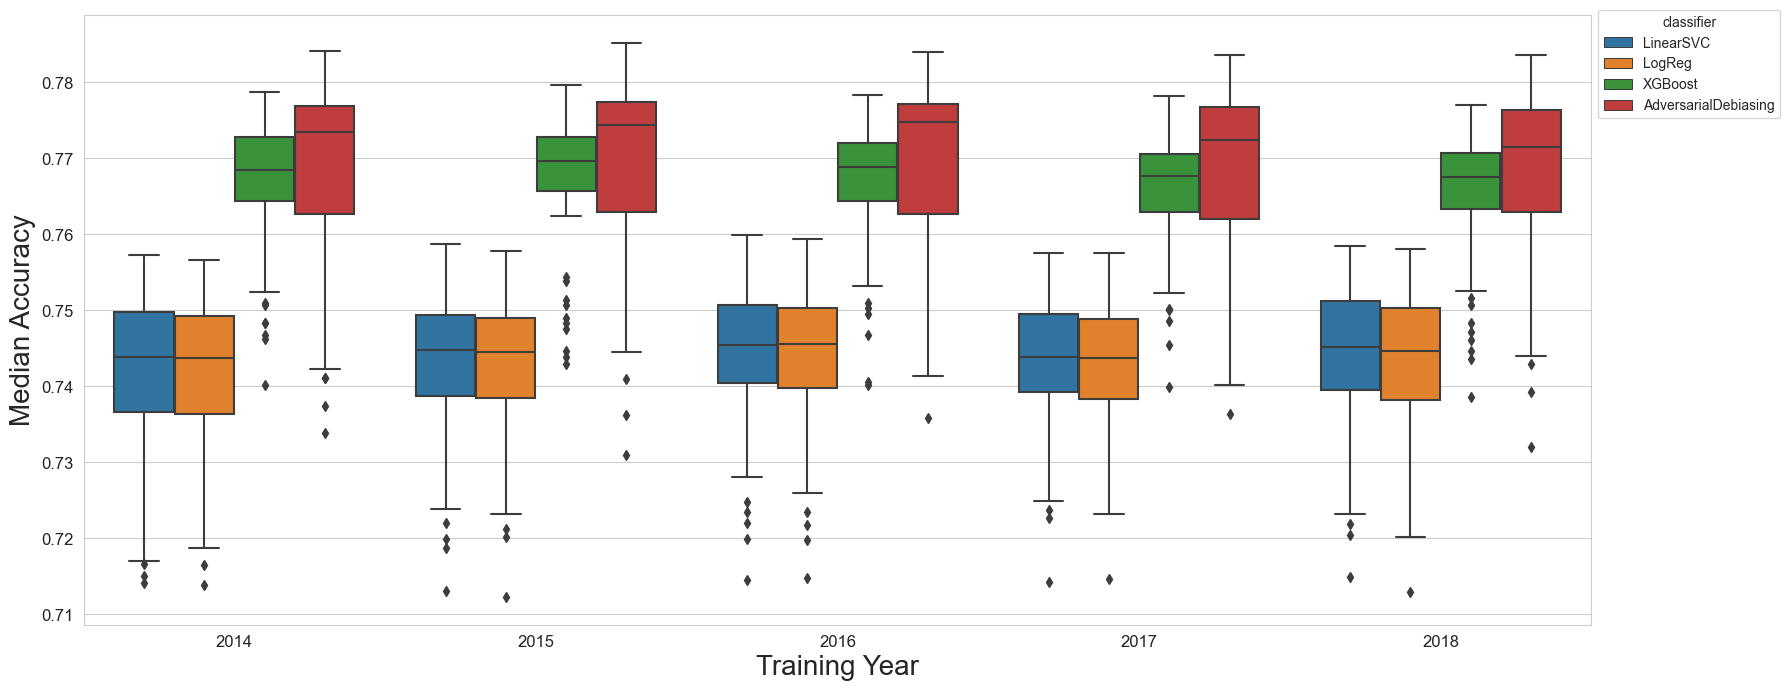

In [36]:
plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_accuracy",
                 hue="classifier",
                 data=acc_temporal_sampled,
                 hue_order=clfiers)
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median Accuracy",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(acc_temporal_sampled["classifier"]):
        group = acc_temporal_sampled.loc[(acc_temporal_sampled["train_year"] == y) & (acc_temporal_sampled["classifier"]
                                                                                      == clf), :]
        fliers = boxplot_stats(group["median_accuracy"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_accuracy"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_accuracy_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_accuracy_sampling.png'),format='png',dpi=300)

2014 -> AdversarialDebiasing 0.055169016472870994 NH
2014 -> AdversarialDebiasing 0.048997603973646844 WY
2015 -> AdversarialDebiasing 0.056842243552704 AK
2015 -> AdversarialDebiasing 0.0597447248595408 ID
2015 -> AdversarialDebiasing 0.06289289475582265 WV
2017 -> AdversarialDebiasing 0.05355545139743005 AK
2018 -> AdversarialDebiasing 0.04576769307020395 GA
2018 -> AdversarialDebiasing 0.04336371022602205 MT
2018 -> AdversarialDebiasing 0.0498357373752573 ND
2018 -> LinearSVC 0.0396613045061062 ID


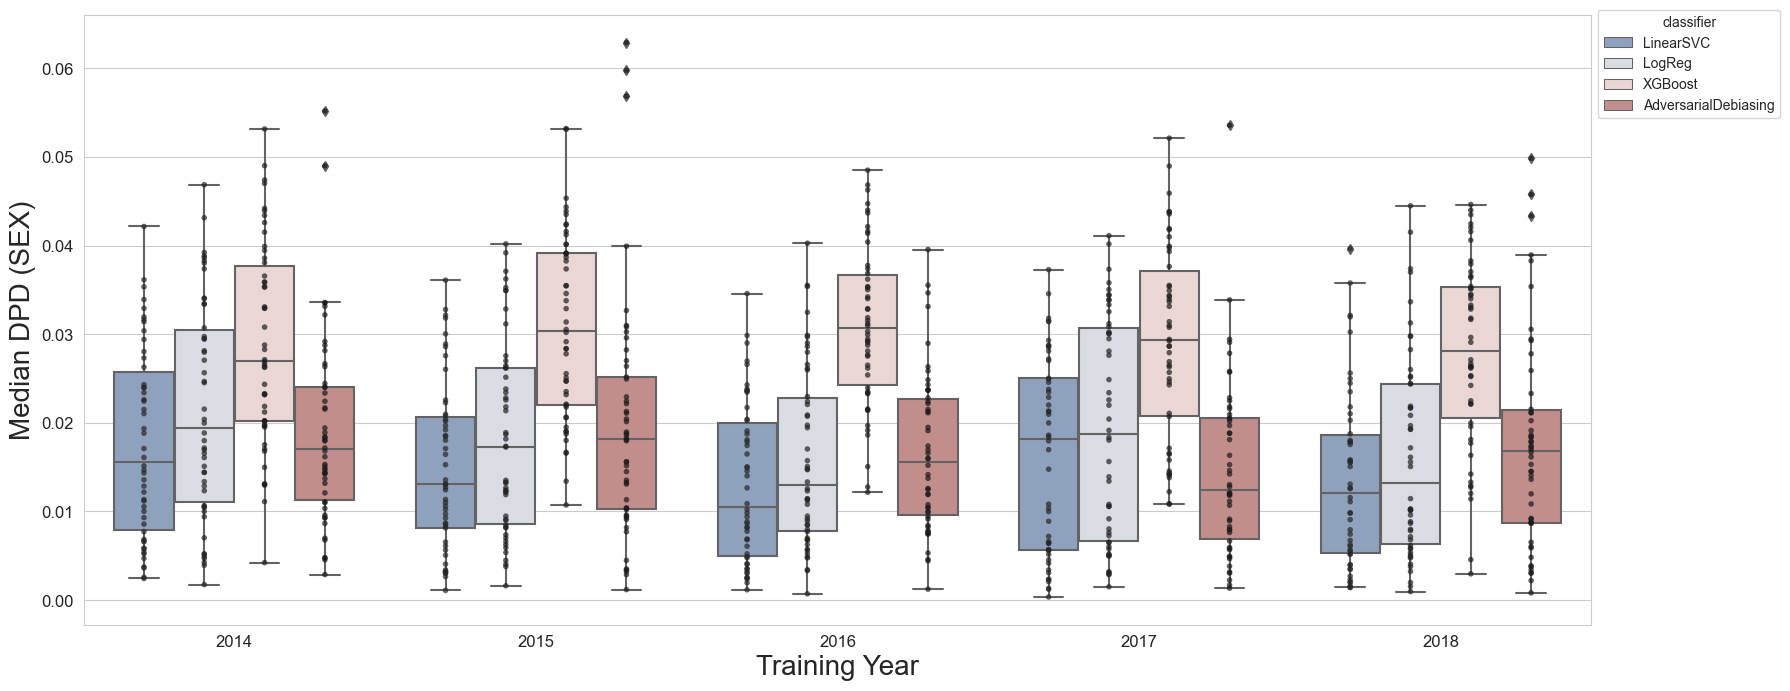

In [37]:
# median DPD SEX

sex_dpd_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_dpd=('sex_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_dpd",
                 hue="classifier",
                 data=sex_dpd_temporal,
                 palette="vlag",
                 hue_order=clfiers
                 )

sns.stripplot(data=sex_dpd_temporal,x="train_year",y= "median_sex_dpd",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1", alpha=0.7,
              linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(sex_dpd_temporal["classifier"]):
        group = sex_dpd_temporal.loc[(sex_dpd_temporal["train_year"] == y) & (sex_dpd_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_dpd_sampling.png'),format='png',dpi=300)

2014 -> AdversarialDebiasing 0.1482966309456018 CA
2014 -> AdversarialDebiasing 0.13768148497841587 UT
2015 -> AdversarialDebiasing 0.19410062020189633 UT


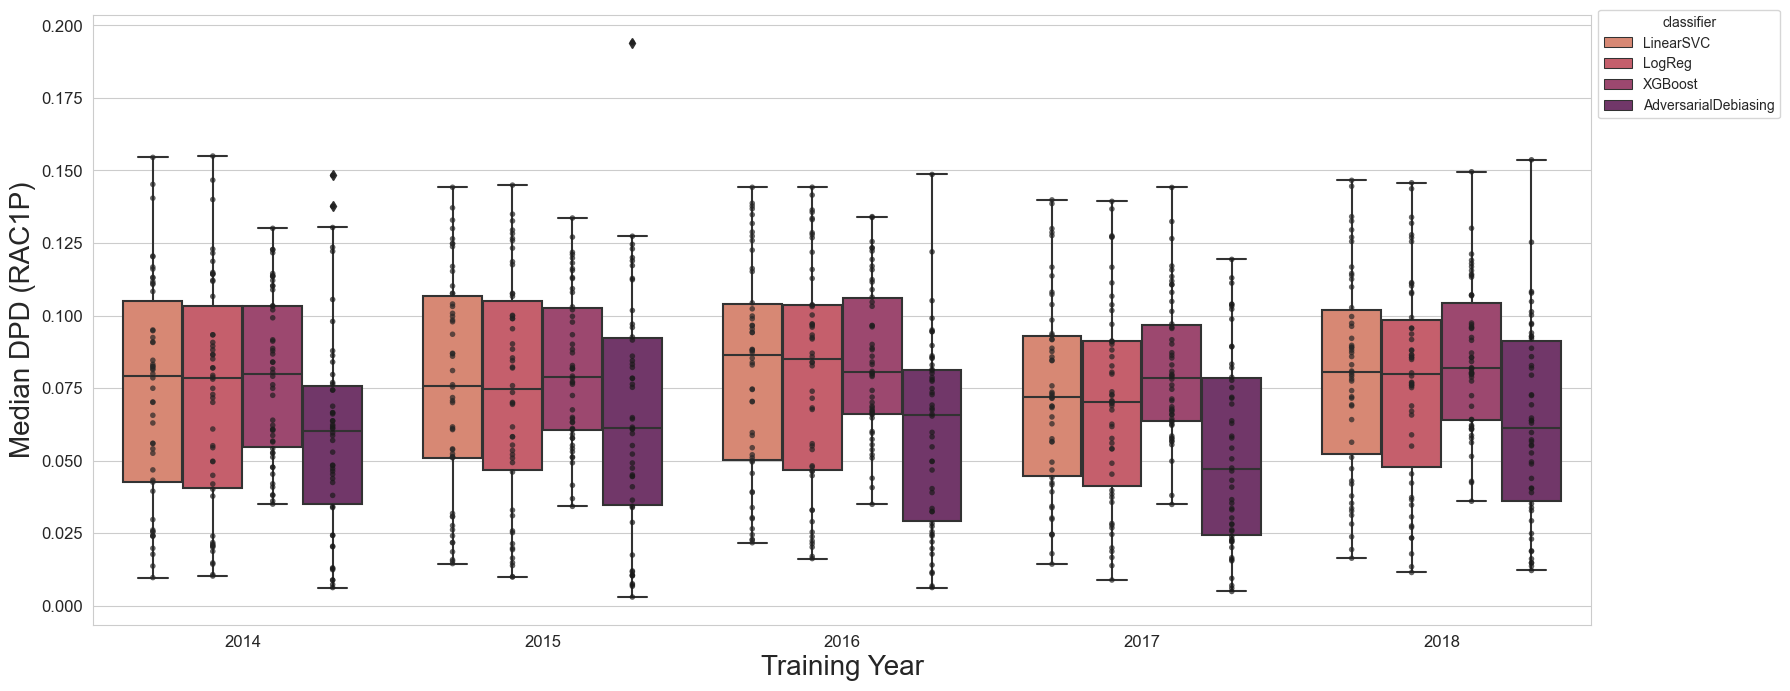

In [38]:
# median DPD RAC1P

rac_dpd_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_dpd=('rac_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_dpd",
                 hue="classifier",
                 data=rac_dpd_temporal,
                 palette="flare",
                 hue_order=clfiers
                 )

sns.stripplot(data=rac_dpd_temporal,x="train_year",y= "median_rac_dpd",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1",
              alpha=0.7, linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(rac_dpd_temporal["classifier"]):
        group = rac_dpd_temporal.loc[(rac_dpd_temporal["train_year"] == y) & (rac_dpd_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_dpd_sampling.png'),format='png',dpi=300)

2014 -> XGBoost 0.061021327307749756 AK
2014 -> XGBoost 0.052923146213908104 DE
2014 -> XGBoost 0.0373689316333678 ME
2014 -> XGBoost 0.04767364258977275 MT
2014 -> XGBoost 0.05742975161059445 ND
2014 -> XGBoost 0.0515829100264951 RI
2014 -> XGBoost 0.054796234051620346 SD
2014 -> XGBoost 0.052192284869093 VT
2015 -> AdversarialDebiasing 0.12925339056476454 ID
2015 -> AdversarialDebiasing 0.10410650838728736 WV
2015 -> XGBoost 0.0521695271093348 DE
2015 -> XGBoost 0.0600896482881465 VT
2016 -> AdversarialDebiasing 0.11347948913102596 UT
2016 -> LinearSVC 0.031265127712649346 DE
2016 -> LinearSVC 0.0270904017046558 ME
2016 -> LinearSVC 0.0314881739384531 VT
2016 -> LogReg 0.03397220225061775 DE
2016 -> LogReg 0.03250952957414515 ME
2016 -> LogReg 0.028141423891667648 VT
2016 -> XGBoost 0.05092215714885175 RI
2016 -> XGBoost 0.061145409304285 SD
2016 -> XGBoost 0.11531396315735831 UT
2016 -> XGBoost 0.058579733860529004 VT
2017 -> AdversarialDebiasing 0.1096179440327211 UT
2017 -> XGBoos

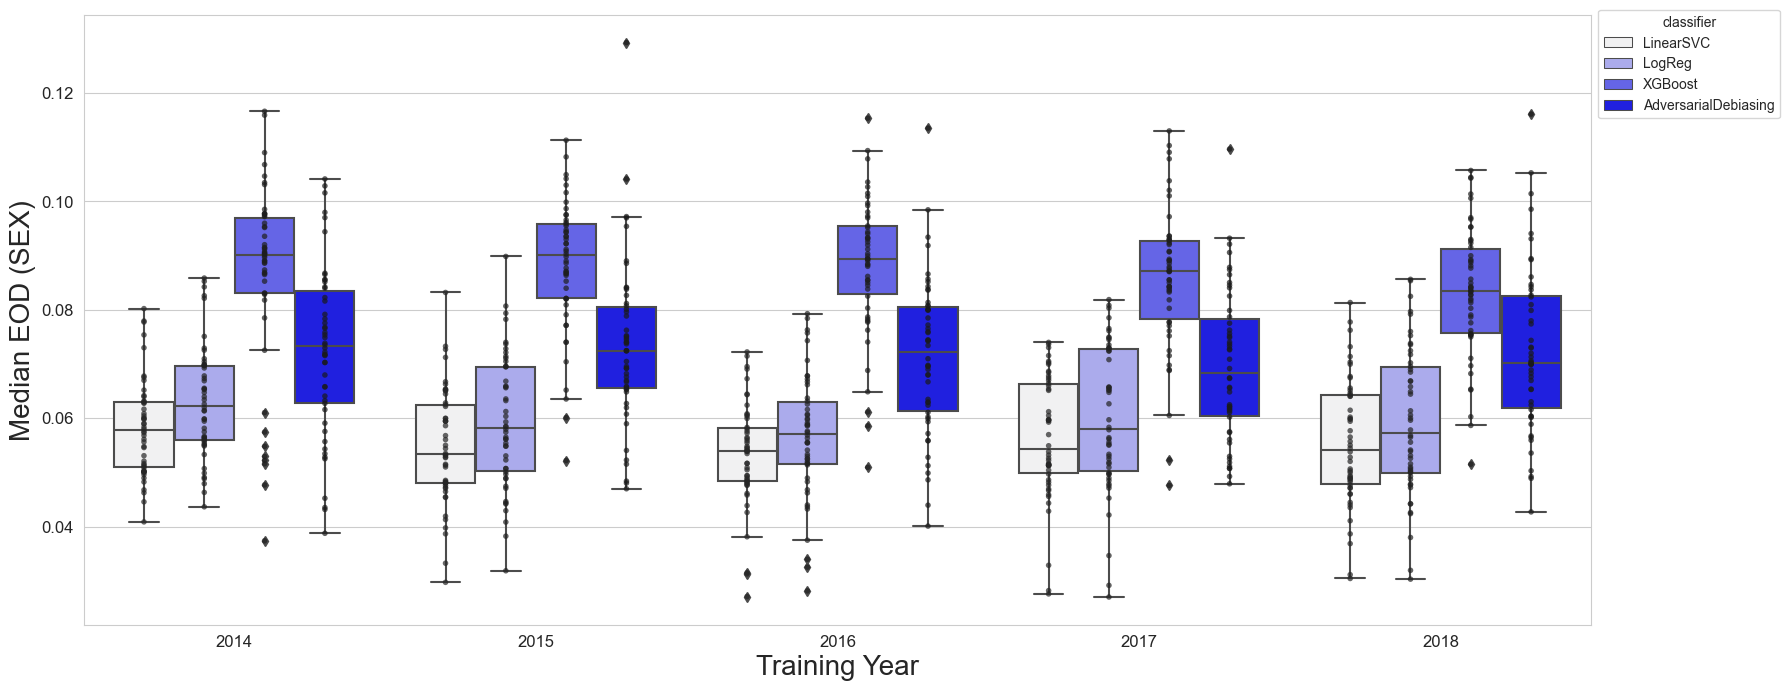

In [39]:
# median EOD SEX
sex_eod_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_eod=('sex_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_eod",
                 hue="classifier",
                 data=sex_eod_temporal,
                 palette="light:b",
                 hue_order=clfiers
                 )

sns.stripplot(data=sex_eod_temporal,x="train_year",y= "median_sex_eod",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1",
              alpha=0.7, linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(sex_eod_temporal["classifier"]):
        group = sex_eod_temporal.loc[(sex_eod_temporal["train_year"] == y) & (sex_eod_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_eod_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_eod_sampling.png'),format='png',dpi=300)

2014 -> XGBoost 0.04366753074748375 HI
2015 -> XGBoost 0.0451851221428718 HI
2016 -> AdversarialDebiasing 0.16548299759025245 ME
2016 -> XGBoost 0.04557126282138255 HI
2017 -> LinearSVC 0.16497630749386033 WI
2017 -> LogReg 0.16162022970527662 WI
2017 -> XGBoost 0.043580421892632004 HI
2018 -> AdversarialDebiasing 0.0171362627546142 HI


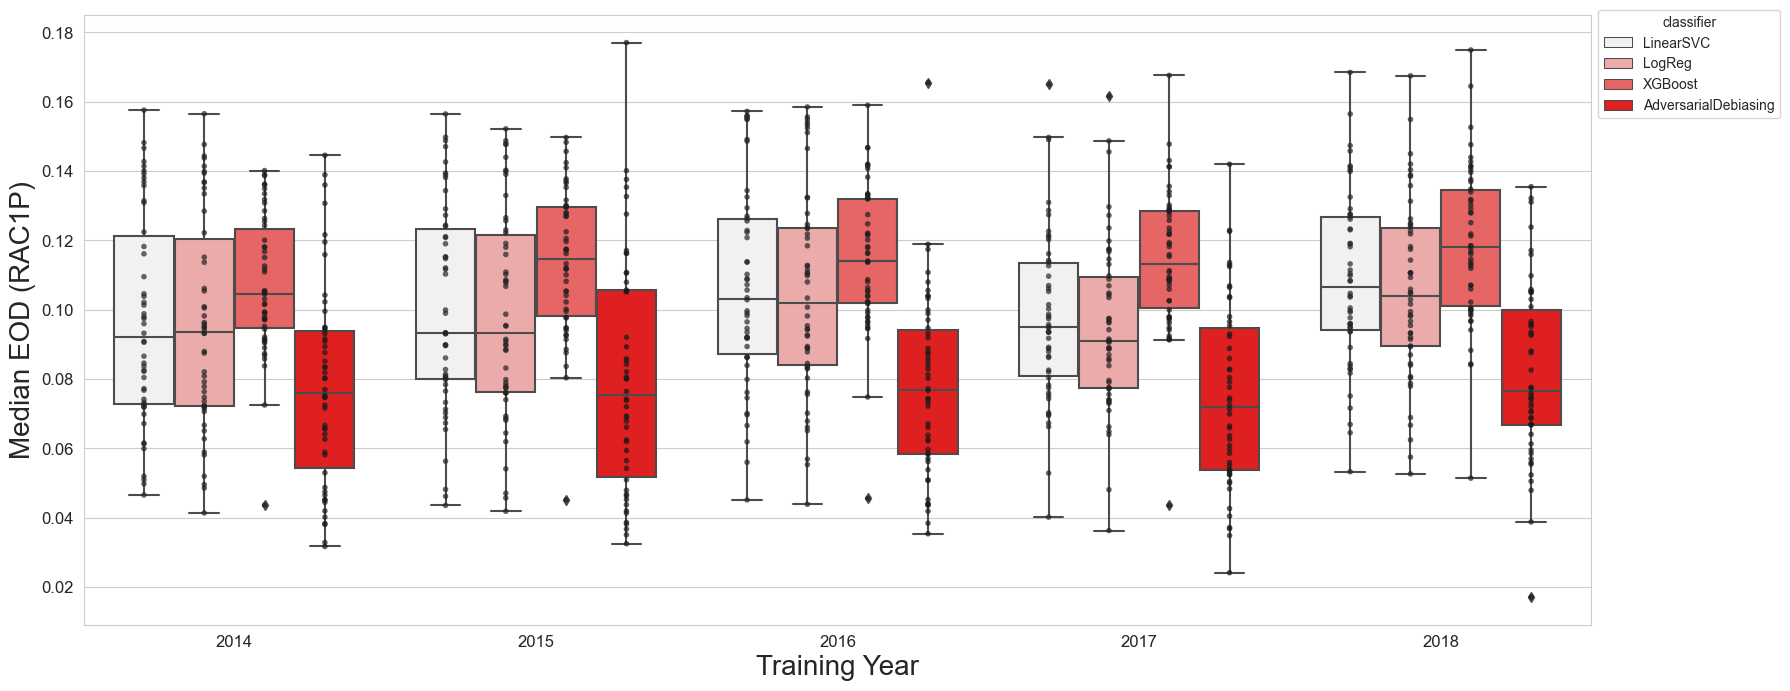

In [40]:
# median EOD RAC1P
rac_eod_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])]\
    .groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_eod=('rac_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_eod",
                 hue="classifier",
                 data=rac_eod_temporal,
                 palette="light:r",
                 hue_order=clfiers
                 )

sns.stripplot(data=rac_eod_temporal,x="train_year",y= "median_rac_eod",
              hue = 'classifier',hue_order=clfiers, size=4, dodge=True, jitter=False, palette="dark:.1",
              alpha=0.7, linewidth=0,
              ax=ax)

ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)

# outliers
for y in [2014,2015,2016,2017,2018]:
    for clf in np.unique(rac_eod_temporal["classifier"]):
        group = rac_eod_temporal.loc[(rac_eod_temporal["train_year"] == y) & (rac_eod_temporal["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["train_state"]):
                if m in fliers:
                    print(y, "->", c,m,s)

# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_eod_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_eod_sampling.png'),format='png',dpi=300)

## ROC curve matplotlib
(adapted from https://towardsdatascience.com/pooled-roc-with-xgboost-and-plotly-553a8169680c)

In [ ]:
protected_variables = {'SEX':['male','female'], 'RAC1P':['white','black','other']}
classifier_names = ["LogReg","LinearSVC","XGBoost","AdversarialDebiasing"]#,"ExponentiatedGradientReduction"]
states=["MD","WV","HI","VT"]
year='2014'
fdir=r'C:\Users\sarab\Desktop\csv_results\figures_normal'

In [ ]:
fig = plt.figure(figsize=(23,30))
gs=gridspec.GridSpec(4,4)

for s in range(len(states)):
    for c in range(len(classifier_names)):
        print(f"{states[s]} - {classifier_names[c]}")
        if len(classifier_names[c])>10:
            state_spatial_path = os.path.join(results_dir,year,'aif360',states[s])
        else:
            state_spatial_path = os.path.join(results_dir,year,'sklearn',states[s])

        pickle_files = glob.glob(state_spatial_path + f'\*_{classifier_names[c]}.pickle')
        fpr_mean = np.linspace(0, 1, 100)
        interp_tprs = {i: np.zeros((len(pickle_files),100)) for i in protected_variables['SEX']}
        for i in range(len(pickle_files)):
            file = open(pickle_files[i], 'rb')
            data = pickle.load(file)

            fpr_male = data['SEX_fpr']['male']
            tpr_male = data['SEX_tpr']['male']
            fpr_female = data['SEX_fpr']['female']
            tpr_female = data['SEX_tpr']['female']

            interp_tpr_male = np.interp(fpr_mean, fpr_male, tpr_male)
            interp_tpr_male[0] = 0.0
            interp_tprs['male'][i,:]= interp_tpr_male
            interp_tpr_female = np.interp(fpr_mean, fpr_female, tpr_female)
            interp_tpr_female[0] = 0.0
            interp_tprs['female'][i,:]= interp_tpr_female

        tpr_mean_male = np.mean(interp_tprs['male'], axis=0)
        tpr_mean_male[-1] = 1.0
        tpr_std_male = 2 * np.std(interp_tprs['male'], axis=0)
        tpr_upper_male = np.clip(tpr_mean_male + tpr_std_male, 0, 1)
        tpr_lower_male = tpr_mean_male - tpr_std_male

        tpr_mean_female = np.mean(interp_tprs['female'], axis=0)
        tpr_mean_female[-1] = 1.0
        tpr_std_female = 2 * np.std(interp_tprs['female'], axis=0)
        tpr_upper_female = np.clip(tpr_mean_female + tpr_std_female, 0, 1)
        tpr_lower_female = tpr_mean_female - tpr_std_female

        ax= fig.add_subplot(gs[s,c])
        ax.set_title(f'{classifier_names[c]}'+ "\n"+  f'(train state={states[s]})',fontsize=18)
        ax.set_xlabel('false positive rate (fpr)',fontsize=18)
        if c==0:
            ax.set_ylabel('true positive rate (tpr)',fontsize=18)

        ax.plot(fpr_mean, tpr_mean_male, color='teal',label='SEX = male')
        ax.fill_between(fpr_mean, tpr_lower_male, tpr_upper_male, color='teal', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_female, color='coral',label='SEX = female')
        ax.fill_between(fpr_mean, tpr_lower_female, tpr_upper_female, color='coral', alpha=0.5)

        ax.plot(np.linspace(0,1,100),np.linspace(0,1,100), "k--",alpha=0.3 )

        if c==0 and s==0:
            ax.legend(loc=4)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(fdir,f'roc_{year}_sex_example.pdf'),format='pdf',dpi=300)
fig.savefig(os.path.join(fdir,f'roc_{year}_sex_example.png'),format='png',dpi=300)

In [ ]:
fig2 = plt.figure(figsize=(23,30))
gs2=gridspec.GridSpec(4,4)

for s in range(len(states)):
    for c in range(len(classifier_names)):
        print(f"{states[s]} - {classifier_names[c]}")
        if len(classifier_names[c])>10:
            state_spatial_path = os.path.join(results_dir,year,'aif360',states[s])
        else:
            state_spatial_path = os.path.join(results_dir,year,'sklearn',states[s])

        pickle_files = glob.glob(state_spatial_path + f'\*_{classifier_names[c]}.pickle')
        fpr_mean = np.linspace(0, 1, 100)
        interp_tprs = {i: np.zeros((len(pickle_files),100)) for i in protected_variables['RAC1P']}
        for i in range(len(pickle_files)):
            file = open(pickle_files[i], 'rb')
            data = pickle.load(file)

            fpr_white = data['RAC1P_fpr']['white']
            tpr_white = data['RAC1P_tpr']['white']
            fpr_black = data['RAC1P_fpr']['black']
            tpr_black = data['RAC1P_tpr']['black']
            fpr_other = data['RAC1P_fpr']['other']
            tpr_other = data['RAC1P_tpr']['other']

            interp_tpr_white = np.interp(fpr_mean, fpr_white, tpr_white)
            interp_tpr_white[0] = 0.0
            interp_tprs['white'][i,:]= interp_tpr_white
            interp_tpr_black = np.interp(fpr_mean, fpr_black, tpr_black)
            interp_tpr_black[0] = 0.0
            interp_tprs['black'][i,:]= interp_tpr_black
            interp_tpr_other = np.interp(fpr_mean, fpr_other, tpr_other)
            interp_tpr_other[0] = 0.0
            interp_tprs['other'][i,:]= interp_tpr_other


        tpr_mean_white = np.mean(interp_tprs['white'], axis=0)
        print(tpr_mean_white)
        tpr_mean_white[-1] = 1.0
        tpr_std_white = 2 * np.std(interp_tprs['white'], axis=0)
        print(tpr_std_white)
        tpr_upper_white = np.clip(tpr_mean_white + tpr_std_white, 0, 1)
        print(tpr_upper_white)
        tpr_lower_white = tpr_mean_white - tpr_std_white

        tpr_mean_black = np.mean(interp_tprs['black'], axis=0)
        tpr_mean_black[-1] = 1.0
        tpr_std_black = 2 * np.std(interp_tprs['black'], axis=0)
        tpr_upper_black = np.clip(tpr_mean_black + tpr_std_black, 0, 1)
        tpr_lower_black = tpr_mean_black - tpr_std_black

        tpr_mean_other = np.mean(interp_tprs['other'], axis=0)
        tpr_mean_other[-1] = 1.0
        tpr_std_other = 2 * np.std(interp_tprs['other'], axis=0)
        tpr_upper_other = np.clip(tpr_mean_other + tpr_std_other, 0, 1)
        tpr_lower_other = tpr_mean_other - tpr_std_other

        ax= fig2.add_subplot(gs2[s,c])
        ax.set_title(f'{classifier_names[c]}'+ "\n"+  f'(train state={states[s]})',fontsize=18)
        ax.set_xlabel('false positive rate (fpr)',fontsize=18)
        if c==0:
            ax.set_ylabel('true positive rate (tpr)',fontsize=18)
        ax.plot(fpr_mean, tpr_mean_white, color='blue', label='RAC1P = white')
        ax.fill_between(fpr_mean, tpr_lower_white, tpr_upper_white, color='blue', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_black, color='red', label='RAC1P = black')
        ax.fill_between(fpr_mean, tpr_lower_black, tpr_upper_black, color='red', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_other, color='green', label='RAC1P = other')
        ax.fill_between(fpr_mean, tpr_lower_other, tpr_upper_other, color='green', alpha=0.5)

        ax.plot(np.linspace(0,1,100),np.linspace(0,1,100), "k--",alpha=0.3 )

        if c==0 and s==0:
            ax.legend(loc=4)

plt.tight_layout()
fig2.show()
fig2.savefig(os.path.join(fdir,f'roc_{year}_race_example.pdf'),format='pdf',dpi=300)
fig2.savefig(os.path.join(fdir,f'roc_{year}_race_example.png'),format='png',dpi=300)

## ROC plots
(adapted from https://towardsdatascience.com/pooled-roc-with-xgboost-and-plotly-553a8169680c)

In [ ]:
protected_variables = {'SEX':['male','female'], 'RAC1P':['white','black','other']}
classifier_names = ["LogReg","LinearSVC","XGBoost","AdversarialDebiasing"]
states=["MD","WV","HI","VT"]
year='2014'

# change directory in plot below accordingly
# results_dir = r'C:\Users\sarab\Desktop\results2_download\ACSEmployment'
# fdir=r'C:\Users\sarab\Desktop\csv_results\figures_normal'
results_sampling_dir = r'C:\Users\sarab\Desktop\sampling_results\ACSEmployment'
fdir=r'C:\Users\sarab\Desktop\csv_results\figures_sampling'

In [ ]:
fig = plt.figure(figsize=(23,30))
gs=gridspec.GridSpec(4,4)

for s in range(len(states)):
    for c in range(len(classifier_names)):
        print(f"{states[s]} - {classifier_names[c]}")
        if len(classifier_names[c])>10:
            state_spatial_path = os.path.join(results_sampling_dir,year,'aif360',states[s])
        else:
            state_spatial_path = os.path.join(results_sampling_dir,year,'sklearn',states[s])

        pickle_files = glob.glob(state_spatial_path + f'\*_{classifier_names[c]}.pickle')
        fpr_mean = np.linspace(0, 1, 100)
        interp_tprs = {i: np.zeros((len(pickle_files),100)) for i in protected_variables['SEX']}
        for i in range(len(pickle_files)):
            file = open(pickle_files[i], 'rb')
            data = pickle.load(file)

            fpr_male = data['SEX_fpr']['male']
            tpr_male = data['SEX_tpr']['male']
            fpr_female = data['SEX_fpr']['female']
            tpr_female = data['SEX_tpr']['female']

            interp_tpr_male = np.interp(fpr_mean, fpr_male, tpr_male)
            interp_tpr_male[0] = 0.0
            interp_tprs['male'][i,:]= interp_tpr_male
            interp_tpr_female = np.interp(fpr_mean, fpr_female, tpr_female)
            interp_tpr_female[0] = 0.0
            interp_tprs['female'][i,:]= interp_tpr_female

        tpr_mean_male = np.mean(interp_tprs['male'], axis=0)
        tpr_mean_male[-1] = 1.0
        tpr_std_male = np.std(interp_tprs['male'], axis=0) # or 2* np.std()
        tpr_upper_male = np.clip(tpr_mean_male + tpr_std_male, 0, 1)
        tpr_lower_male = tpr_mean_male - tpr_std_male

        tpr_mean_female = np.mean(interp_tprs['female'], axis=0)
        tpr_mean_female[-1] = 1.0
        tpr_std_female = np.std(interp_tprs['female'], axis=0)
        tpr_upper_female = np.clip(tpr_mean_female + tpr_std_female, 0, 1)
        tpr_lower_female = tpr_mean_female - tpr_std_female

        ax= fig.add_subplot(gs[s,c])
        ax.set_title(f'{classifier_names[c]}'+ "\n"+  f'(train state={states[s]})',fontsize=18)
        ax.set_xlabel('false positive rate (fpr)',fontsize=18)
        if c==0:
            ax.set_ylabel('true positive rate (tpr)',fontsize=18)

        ax.plot(fpr_mean, tpr_mean_male, color='teal',label='SEX = male')
        ax.fill_between(fpr_mean, tpr_lower_male, tpr_upper_male, color='teal', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_female, color='coral',label='SEX = female')
        ax.fill_between(fpr_mean, tpr_lower_female, tpr_upper_female, color='coral', alpha=0.5)

        ax.plot(np.linspace(0,1,100),np.linspace(0,1,100), "k--",alpha=0.3 )

        if c==0 and s==0:
            ax.legend(loc=4, fontsize=15)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(fdir,f'roc_{year}_sex_example.pdf'),format='pdf',dpi=300)
fig.savefig(os.path.join(fdir,f'roc_{year}_sex_example.png'),format='png',dpi=300)

In [ ]:
fig2 = plt.figure(figsize=(23,30))
gs2=gridspec.GridSpec(4,4)

for s in range(len(states)):
    for c in range(len(classifier_names)):
        print(f"{states[s]} - {classifier_names[c]}")
        if len(classifier_names[c])>10:
            state_spatial_path = os.path.join(results_sampling_dir,year,'aif360',states[s])
        else:
            state_spatial_path = os.path.join(results_sampling_dir,year,'sklearn',states[s])

        pickle_files = glob.glob(state_spatial_path + f'\*_{classifier_names[c]}.pickle')
        fpr_mean = np.linspace(0, 1, 100)
        interp_tprs = {i: np.zeros((len(pickle_files),100)) for i in protected_variables['RAC1P']}
        for i in range(len(pickle_files)):
            file = open(pickle_files[i], 'rb')
            data = pickle.load(file)

            fpr_white = data['RAC1P_fpr']['white']
            tpr_white = data['RAC1P_tpr']['white']
            fpr_black = data['RAC1P_fpr']['black']
            tpr_black = data['RAC1P_tpr']['black']
            fpr_other = data['RAC1P_fpr']['other']
            tpr_other = data['RAC1P_tpr']['other']

            interp_tpr_white = np.interp(fpr_mean, fpr_white, tpr_white)
            interp_tpr_white[0] = 0.0
            interp_tprs['white'][i,:]= interp_tpr_white
            interp_tpr_black = np.interp(fpr_mean, fpr_black, tpr_black)
            interp_tpr_black[0] = 0.0
            interp_tprs['black'][i,:]= interp_tpr_black
            interp_tpr_other = np.interp(fpr_mean, fpr_other, tpr_other)
            interp_tpr_other[0] = 0.0
            interp_tprs['other'][i,:]= interp_tpr_other


        tpr_mean_white = np.mean(interp_tprs['white'], axis=0)
        print(tpr_mean_white)
        tpr_mean_white[-1] = 1.0
        tpr_std_white = np.std(interp_tprs['white'], axis=0)
        print(tpr_std_white)
        tpr_upper_white = np.clip(tpr_mean_white + tpr_std_white, 0, 1)
        print(tpr_upper_white)
        tpr_lower_white = tpr_mean_white - tpr_std_white

        tpr_mean_black = np.mean(interp_tprs['black'], axis=0)
        tpr_mean_black[-1] = 1.0
        tpr_std_black = np.std(interp_tprs['black'], axis=0)
        tpr_upper_black = np.clip(tpr_mean_black + tpr_std_black, 0, 1)
        tpr_lower_black = tpr_mean_black - tpr_std_black

        tpr_mean_other = np.mean(interp_tprs['other'], axis=0)
        tpr_mean_other[-1] = 1.0
        tpr_std_other = np.std(interp_tprs['other'], axis=0)
        tpr_upper_other = np.clip(tpr_mean_other + tpr_std_other, 0, 1)
        tpr_lower_other = tpr_mean_other - tpr_std_other

        ax= fig2.add_subplot(gs2[s,c])
        ax.set_title(f'{classifier_names[c]}'+ "\n"+  f'(train state={states[s]})',fontsize=18)
        ax.set_xlabel('false positive rate (fpr)',fontsize=18)
        if c==0:
            ax.set_ylabel('true positive rate (tpr)',fontsize=18)
        ax.plot(fpr_mean, tpr_mean_white, color='blue', label='RAC1P = white')
        ax.fill_between(fpr_mean, tpr_lower_white, tpr_upper_white, color='blue', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_black, color='red', label='RAC1P = black')
        ax.fill_between(fpr_mean, tpr_lower_black, tpr_upper_black, color='red', alpha=0.5)
        ax.plot(fpr_mean, tpr_mean_other, color='green', label='RAC1P = other')
        ax.fill_between(fpr_mean, tpr_lower_other, tpr_upper_other, color='green', alpha=0.5)

        ax.plot(np.linspace(0,1,100),np.linspace(0,1,100), "k--",alpha=0.3 )

        if c==0 and s==0:
            ax.legend(loc=4, fontsize=15)

plt.tight_layout()
fig2.show()
fig2.savefig(os.path.join(fdir,f'roc_{year}_race_example.pdf'),format='pdf',dpi=300)
fig2.savefig(os.path.join(fdir,f'roc_{year}_race_example.png'),format='png',dpi=300)